# Final Project - Logistic Regression
Logistic Regression for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

# Imports

In [70]:
# Importing the libraries to be used:
import numpy as np
import numpy.random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [71]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = -1.
    y[y==3] = 0.
    y[y>3] = 1.

    y_0 = (y[y==-1][:np.count_nonzero(y==1)]).reshape((-1, 1))
    y_1 = (y[y==0][:np.count_nonzero(y==1)]).reshape((-1, 1))
    y_2 = (y[y==1]).reshape((-1, 1))

    X_0 = X[y==-1][:np.count_nonzero(y==1)]
    X_1 = X[y==0][:np.count_nonzero(y==1)]
    X_2 = X[y==1]

    y = np.vstack((y_0, y_1, y_2)).reshape((-1, ))
    X = np.vstack((X_0, X_1, X_2))

    print(f'Current y hist: {np.histogram(y, [-1.5, -0.5, 0.5, 1.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = 3

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(f'ScaledX[:10, :]:\n{X[:10, :]}') # Looking the new features after scaling

    # Split the data into training and test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    return X_train, y_train, X_test, y_test

### Confusion Matrix and Classification Analysis

In [72]:
def confusion_and_classification(y, y_hat):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0, labels=range(3))
    # accuracy
    print(cr[: cr.find('micro') - 5])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Logistic Regression with Lasso (L1) Regularization

In [73]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model
# with different values of C.
def logreg_model(c , X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # Create the Logistic Regression model object as described above and save it to logreg
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver='saga', max_iter=1e6)

    # Fit the model on the training set
    logreg.fit(X_train, y_train)

    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, y_train)
    acc_train_logreg.append(acc_train)
    print(f'Logistic - L1, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)
    # confusion_and_classification(y_train, Yhat_train)

    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, y_test)
    acc_test_logreg.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    confusion_and_classification(y_test, Yhat_test)

# Logistic Regression with Ridge(L2) Regularization.

In [74]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test, acc_train_logreg2, acc_test_logreg2):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.

    # Create the Logistic Regression model object as described above and save it to logreg2
    logreg2 = linear_model.LogisticRegression(C=c, max_iter=1e6)

    # Fit the model on the training set
    logreg2.fit(X_train, Y_train)

    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print(f'Logistic - L2, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction on training set
    Yhat_train = logreg2.predict(X_train)
    # confusion_and_classification(y_train, Yhat_train)

    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction on test set
    Yhat_test = logreg2.predict(X_test)
    confusion_and_classification(y_test, Yhat_test)

In [75]:
def train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2):
    # L1
    acc_train_logreg = []
    acc_test_logreg = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
    # c_logreg = np.geomspace(0.1, 50, num=16)
    for c in c_logreg:
        logreg_model(c, X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg, acc_train_logreg, color='red', label='Training Accuracy')
    plt.plot(c_logreg, acc_test_logreg, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('L1 - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # L2
    acc_train_logreg2 = []
    acc_test_logreg2 = []
    # c_logreg2 = c_logreg
    for c in c_logreg2:
        logreg2_model(c, X_train, y_train, X_test, y_test, acc_train_logreg2, acc_test_logreg2)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg2, acc_train_logreg2, color='red', label='Training Accuracy')
    plt.plot(c_logreg2, acc_test_logreg2, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('L2 - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [76]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [77]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([217, 217, 217]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
X[:10, :]:
[[7.2000e+00 3.9000e-01 3.2000e-01 1.8000e+00 6.5000e-02 3.4000e+01
  6.0000e+01 9.9714e-01 3.4600e+00 7.8000e-01 9.9000e+00]
 [7.9000e+00 6.9000e-01 2.1000e-01 2.1000e+00 8.0000e-02 3.3000e+01
  1.4100e+02 9.9620e-01 3.2500e+00 5.1000e-01 9.9000e+00]
 [9.5000e+00 5.5000e-01 6.6000e-01 2.3000e+00 3.8700e-01 1.2000e+01
  3.7000e+01 9.9820e-01 3.1700e+00 6.7000e-01 9.6000e+00]
 [7.6000e+00 5.4000e-01 1.3000e-01 2.5000e+00 9.7000e-02 2.4000e+01
  6.6000e+01 9.9785e-01 3.3900e+00 6.1000e-01 9.4000e+00]
 [7.2000e+00 6.2000e-01 6.0000e-02 2.7000e+00 7.7000e-02 1.5000e+01
  8.5000e+01 9.9746e-01 3.5100e+00 5.4000e-01 9.5000e+00]
 [6.7000e+00 1.0400e+00 8.0000e-02 2.3000e+00 6.7000e-02 1.9000e+

Logistic - L1, Train Accuracy = 0.6115384615384616, C=0.06
Test Accuracy = 0.6259541984732825


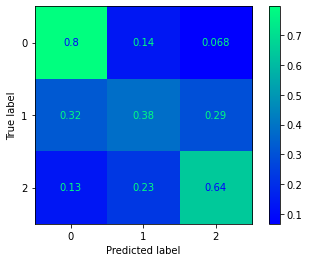

              precision    recall  f1-score   support

           0       0.42      0.38      0.40        34
           1       0.72      0.64      0.68        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18034215111674323

Logistic - L1, Train Accuracy = 0.6269230769230769, C=0.16081632653061223
Test Accuracy = 0.6412213740458015


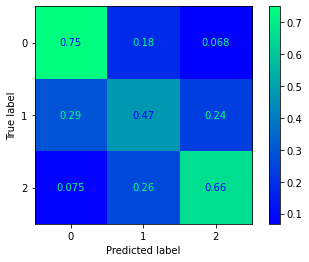

              precision    recall  f1-score   support

           0       0.42      0.47      0.44        34
           1       0.76      0.66      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.29447172501188024

Logistic - L1, Train Accuracy = 0.6307692307692307, C=0.2616326530612245
Test Accuracy = 0.6412213740458015


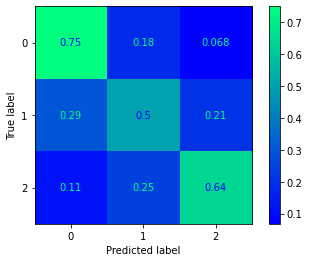

              precision    recall  f1-score   support

           0       0.45      0.50      0.47        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23221923015998736

Logistic - L1, Train Accuracy = 0.6326923076923077, C=0.36244897959183675
Test Accuracy = 0.6335877862595419


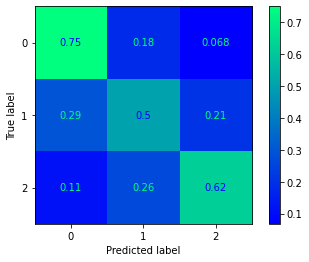

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        34
           1       0.77      0.62      0.69        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2218438143513385

Logistic - L1, Train Accuracy = 0.6288461538461538, C=0.463265306122449
Test Accuracy = 0.6412213740458015


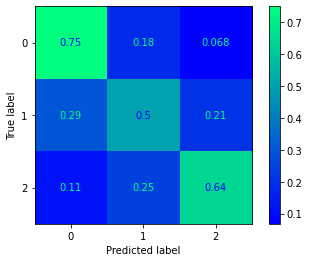

              precision    recall  f1-score   support

           0       0.45      0.50      0.47        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23221923015998736

Logistic - L1, Train Accuracy = 0.6346153846153846, C=0.5640816326530613
Test Accuracy = 0.6412213740458015


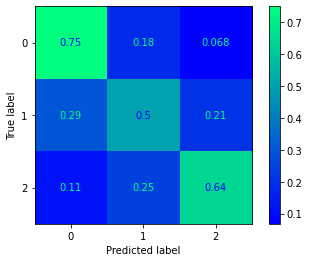

              precision    recall  f1-score   support

           0       0.45      0.50      0.47        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23221923015998736

Logistic - L1, Train Accuracy = 0.6365384615384615, C=0.6648979591836734
Test Accuracy = 0.648854961832061


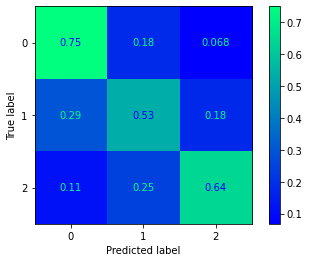

              precision    recall  f1-score   support

           0       0.46      0.53      0.49        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2425946459686361

Logistic - L1, Train Accuracy = 0.6346153846153846, C=0.7657142857142858
Test Accuracy = 0.648854961832061


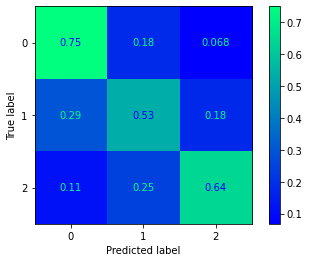

              precision    recall  f1-score   support

           0       0.46      0.53      0.49        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2425946459686361

Logistic - L1, Train Accuracy = 0.6326923076923077, C=0.8665306122448979
Test Accuracy = 0.648854961832061


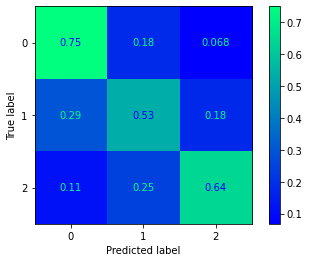

              precision    recall  f1-score   support

           0       0.46      0.53      0.49        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2425946459686361

Logistic - L1, Train Accuracy = 0.6307692307692307, C=0.9673469387755103
Test Accuracy = 0.648854961832061


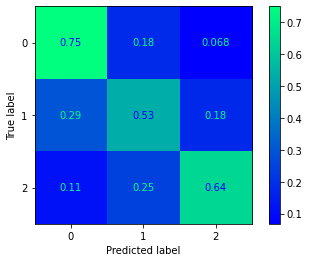

              precision    recall  f1-score   support

           0       0.46      0.53      0.49        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2425946459686361

Logistic - L1, Train Accuracy = 0.6269230769230769, C=1.0681632653061226
Test Accuracy = 0.6412213740458015


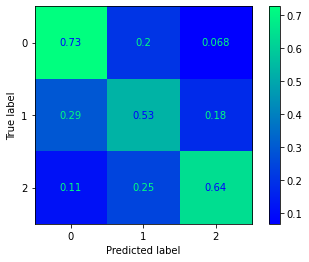

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23221923015998736

Logistic - L1, Train Accuracy = 0.625, C=1.1689795918367347
Test Accuracy = 0.6412213740458015


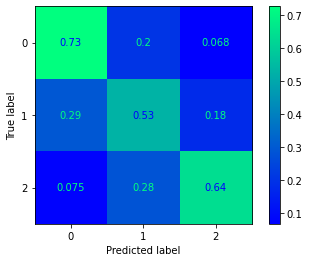

              precision    recall  f1-score   support

           0       0.43      0.53      0.47        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.29447172501188024

Logistic - L1, Train Accuracy = 0.6269230769230769, C=1.269795918367347
Test Accuracy = 0.6412213740458015


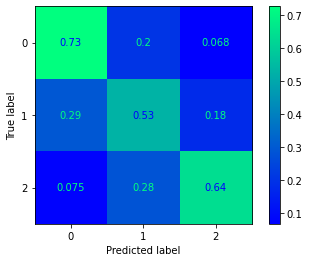

              precision    recall  f1-score   support

           0       0.43      0.53      0.47        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.29447172501188024

Logistic - L1, Train Accuracy = 0.6269230769230769, C=1.3706122448979592
Test Accuracy = 0.6412213740458015


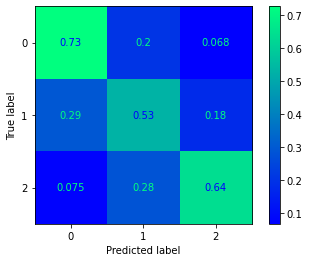

              precision    recall  f1-score   support

           0       0.43      0.53      0.47        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.29447172501188024

Logistic - L1, Train Accuracy = 0.625, C=1.4714285714285715
Test Accuracy = 0.6335877862595419


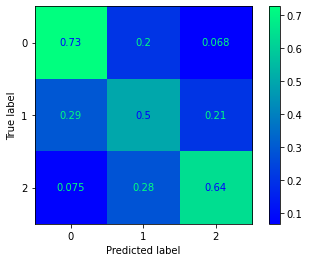

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L1, Train Accuracy = 0.625, C=1.5722448979591837
Test Accuracy = 0.6335877862595419


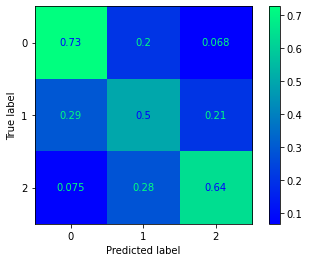

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L1, Train Accuracy = 0.625, C=1.673061224489796
Test Accuracy = 0.6335877862595419


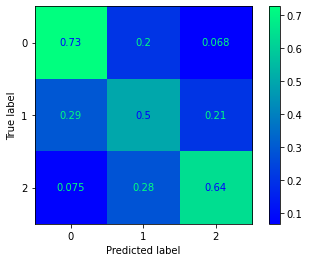

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L1, Train Accuracy = 0.625, C=1.7738775510204083
Test Accuracy = 0.6335877862595419


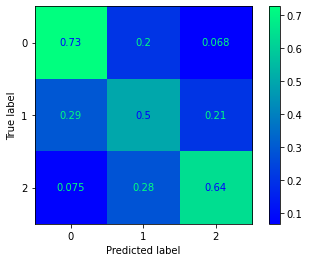

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L1, Train Accuracy = 0.625, C=1.8746938775510205
Test Accuracy = 0.6259541984732825


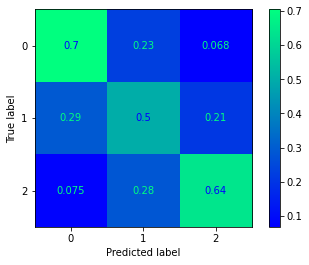

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.625, C=1.9755102040816328
Test Accuracy = 0.6259541984732825


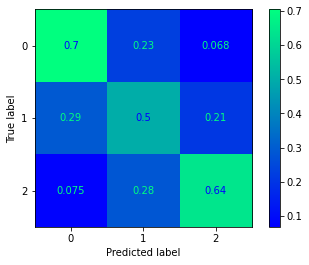

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.625, C=2.076326530612245
Test Accuracy = 0.6259541984732825


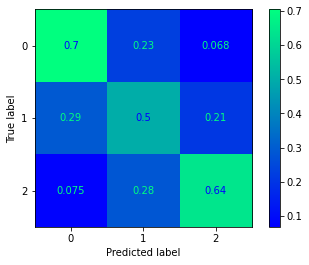

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.625, C=2.177142857142857
Test Accuracy = 0.6259541984732825


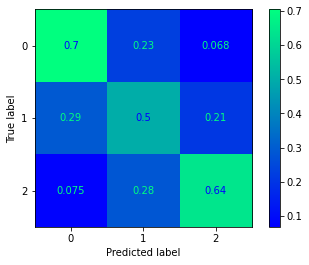

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.625, C=2.2779591836734694
Test Accuracy = 0.6259541984732825


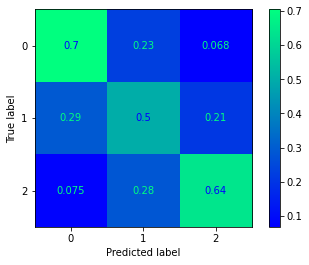

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=2.3787755102040817
Test Accuracy = 0.6259541984732825


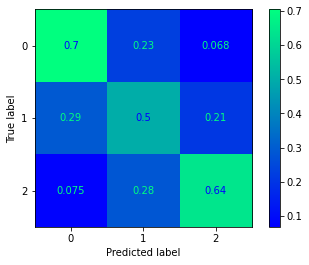

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=2.479591836734694
Test Accuracy = 0.6259541984732825


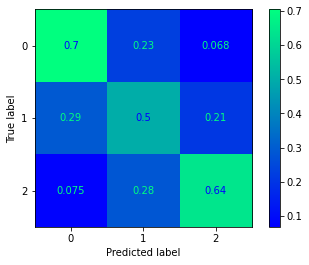

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=2.5804081632653064
Test Accuracy = 0.6259541984732825


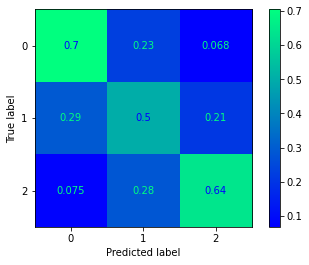

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=2.6812244897959183
Test Accuracy = 0.6259541984732825


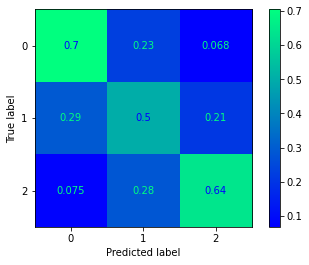

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=2.7820408163265307
Test Accuracy = 0.6259541984732825


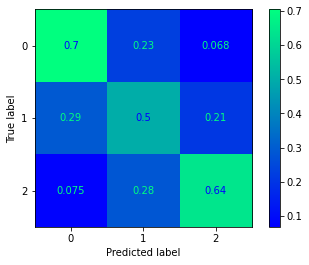

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=2.882857142857143
Test Accuracy = 0.6259541984732825


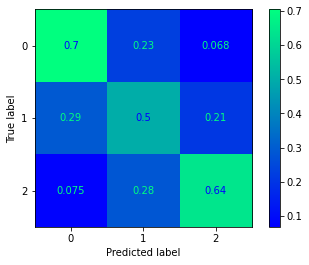

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=2.9836734693877554
Test Accuracy = 0.6259541984732825


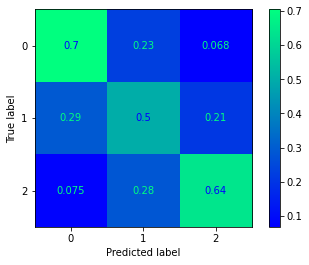

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=3.0844897959183672
Test Accuracy = 0.6259541984732825


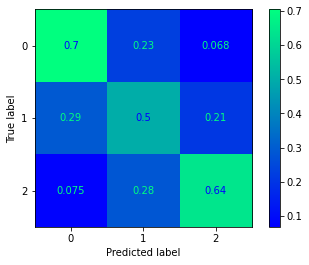

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=3.1853061224489796
Test Accuracy = 0.6259541984732825


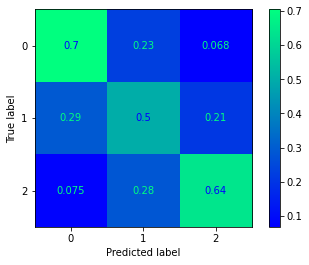

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=3.286122448979592
Test Accuracy = 0.6259541984732825


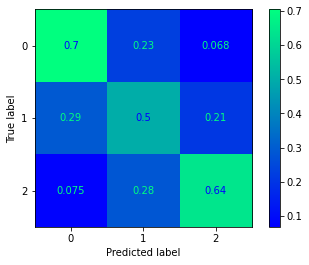

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=3.3869387755102043
Test Accuracy = 0.6259541984732825


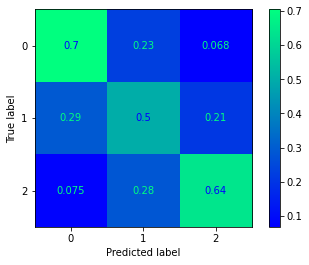

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=3.4877551020408166
Test Accuracy = 0.6259541984732825


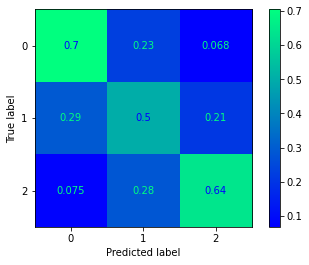

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=3.5885714285714285
Test Accuracy = 0.6259541984732825


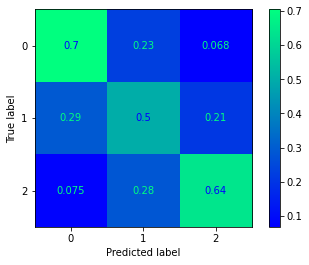

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6269230769230769, C=3.689387755102041
Test Accuracy = 0.6259541984732825


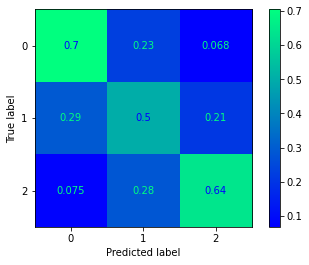

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=3.790204081632653
Test Accuracy = 0.6259541984732825


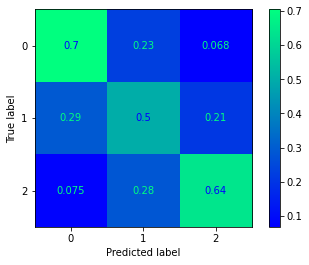

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=3.8910204081632656
Test Accuracy = 0.6259541984732825


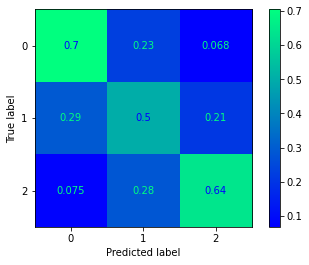

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=3.9918367346938775
Test Accuracy = 0.6259541984732825


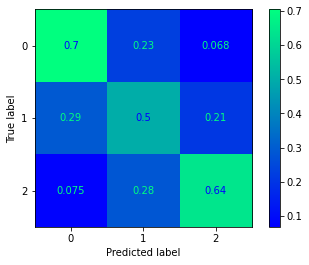

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.09265306122449
Test Accuracy = 0.6259541984732825


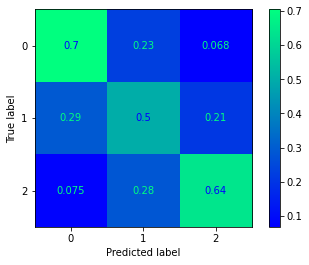

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.193469387755102
Test Accuracy = 0.6259541984732825


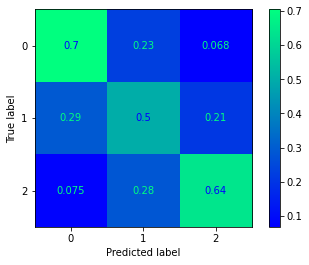

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.294285714285714
Test Accuracy = 0.6259541984732825


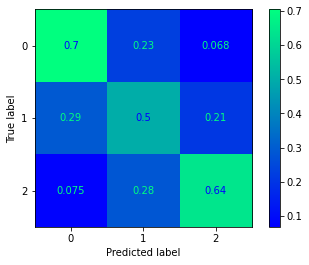

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.395102040816326
Test Accuracy = 0.6259541984732825


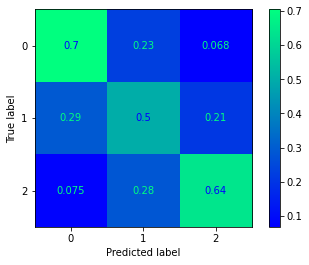

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.495918367346938
Test Accuracy = 0.6259541984732825


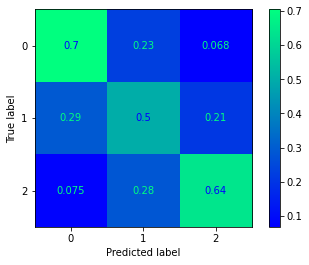

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.596734693877551
Test Accuracy = 0.6259541984732825


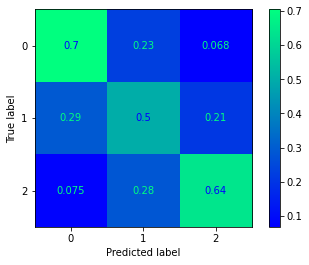

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.697551020408163
Test Accuracy = 0.6259541984732825


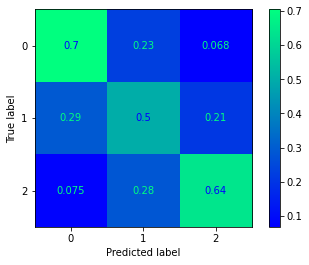

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.798367346938775
Test Accuracy = 0.6259541984732825


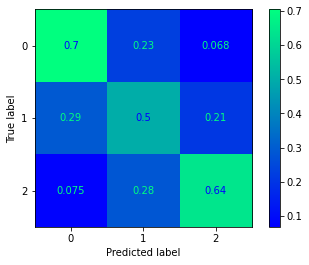

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=4.899183673469388
Test Accuracy = 0.6259541984732825


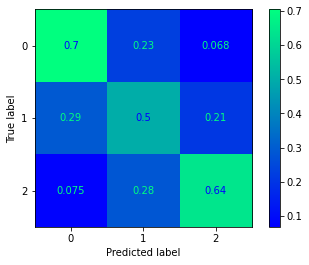

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L1, Train Accuracy = 0.6288461538461538, C=5.0
Test Accuracy = 0.6259541984732825


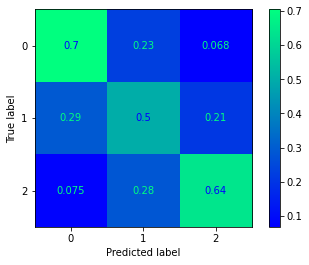

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826



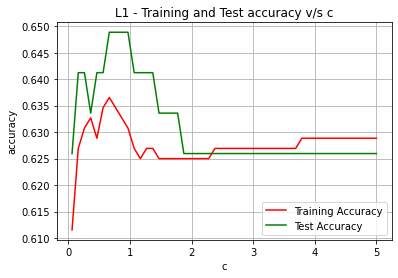

Logistic - L2, Train Accuracy = 0.625, C=0.06
Test Accuracy = 0.6335877862595419


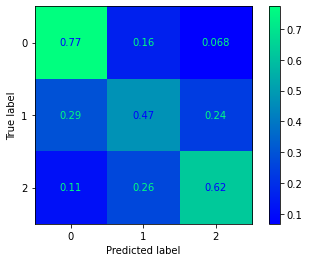

              precision    recall  f1-score   support

           0       0.43      0.47      0.45        34
           1       0.75      0.62      0.68        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2218438143513385

Logistic - L2, Train Accuracy = 0.6269230769230769, C=0.16081632653061223
Test Accuracy = 0.6335877862595419


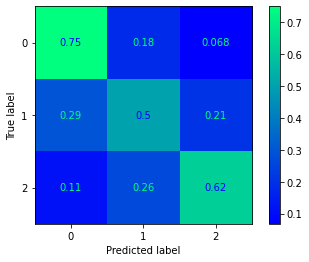

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        34
           1       0.77      0.62      0.69        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2218438143513385

Logistic - L2, Train Accuracy = 0.6307692307692307, C=0.2616326530612245
Test Accuracy = 0.6412213740458015


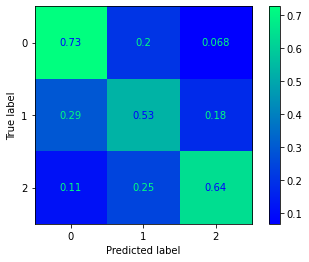

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23221923015998736

Logistic - L2, Train Accuracy = 0.6326923076923077, C=0.36244897959183675
Test Accuracy = 0.6412213740458015


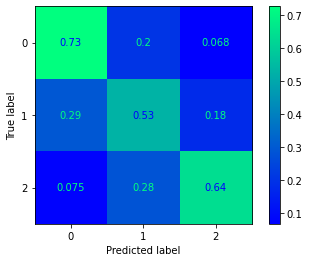

              precision    recall  f1-score   support

           0       0.43      0.53      0.47        34
           1       0.79      0.64      0.71        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.29447172501188024

Logistic - L2, Train Accuracy = 0.6307692307692307, C=0.463265306122449
Test Accuracy = 0.6335877862595419


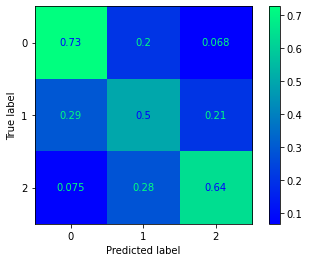

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L2, Train Accuracy = 0.6288461538461538, C=0.5640816326530613
Test Accuracy = 0.6335877862595419


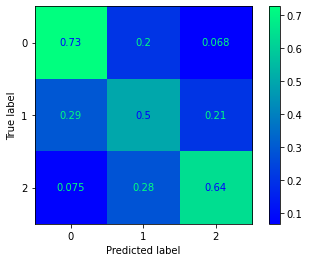

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L2, Train Accuracy = 0.6288461538461538, C=0.6648979591836734
Test Accuracy = 0.6335877862595419


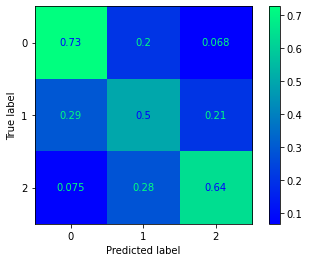

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L2, Train Accuracy = 0.6288461538461538, C=0.7657142857142858
Test Accuracy = 0.6335877862595419


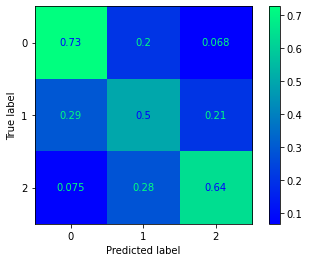

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L2, Train Accuracy = 0.6269230769230769, C=0.8665306122448979
Test Accuracy = 0.6335877862595419


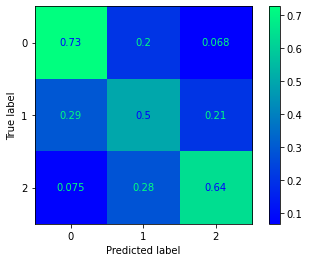

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2840963092032315

Logistic - L2, Train Accuracy = 0.6269230769230769, C=0.9673469387755103
Test Accuracy = 0.6259541984732825


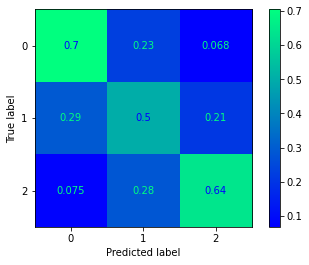

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=1.0681632653061226
Test Accuracy = 0.6259541984732825


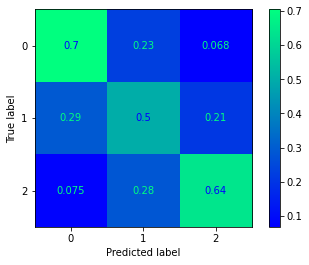

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=1.1689795918367347
Test Accuracy = 0.6259541984732825


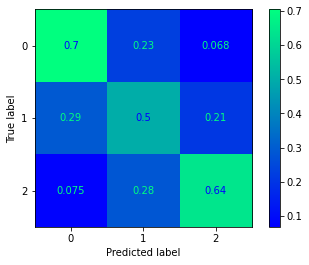

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=1.269795918367347
Test Accuracy = 0.6259541984732825


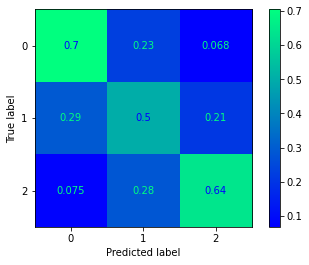

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=1.3706122448979592
Test Accuracy = 0.6259541984732825


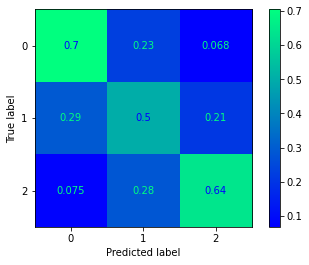

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=1.4714285714285715
Test Accuracy = 0.6259541984732825


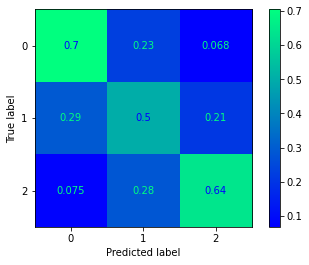

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=1.5722448979591837
Test Accuracy = 0.6259541984732825


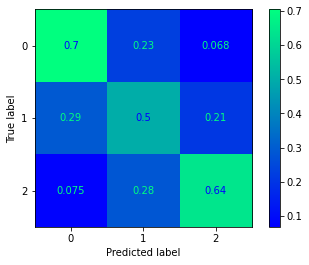

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6230769230769231, C=1.673061224489796
Test Accuracy = 0.6259541984732825


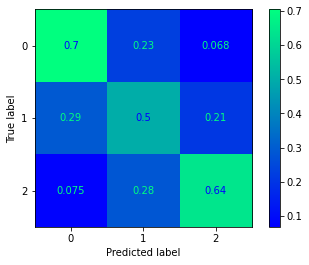

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6230769230769231, C=1.7738775510204083
Test Accuracy = 0.6259541984732825


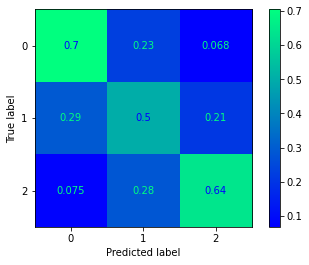

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6230769230769231, C=1.8746938775510205
Test Accuracy = 0.6259541984732825


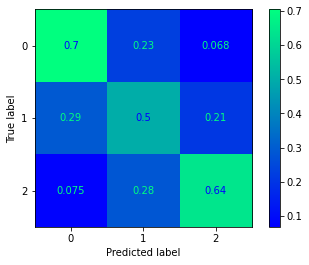

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6230769230769231, C=1.9755102040816328
Test Accuracy = 0.6259541984732825


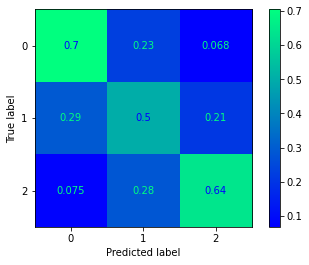

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6230769230769231, C=2.076326530612245
Test Accuracy = 0.6259541984732825


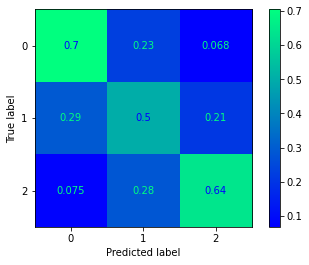

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6230769230769231, C=2.177142857142857
Test Accuracy = 0.6259541984732825


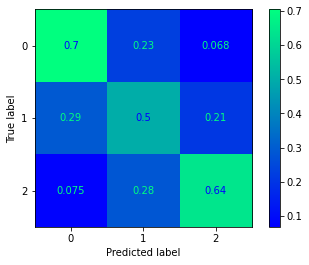

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=2.2779591836734694
Test Accuracy = 0.6259541984732825


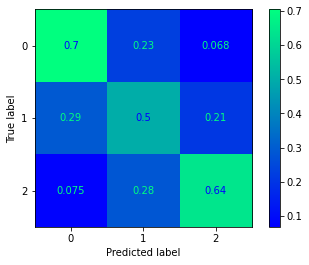

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=2.3787755102040817
Test Accuracy = 0.6259541984732825


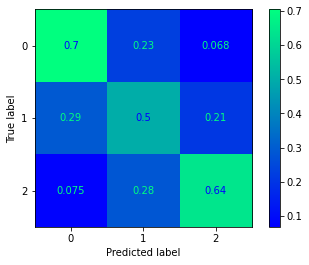

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=2.479591836734694
Test Accuracy = 0.6259541984732825


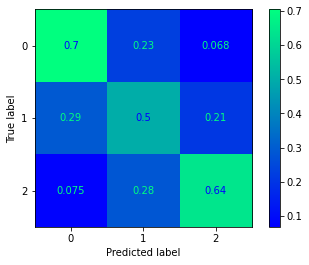

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=2.5804081632653064
Test Accuracy = 0.6259541984732825


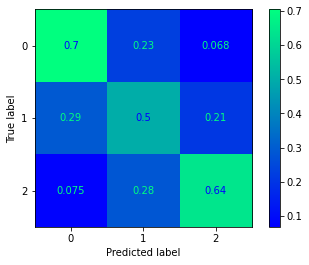

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=2.6812244897959183
Test Accuracy = 0.6259541984732825


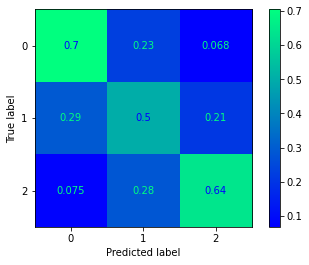

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=2.7820408163265307
Test Accuracy = 0.6259541984732825


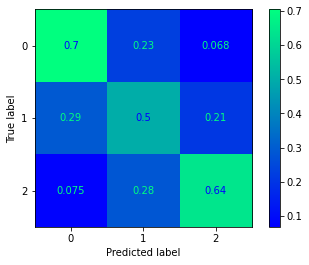

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=2.882857142857143
Test Accuracy = 0.6259541984732825


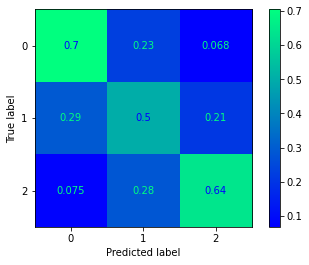

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=2.9836734693877554
Test Accuracy = 0.6259541984732825


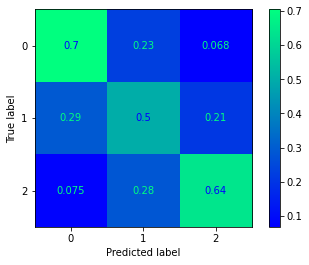

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=3.0844897959183672
Test Accuracy = 0.6259541984732825


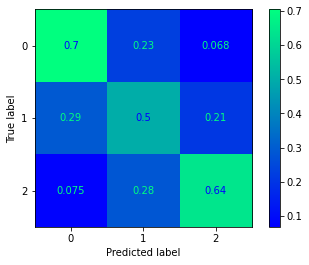

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=3.1853061224489796
Test Accuracy = 0.6259541984732825


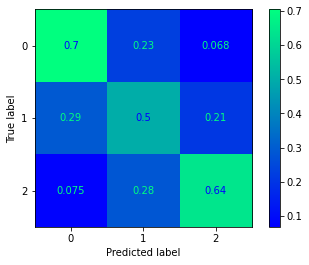

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=3.286122448979592
Test Accuracy = 0.6259541984732825


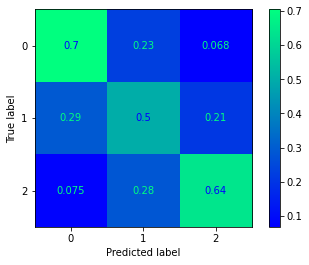

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=3.3869387755102043
Test Accuracy = 0.6259541984732825


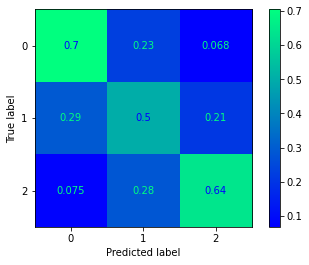

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=3.4877551020408166
Test Accuracy = 0.6259541984732825


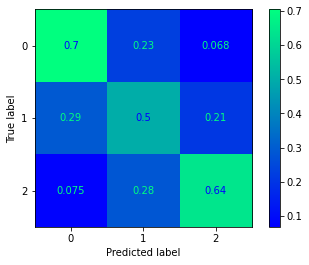

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=3.5885714285714285
Test Accuracy = 0.6259541984732825


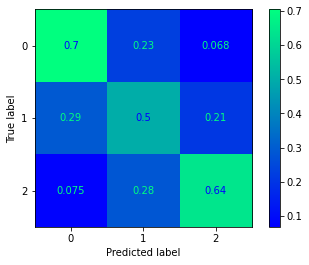

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.625, C=3.689387755102041
Test Accuracy = 0.6259541984732825


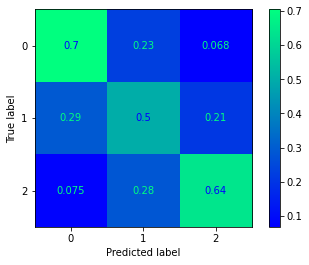

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=3.790204081632653
Test Accuracy = 0.6259541984732825


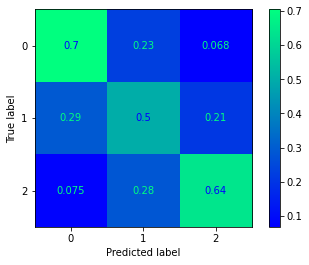

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=3.8910204081632656
Test Accuracy = 0.6259541984732825


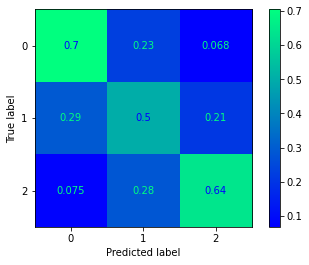

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=3.9918367346938775
Test Accuracy = 0.6259541984732825


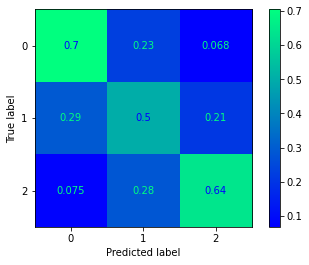

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.09265306122449
Test Accuracy = 0.6259541984732825


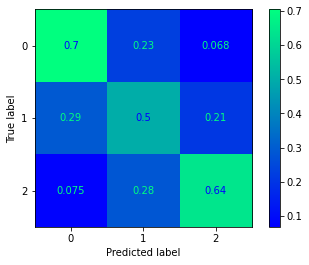

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.193469387755102
Test Accuracy = 0.6259541984732825


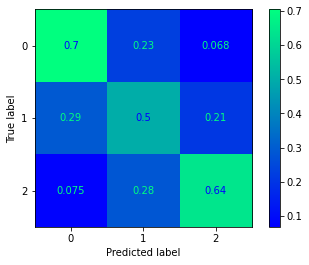

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.294285714285714
Test Accuracy = 0.6259541984732825


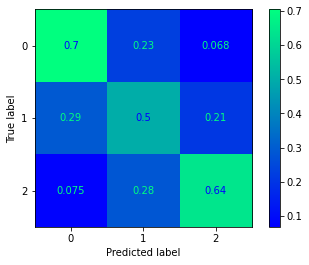

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.395102040816326
Test Accuracy = 0.6259541984732825


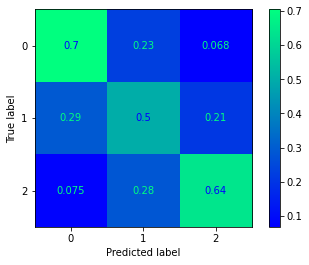

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.495918367346938
Test Accuracy = 0.6259541984732825


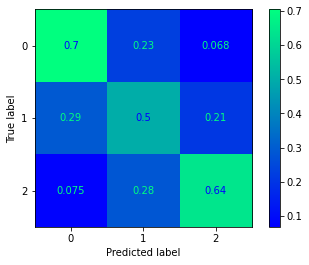

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.596734693877551
Test Accuracy = 0.6259541984732825


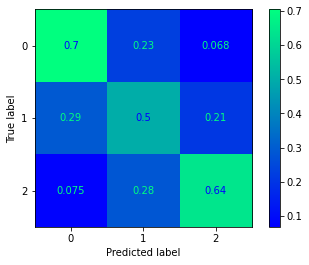

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.697551020408163
Test Accuracy = 0.6259541984732825


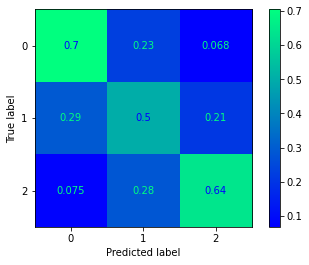

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.798367346938775
Test Accuracy = 0.6259541984732825


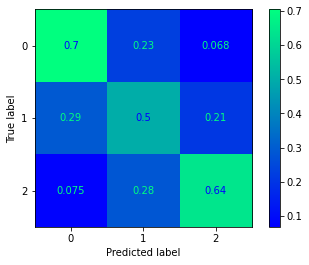

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=4.899183673469388
Test Accuracy = 0.6259541984732825


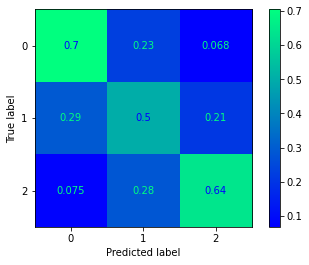

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826

Logistic - L2, Train Accuracy = 0.6269230769230769, C=5.0
Test Accuracy = 0.6259541984732825


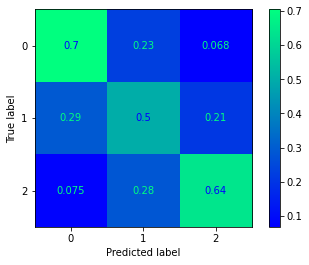

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.64      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2737208933945826



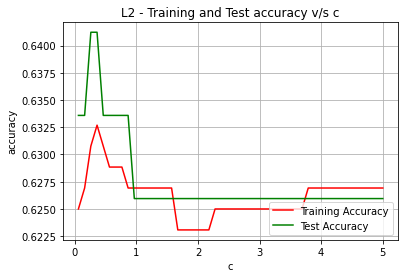

In [78]:
# num_of_different_c = 16
c_logreg = np.linspace(0.06, 5) #, num=num_of_different_c)
c_logreg2 = np.linspace(0.06, 5) #, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, Train Accuracy = 0.6403846153846153, C=0.06
Test Accuracy = 0.6259541984732825


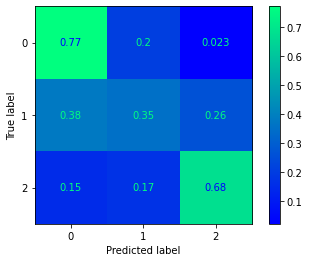

              precision    recall  f1-score   support

           0       0.40      0.35      0.38        34
           1       0.78      0.68      0.73        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21146839854268973

Logistic - L1, Train Accuracy = 0.698076923076923, C=0.16081632653061223
Test Accuracy = 0.6183206106870229


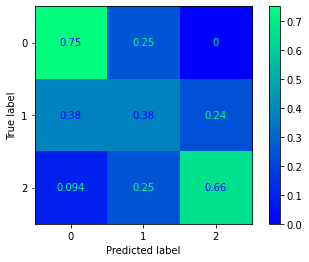

              precision    recall  f1-score   support

           0       0.35      0.38      0.37        34
           1       0.81      0.66      0.73        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7153846153846154, C=0.2616326530612245
Test Accuracy = 0.6259541984732825


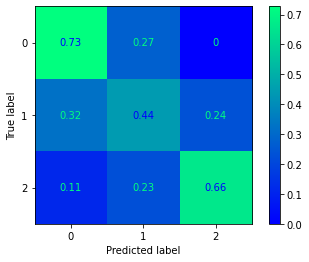

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.81      0.66      0.73        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3048471408205291

Logistic - L1, Train Accuracy = 0.7461538461538462, C=0.36244897959183675
Test Accuracy = 0.6259541984732825


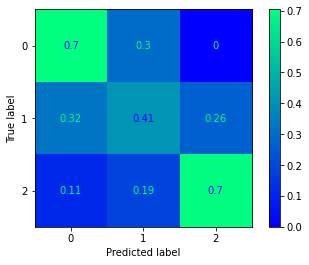

              precision    recall  f1-score   support

           0       0.38      0.41      0.39        34
           1       0.80      0.70      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3048471408205291

Logistic - L1, Train Accuracy = 0.7634615384615384, C=0.463265306122449
Test Accuracy = 0.6259541984732825


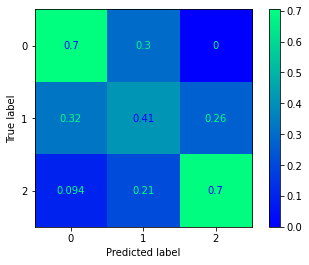

              precision    recall  f1-score   support

           0       0.37      0.41      0.39        34
           1       0.80      0.70      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7673076923076924, C=0.5640816326530613
Test Accuracy = 0.648854961832061


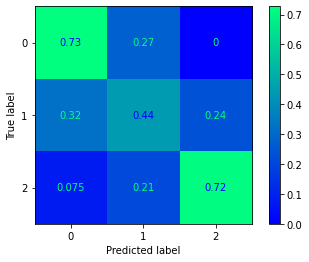

              precision    recall  f1-score   support

           0       0.39      0.44      0.42        34
           1       0.83      0.72      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3982258830983685

Logistic - L1, Train Accuracy = 0.7692307692307693, C=0.6648979591836734
Test Accuracy = 0.648854961832061


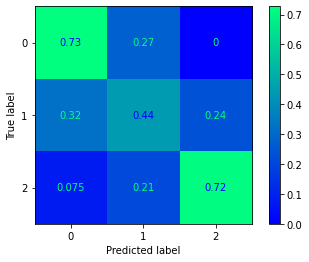

              precision    recall  f1-score   support

           0       0.39      0.44      0.42        34
           1       0.83      0.72      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3982258830983685

Logistic - L1, Train Accuracy = 0.7692307692307693, C=0.7657142857142858
Test Accuracy = 0.648854961832061


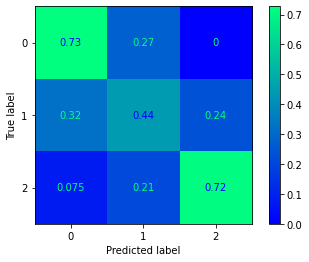

              precision    recall  f1-score   support

           0       0.39      0.44      0.42        34
           1       0.83      0.72      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3982258830983685

Logistic - L1, Train Accuracy = 0.775, C=0.8665306122448979
Test Accuracy = 0.6335877862595419


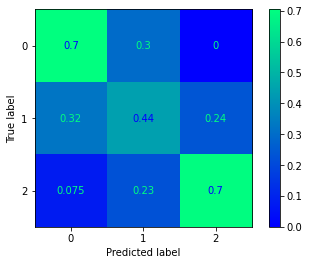

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.70      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.37747505148107086

Logistic - L1, Train Accuracy = 0.7769230769230769, C=0.9673469387755103
Test Accuracy = 0.6259541984732825


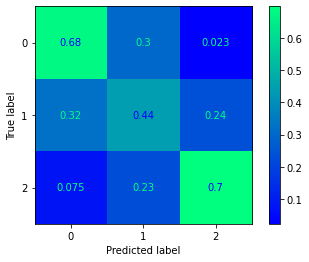

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.80      0.70      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7769230769230769, C=1.0681632653061226
Test Accuracy = 0.6335877862595419


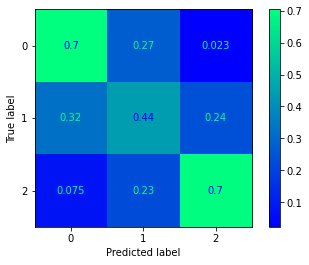

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.80      0.70      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L1, Train Accuracy = 0.7769230769230769, C=1.1689795918367347
Test Accuracy = 0.6335877862595419


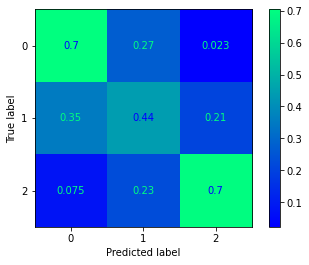

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.70      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L1, Train Accuracy = 0.7769230769230769, C=1.269795918367347
Test Accuracy = 0.6335877862595419


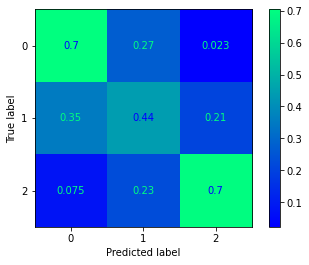

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.70      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L1, Train Accuracy = 0.7769230769230769, C=1.3706122448979592
Test Accuracy = 0.6259541984732825


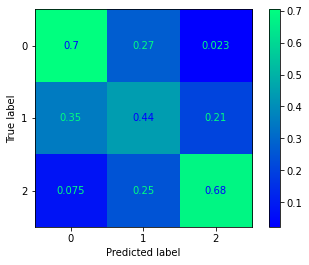

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7788461538461539, C=1.4714285714285715
Test Accuracy = 0.6259541984732825


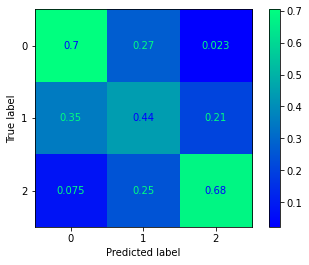

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7807692307692308, C=1.5722448979591837
Test Accuracy = 0.6259541984732825


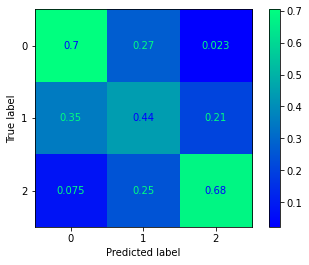

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7846153846153846, C=1.673061224489796
Test Accuracy = 0.6259541984732825


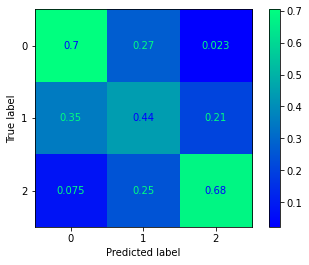

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7846153846153846, C=1.7738775510204083
Test Accuracy = 0.6259541984732825


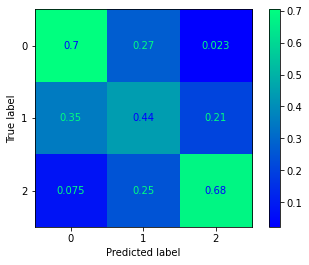

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7826923076923077, C=1.8746938775510205
Test Accuracy = 0.6259541984732825


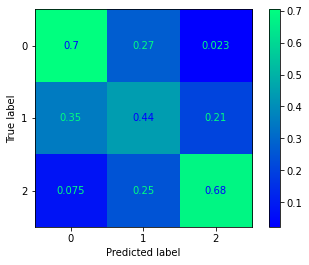

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7826923076923077, C=1.9755102040816328
Test Accuracy = 0.6335877862595419


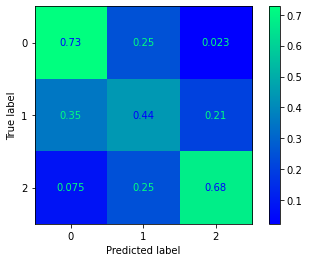

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.076326530612245
Test Accuracy = 0.6259541984732825


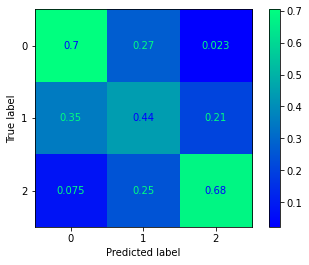

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.177142857142857
Test Accuracy = 0.6259541984732825


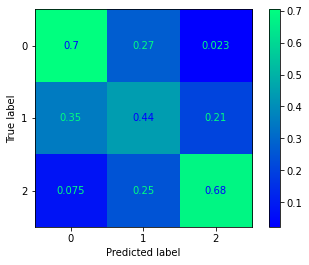

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.2779591836734694
Test Accuracy = 0.6183206106870229


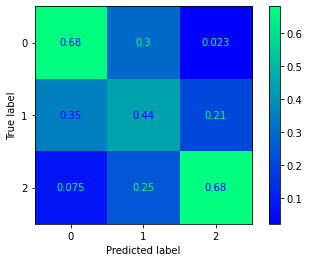

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.3787755102040817
Test Accuracy = 0.6183206106870229


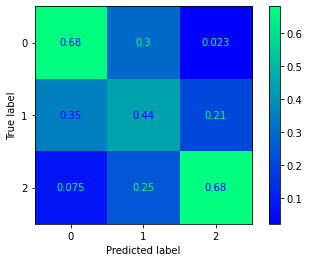

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.479591836734694
Test Accuracy = 0.6183206106870229


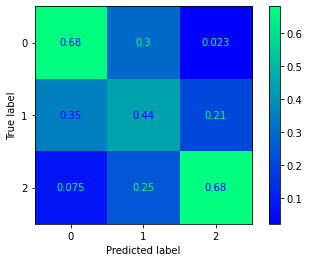

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.5804081632653064
Test Accuracy = 0.6183206106870229


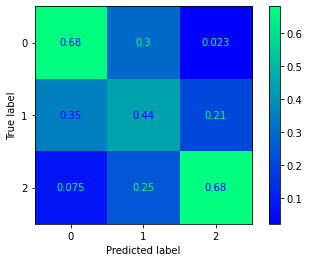

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.6812244897959183
Test Accuracy = 0.6183206106870229


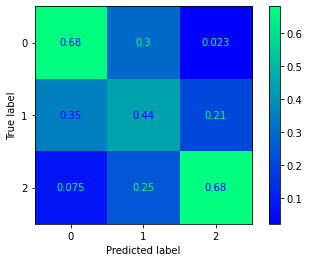

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.7820408163265307
Test Accuracy = 0.6183206106870229


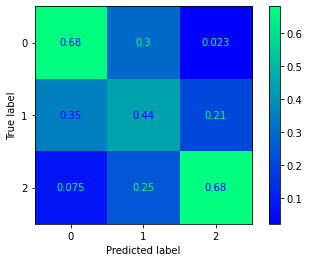

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7826923076923077, C=2.882857142857143
Test Accuracy = 0.6183206106870229


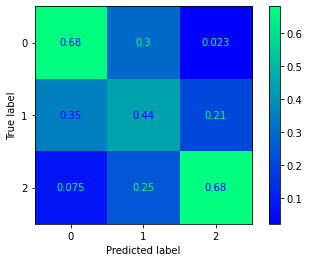

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7846153846153846, C=2.9836734693877554
Test Accuracy = 0.6183206106870229


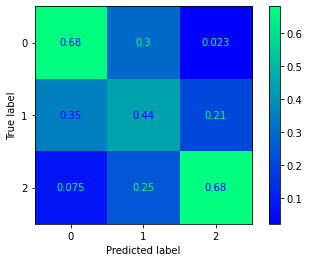

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7846153846153846, C=3.0844897959183672
Test Accuracy = 0.6183206106870229


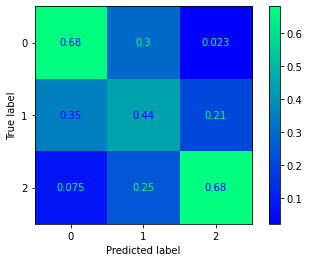

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7846153846153846, C=3.1853061224489796
Test Accuracy = 0.6183206106870229


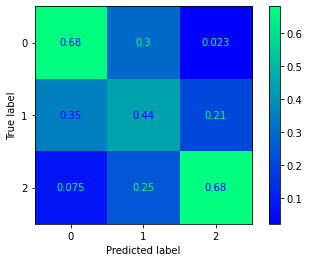

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7846153846153846, C=3.286122448979592
Test Accuracy = 0.6183206106870229


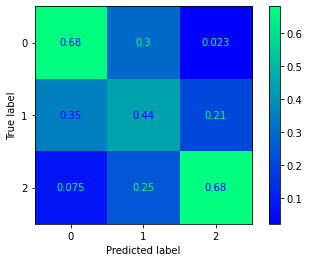

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7846153846153846, C=3.3869387755102043
Test Accuracy = 0.6183206106870229


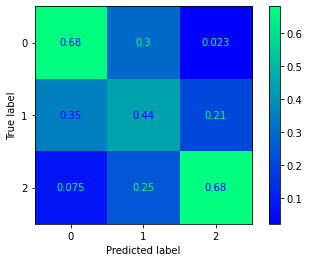

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7846153846153846, C=3.4877551020408166
Test Accuracy = 0.6183206106870229


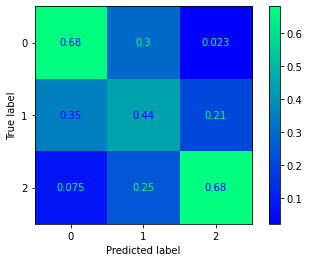

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7865384615384615, C=3.5885714285714285
Test Accuracy = 0.6183206106870229


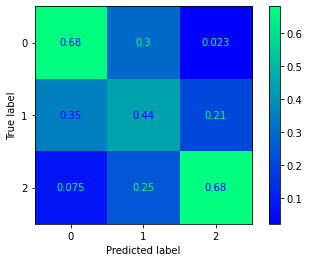

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7865384615384615, C=3.689387755102041
Test Accuracy = 0.6183206106870229


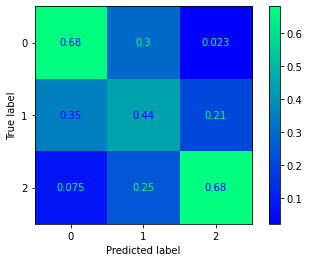

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7884615384615384, C=3.790204081632653
Test Accuracy = 0.6183206106870229


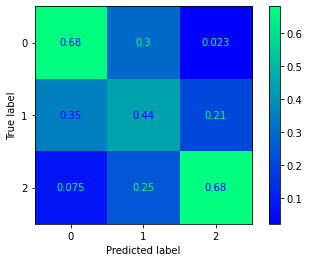

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7903846153846154, C=3.8910204081632656
Test Accuracy = 0.6183206106870229


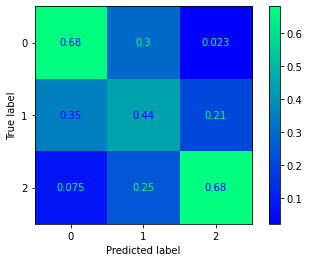

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7903846153846154, C=3.9918367346938775
Test Accuracy = 0.6183206106870229


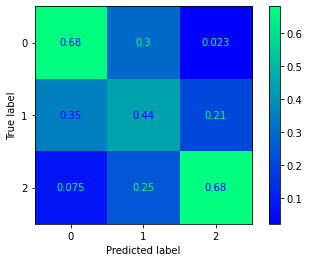

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7903846153846154, C=4.09265306122449
Test Accuracy = 0.6183206106870229


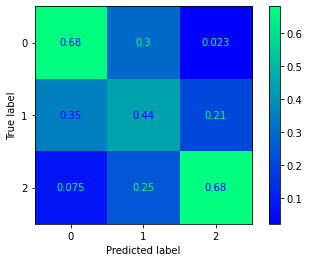

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7903846153846154, C=4.193469387755102
Test Accuracy = 0.6183206106870229


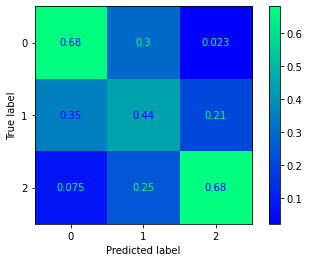

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7923076923076923, C=4.294285714285714
Test Accuracy = 0.6183206106870229


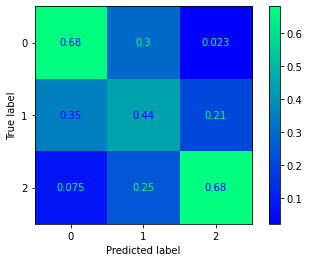

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7923076923076923, C=4.395102040816326
Test Accuracy = 0.6183206106870229


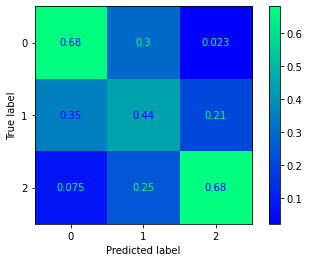

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7923076923076923, C=4.495918367346938
Test Accuracy = 0.6183206106870229


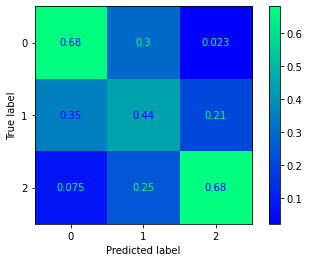

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7923076923076923, C=4.596734693877551
Test Accuracy = 0.6183206106870229


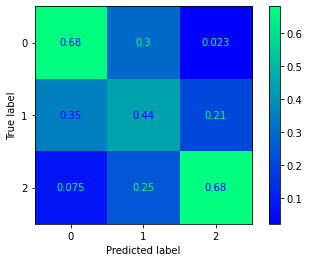

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7923076923076923, C=4.697551020408163
Test Accuracy = 0.6183206106870229


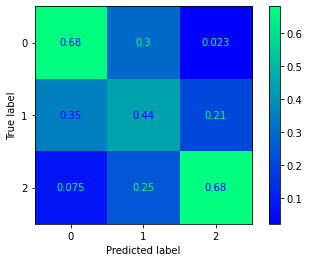

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7923076923076923, C=4.798367346938775
Test Accuracy = 0.6183206106870229


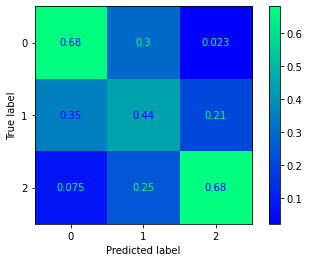

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7923076923076923, C=4.899183673469388
Test Accuracy = 0.6183206106870229


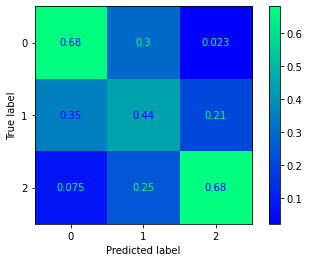

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L1, Train Accuracy = 0.7903846153846154, C=5.0
Test Accuracy = 0.6183206106870229


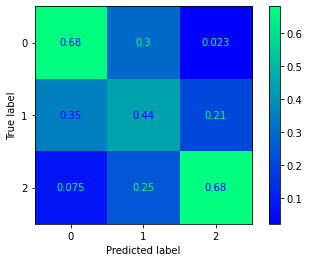

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673



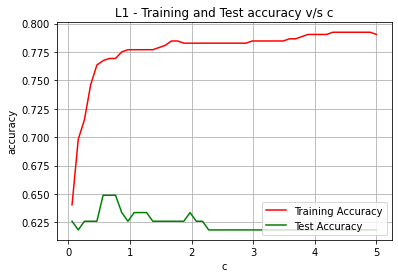

Logistic - L2, Train Accuracy = 0.75, C=0.06
Test Accuracy = 0.6183206106870229


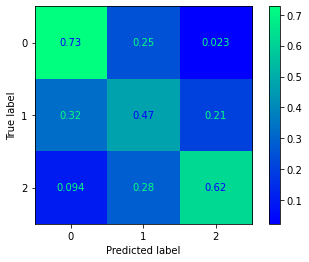

              precision    recall  f1-score   support

           0       0.38      0.47      0.42        34
           1       0.80      0.62      0.70        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.29447172501188024

Logistic - L2, Train Accuracy = 0.775, C=0.16081632653061223
Test Accuracy = 0.6564885496183206


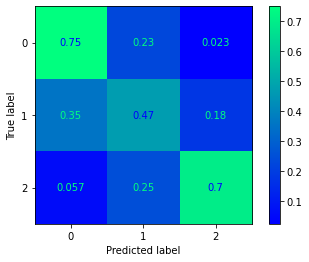

              precision    recall  f1-score   support

           0       0.41      0.47      0.44        34
           1       0.84      0.70      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.40860129890701724

Logistic - L2, Train Accuracy = 0.7826923076923077, C=0.2616326530612245
Test Accuracy = 0.648854961832061


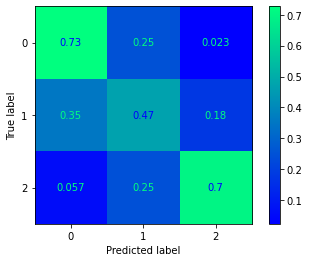

              precision    recall  f1-score   support

           0       0.40      0.47      0.43        34
           1       0.84      0.70      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3982258830983685

Logistic - L2, Train Accuracy = 0.7865384615384615, C=0.36244897959183675
Test Accuracy = 0.6335877862595419


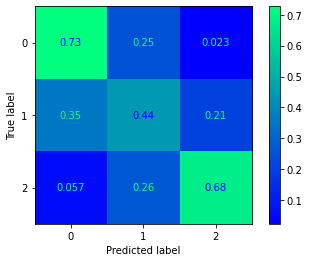

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.37747505148107086

Logistic - L2, Train Accuracy = 0.7865384615384615, C=0.463265306122449
Test Accuracy = 0.6335877862595419


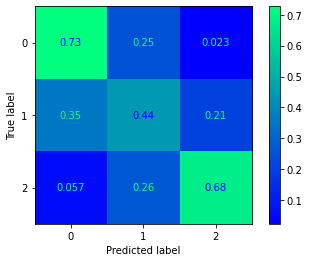

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.37747505148107086

Logistic - L2, Train Accuracy = 0.7865384615384615, C=0.5640816326530613
Test Accuracy = 0.6183206106870229


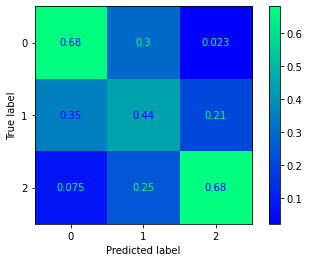

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.7884615384615384, C=0.6648979591836734
Test Accuracy = 0.6183206106870229


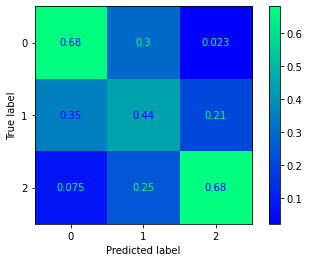

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.7923076923076923, C=0.7657142857142858
Test Accuracy = 0.6106870229007634


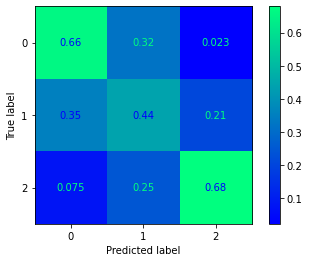

              precision    recall  f1-score   support

           0       0.36      0.44      0.39        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.31522255662917786

Logistic - L2, Train Accuracy = 0.7942307692307692, C=0.8665306122448979
Test Accuracy = 0.6106870229007634


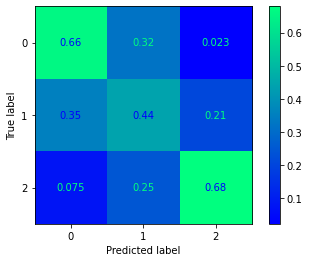

              precision    recall  f1-score   support

           0       0.36      0.44      0.39        34
           1       0.82      0.68      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.31522255662917786

Logistic - L2, Train Accuracy = 0.7942307692307692, C=0.9673469387755103
Test Accuracy = 0.6183206106870229


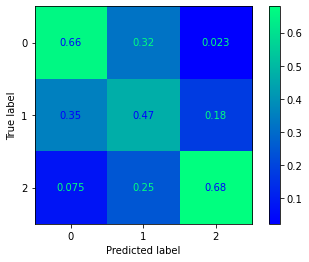

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.7961538461538461, C=1.0681632653061226
Test Accuracy = 0.6183206106870229


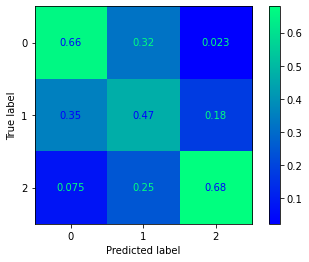

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.801923076923077, C=1.1689795918367347
Test Accuracy = 0.6183206106870229


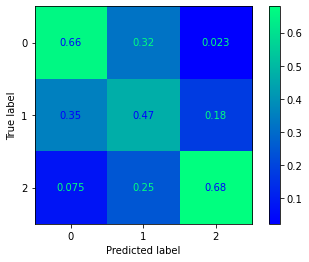

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.801923076923077, C=1.269795918367347
Test Accuracy = 0.6183206106870229


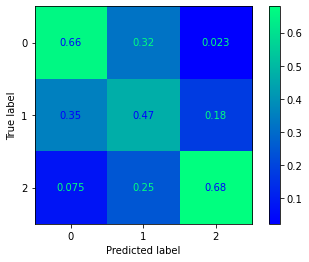

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.801923076923077, C=1.3706122448979592
Test Accuracy = 0.6183206106870229


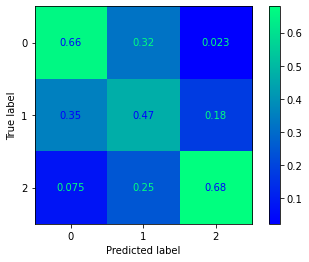

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8038461538461539, C=1.4714285714285715
Test Accuracy = 0.6183206106870229


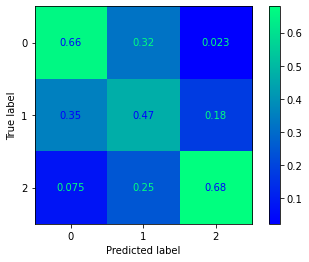

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8057692307692308, C=1.5722448979591837
Test Accuracy = 0.6183206106870229


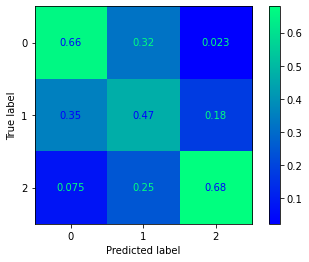

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8057692307692308, C=1.673061224489796
Test Accuracy = 0.6183206106870229


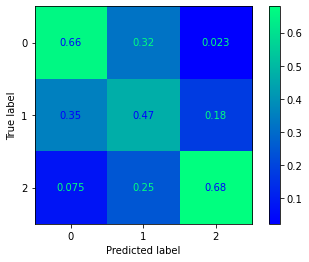

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8057692307692308, C=1.7738775510204083
Test Accuracy = 0.6183206106870229


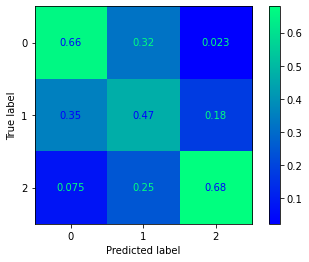

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8057692307692308, C=1.8746938775510205
Test Accuracy = 0.6183206106870229


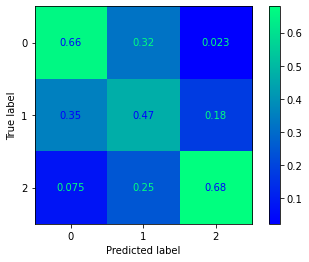

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8057692307692308, C=1.9755102040816328
Test Accuracy = 0.6183206106870229


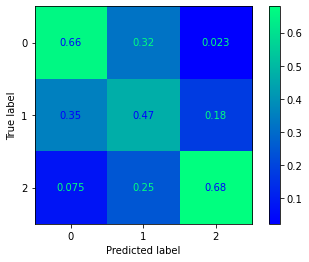

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8076923076923077, C=2.076326530612245
Test Accuracy = 0.6183206106870229


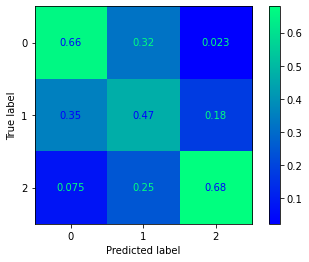

              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.84      0.68      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8096153846153846, C=2.177142857142857
Test Accuracy = 0.6259541984732825


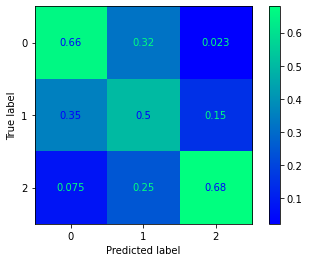

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8115384615384615, C=2.2779591836734694
Test Accuracy = 0.6259541984732825


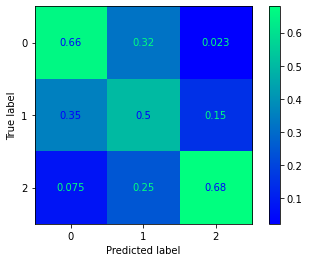

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8096153846153846, C=2.3787755102040817
Test Accuracy = 0.6259541984732825


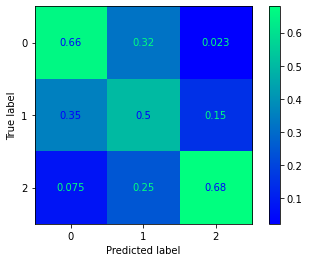

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8096153846153846, C=2.479591836734694
Test Accuracy = 0.6259541984732825


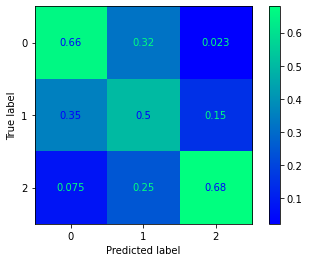

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8134615384615385, C=2.5804081632653064
Test Accuracy = 0.6259541984732825


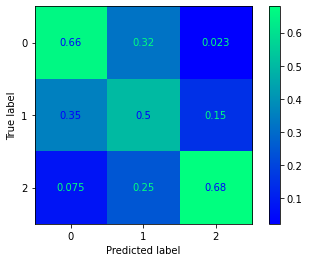

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8134615384615385, C=2.6812244897959183
Test Accuracy = 0.6259541984732825


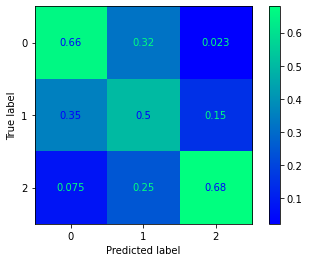

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8134615384615385, C=2.7820408163265307
Test Accuracy = 0.6259541984732825


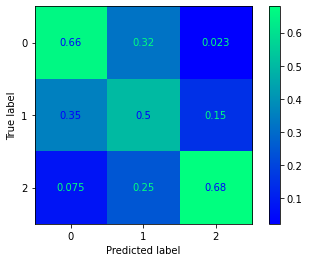

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8134615384615385, C=2.882857142857143
Test Accuracy = 0.6183206106870229


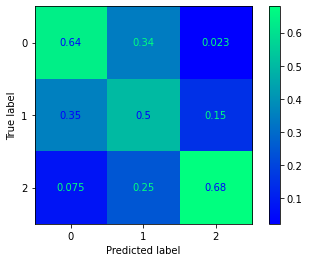

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8134615384615385, C=2.9836734693877554
Test Accuracy = 0.6183206106870229


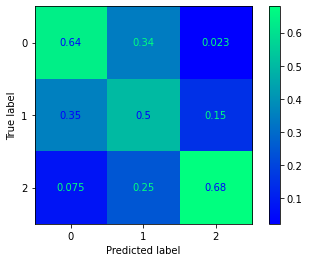

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.0844897959183672
Test Accuracy = 0.6183206106870229


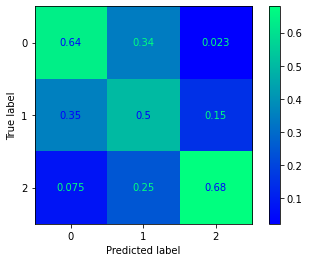

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.1853061224489796
Test Accuracy = 0.6183206106870229


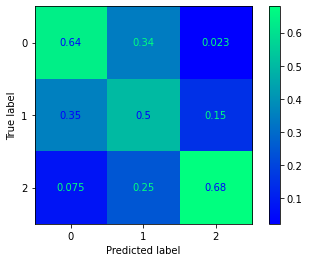

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.86      0.68      0.76        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.32559797243782673

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.286122448979592
Test Accuracy = 0.6259541984732825


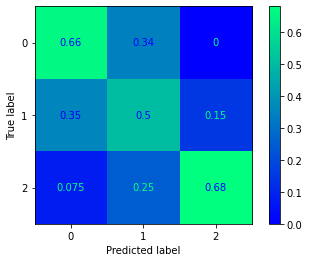

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.88      0.68      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.367099635672422

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.3869387755102043
Test Accuracy = 0.6259541984732825


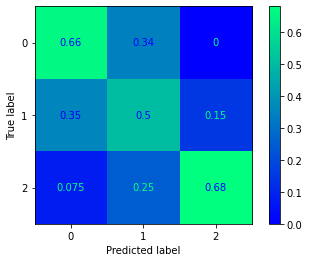

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.88      0.68      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.367099635672422

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.4877551020408166
Test Accuracy = 0.6259541984732825


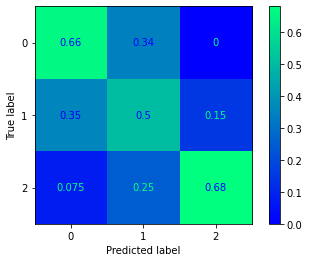

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.88      0.68      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.367099635672422

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.5885714285714285
Test Accuracy = 0.6259541984732825


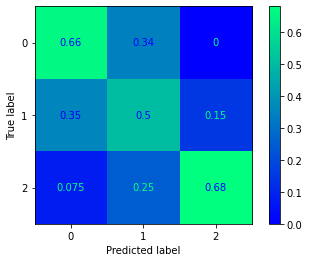

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.88      0.68      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.367099635672422

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.689387755102041
Test Accuracy = 0.6259541984732825


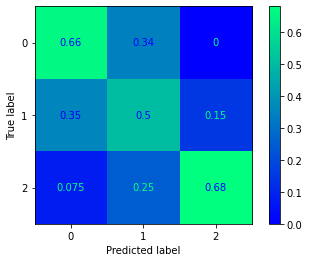

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.88      0.68      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.367099635672422

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.790204081632653
Test Accuracy = 0.6259541984732825


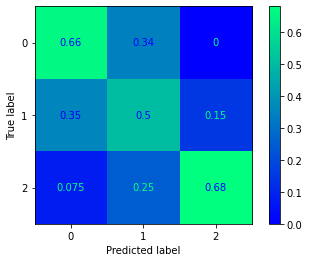

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.88      0.68      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.367099635672422

Logistic - L2, Train Accuracy = 0.8115384615384615, C=3.8910204081632656
Test Accuracy = 0.6259541984732825


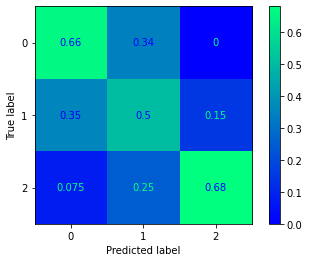

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        34
           1       0.88      0.68      0.77        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.367099635672422

Logistic - L2, Train Accuracy = 0.8096153846153846, C=3.9918367346938775
Test Accuracy = 0.6183206106870229


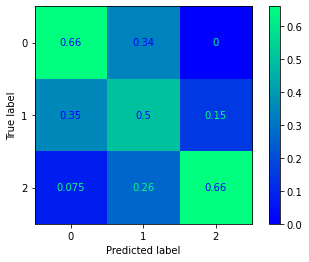

              precision    recall  f1-score   support

           0       0.37      0.50      0.42        34
           1       0.88      0.66      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.35672421986377323

Logistic - L2, Train Accuracy = 0.8096153846153846, C=4.09265306122449
Test Accuracy = 0.6106870229007634


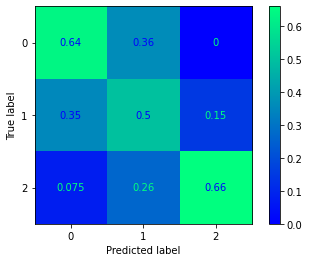

              precision    recall  f1-score   support

           0       0.36      0.50      0.42        34
           1       0.88      0.66      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L2, Train Accuracy = 0.8096153846153846, C=4.193469387755102
Test Accuracy = 0.6106870229007634


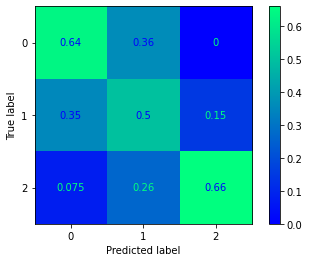

              precision    recall  f1-score   support

           0       0.36      0.50      0.42        34
           1       0.88      0.66      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L2, Train Accuracy = 0.8096153846153846, C=4.294285714285714
Test Accuracy = 0.6106870229007634


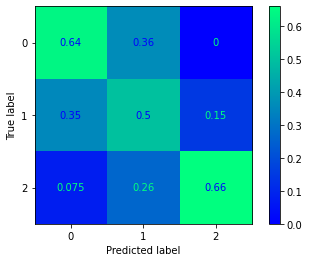

              precision    recall  f1-score   support

           0       0.36      0.50      0.42        34
           1       0.88      0.66      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L2, Train Accuracy = 0.8115384615384615, C=4.395102040816326
Test Accuracy = 0.6106870229007634


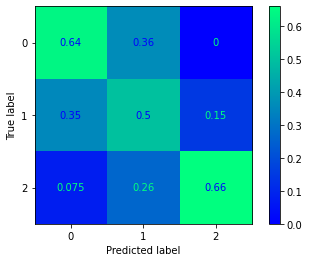

              precision    recall  f1-score   support

           0       0.36      0.50      0.42        34
           1       0.88      0.66      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L2, Train Accuracy = 0.8096153846153846, C=4.495918367346938
Test Accuracy = 0.6106870229007634


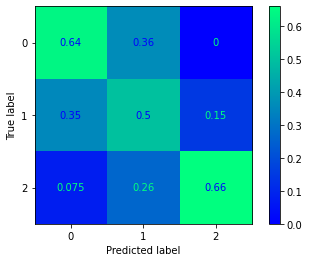

              precision    recall  f1-score   support

           0       0.36      0.50      0.42        34
           1       0.88      0.66      0.75        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.34634880405512436

Logistic - L2, Train Accuracy = 0.8096153846153846, C=4.596734693877551
Test Accuracy = 0.6030534351145038


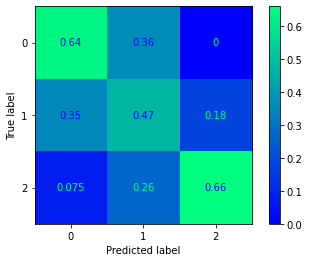

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        34
           1       0.85      0.66      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8096153846153846, C=4.697551020408163
Test Accuracy = 0.6030534351145038


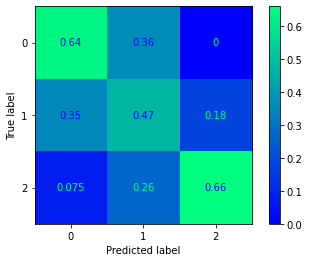

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        34
           1       0.85      0.66      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8096153846153846, C=4.798367346938775
Test Accuracy = 0.6030534351145038


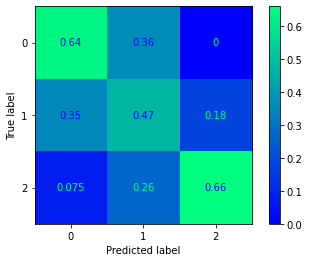

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        34
           1       0.85      0.66      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8096153846153846, C=4.899183673469388
Test Accuracy = 0.6030534351145038


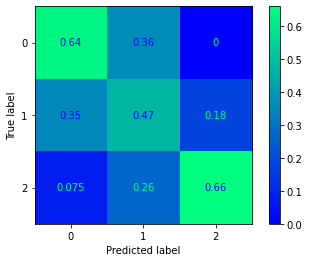

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        34
           1       0.85      0.66      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755

Logistic - L2, Train Accuracy = 0.8096153846153846, C=5.0
Test Accuracy = 0.6030534351145038


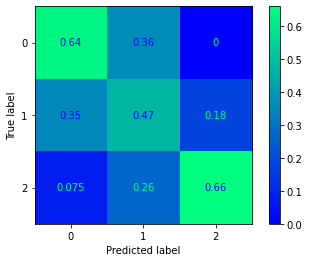

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        34
           1       0.85      0.66      0.74        53
           2       0.00      0.00      0.00         0
		 R2 Score: 0.3359733882464755



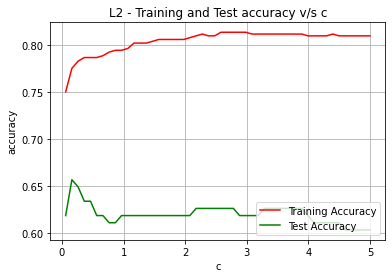

In [79]:
# Create an object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

# c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
# c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)

# Train White Wines Data

In [80]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([   0,    0,    0,   20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([1060, 1060, 1060]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (4898, 12)
y[:10]:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
X[:10, :]:
[[5.90000000e+00 2.60000000e-01 2.50000000e-01 1.25000000e+01
  3.40000000e-02 3.80000000e+01 1.52000000e+02 9.97700000e-01
  3.33000000e+00 4.30000000e-01 9.40000000e+00]
 [5.20000000e+00 2.20000000e-01 4.60000000e-01 6.20000000e+00
  6.60000000e-02 4.10000000e+01 1.87000000e+02 9.93620000e-01
  3.19000000e+00 4.20000000e-01 9.73333333e+00]
 [7.30000000e+00 2.50000000e-01 2.90000000e-01 7.50000000e+00
  4.90000000e-02 3.80000000e+01 1.58000000e+02 9.96500000e-01
  3.43000000e+00 3.80000000e-01 9.60000000e+00]
 [6.30000000e+00 2.70000000e-01 4.60000000e-01 1.11000000e+01
  5.30000000e-02 4.40000000e+01 1.77000000e+02 9.96910000e-01
  3.18000000e+00 6.70000000e-01 9.4

Logistic - L1, Train Accuracy = 0.5699685534591195, C=0.06
Test Accuracy = 0.5817610062893082


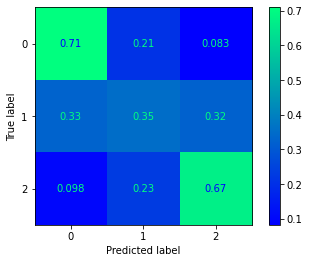

              precision    recall  f1-score   support

           0       0.43      0.35      0.39       205
           1       0.63      0.67      0.65       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11133973229432292

Logistic - L1, Train Accuracy = 0.574685534591195, C=0.16081632653061223
Test Accuracy = 0.6069182389937107


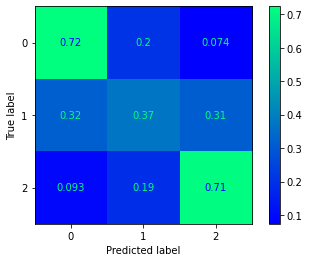

              precision    recall  f1-score   support

           0       0.47      0.37      0.42       205
           1       0.66      0.71      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1693462771837274

Logistic - L1, Train Accuracy = 0.5707547169811321, C=0.2616326530612245
Test Accuracy = 0.6053459119496856


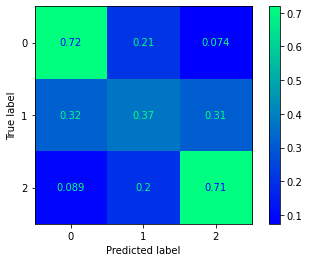

              precision    recall  f1-score   support

           0       0.47      0.37      0.41       205
           1       0.66      0.71      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17398680077487982

Logistic - L1, Train Accuracy = 0.5699685534591195, C=0.36244897959183675
Test Accuracy = 0.6037735849056604


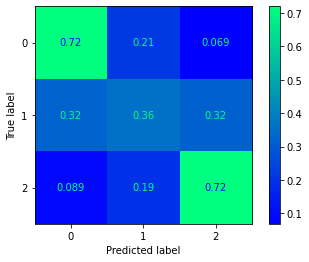

              precision    recall  f1-score   support

           0       0.46      0.36      0.40       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17862732436603213

Logistic - L1, Train Accuracy = 0.5687893081761006, C=0.463265306122449
Test Accuracy = 0.60062893081761


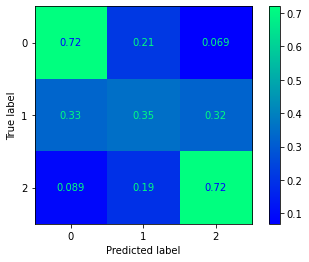

              precision    recall  f1-score   support

           0       0.45      0.35      0.40       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17398680077487982

Logistic - L1, Train Accuracy = 0.5687893081761006, C=0.5640816326530613
Test Accuracy = 0.6022012578616353


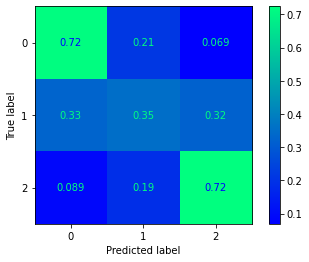

              precision    recall  f1-score   support

           0       0.46      0.35      0.40       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17630706257045603

Logistic - L1, Train Accuracy = 0.5683962264150944, C=0.6648979591836734
Test Accuracy = 0.6037735849056604


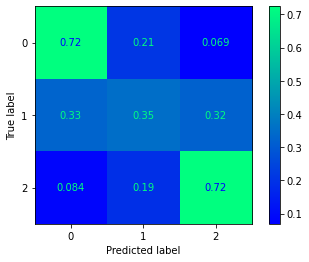

              precision    recall  f1-score   support

           0       0.46      0.35      0.40       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18558810975276074

Logistic - L1, Train Accuracy = 0.5683962264150944, C=0.7657142857142858
Test Accuracy = 0.6053459119496856


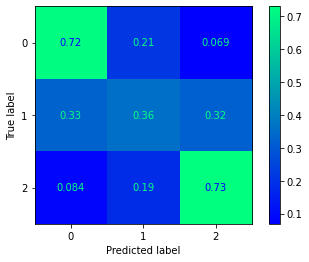

              precision    recall  f1-score   support

           0       0.46      0.36      0.40       205
           1       0.66      0.73      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5680031446540881, C=0.8665306122448979
Test Accuracy = 0.6053459119496856


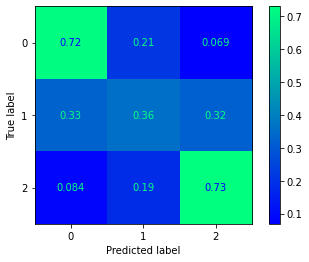

              precision    recall  f1-score   support

           0       0.46      0.36      0.40       205
           1       0.66      0.73      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=0.9673469387755103
Test Accuracy = 0.6053459119496856


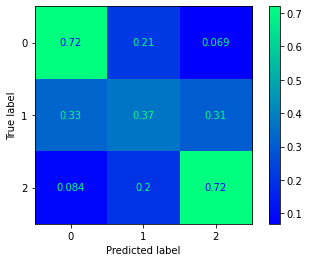

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5691823899371069, C=1.0681632653061226
Test Accuracy = 0.6053459119496856


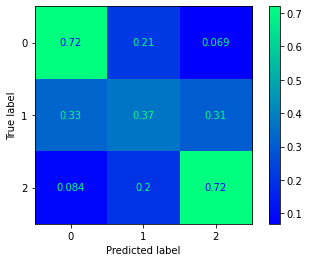

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=1.1689795918367347
Test Accuracy = 0.6037735849056604


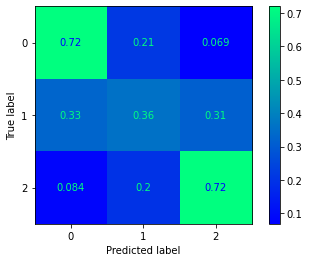

              precision    recall  f1-score   support

           0       0.46      0.36      0.40       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18558810975276074

Logistic - L1, Train Accuracy = 0.5683962264150944, C=1.269795918367347
Test Accuracy = 0.6053459119496856


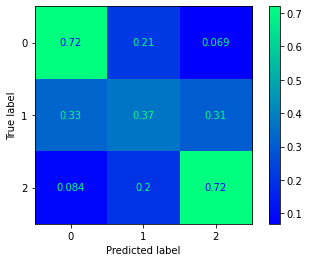

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5680031446540881, C=1.3706122448979592
Test Accuracy = 0.6053459119496856


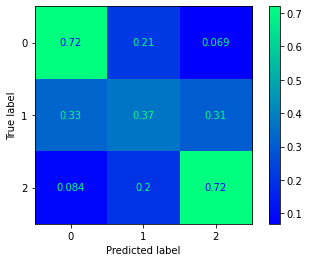

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5676100628930818, C=1.4714285714285715
Test Accuracy = 0.6053459119496856


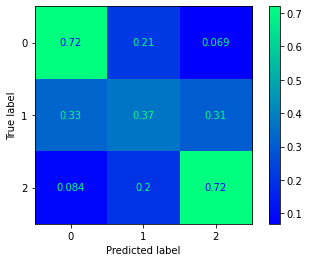

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5676100628930818, C=1.5722448979591837
Test Accuracy = 0.6053459119496856


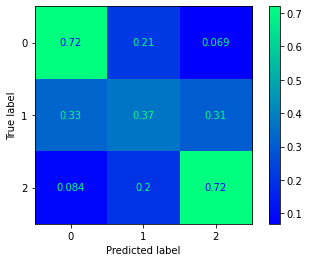

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5676100628930818, C=1.673061224489796
Test Accuracy = 0.6053459119496856


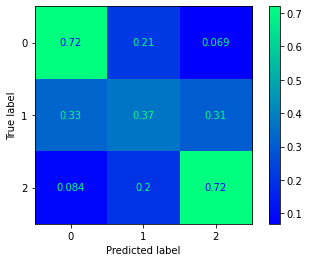

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5680031446540881, C=1.7738775510204083
Test Accuracy = 0.6053459119496856


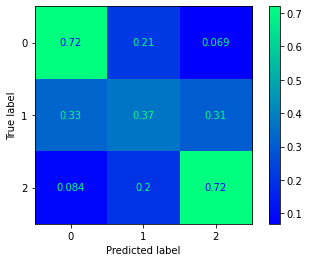

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5680031446540881, C=1.8746938775510205
Test Accuracy = 0.6053459119496856


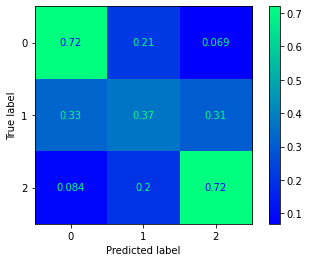

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5680031446540881, C=1.9755102040816328
Test Accuracy = 0.6053459119496856


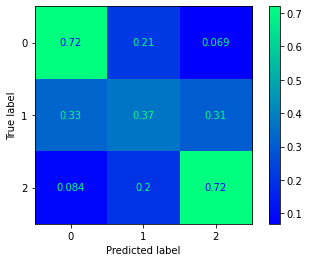

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5680031446540881, C=2.076326530612245
Test Accuracy = 0.6053459119496856


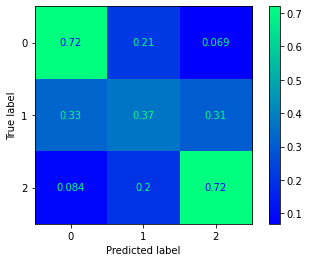

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=2.177142857142857
Test Accuracy = 0.6053459119496856


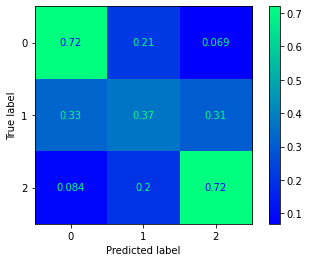

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=2.2779591836734694
Test Accuracy = 0.6053459119496856


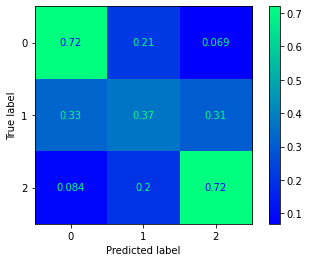

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=2.3787755102040817
Test Accuracy = 0.6053459119496856


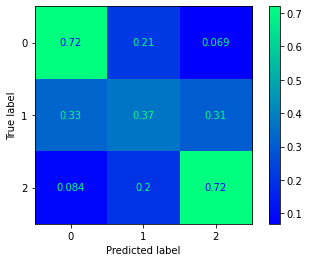

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=2.479591836734694
Test Accuracy = 0.6053459119496856


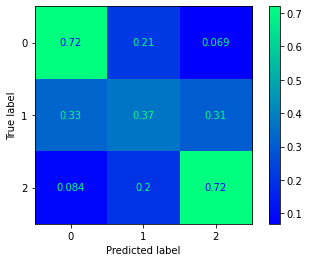

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=2.5804081632653064
Test Accuracy = 0.6053459119496856


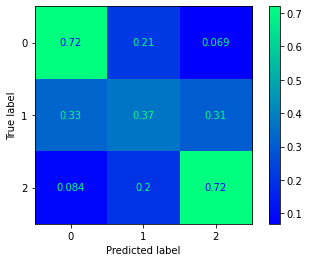

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=2.6812244897959183
Test Accuracy = 0.6053459119496856


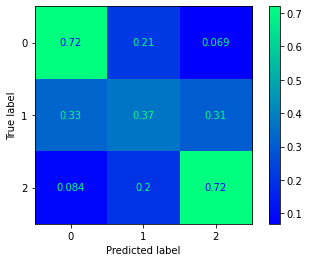

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=2.7820408163265307
Test Accuracy = 0.6053459119496856


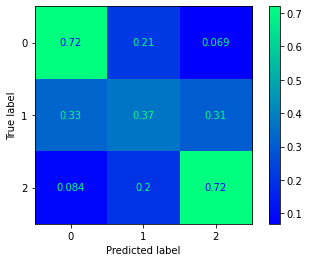

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=2.882857142857143
Test Accuracy = 0.6053459119496856


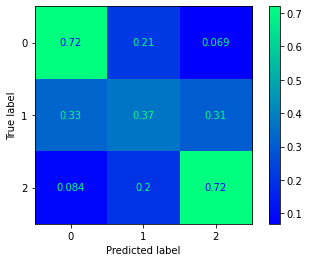

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=2.9836734693877554
Test Accuracy = 0.6053459119496856


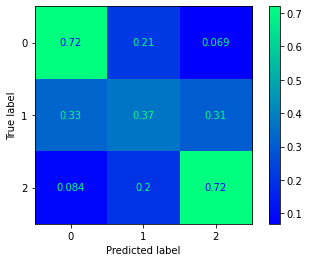

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=3.0844897959183672
Test Accuracy = 0.6053459119496856


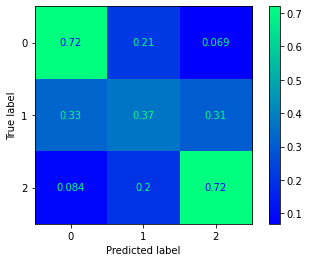

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=3.1853061224489796
Test Accuracy = 0.6053459119496856


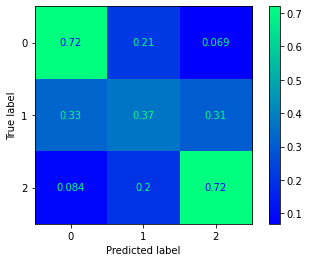

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=3.286122448979592
Test Accuracy = 0.6053459119496856


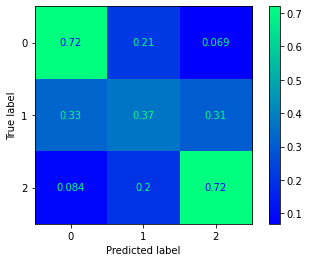

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=3.3869387755102043
Test Accuracy = 0.6053459119496856


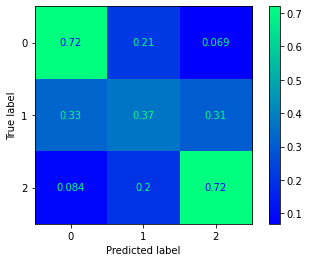

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=3.4877551020408166
Test Accuracy = 0.6053459119496856


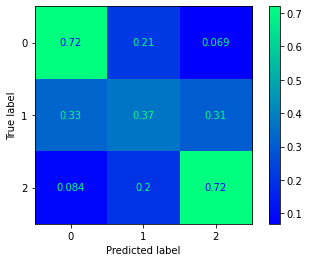

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=3.5885714285714285
Test Accuracy = 0.6053459119496856


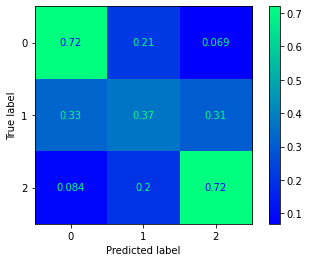

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=3.689387755102041
Test Accuracy = 0.6053459119496856


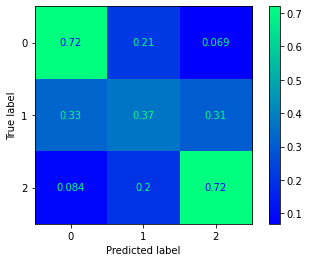

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=3.790204081632653
Test Accuracy = 0.6053459119496856


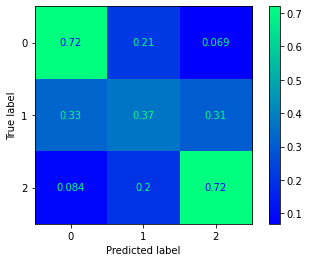

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5687893081761006, C=3.8910204081632656
Test Accuracy = 0.6053459119496856


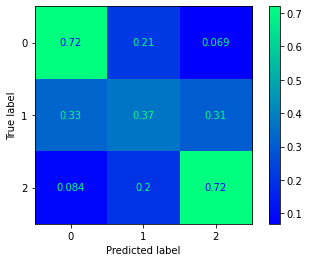

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=3.9918367346938775
Test Accuracy = 0.6053459119496856


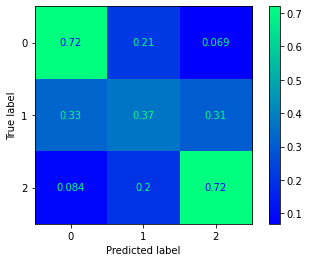

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.09265306122449
Test Accuracy = 0.6053459119496856


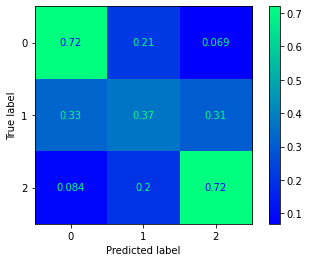

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.193469387755102
Test Accuracy = 0.6053459119496856


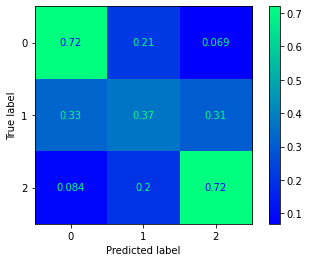

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.294285714285714
Test Accuracy = 0.6053459119496856


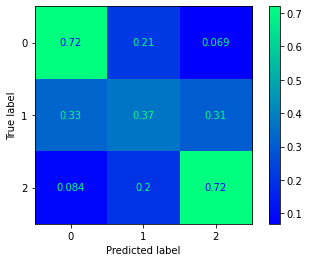

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.395102040816326
Test Accuracy = 0.6053459119496856


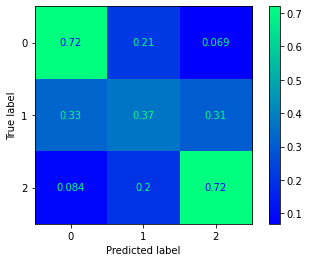

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.495918367346938
Test Accuracy = 0.6053459119496856


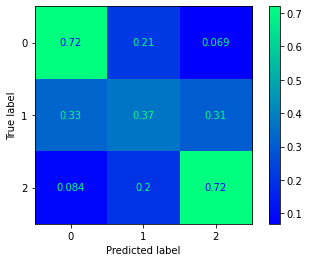

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.596734693877551
Test Accuracy = 0.6053459119496856


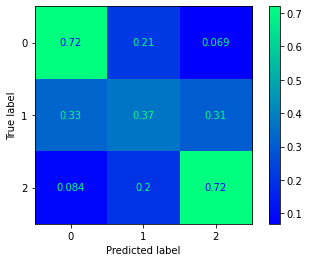

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.697551020408163
Test Accuracy = 0.6069182389937107


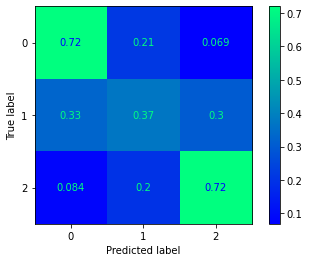

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.798367346938775
Test Accuracy = 0.6069182389937107


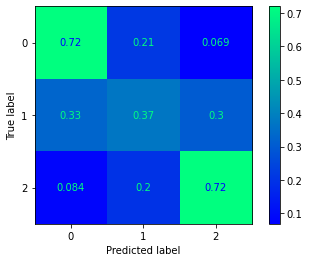

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L1, Train Accuracy = 0.5683962264150944, C=4.899183673469388
Test Accuracy = 0.6069182389937107


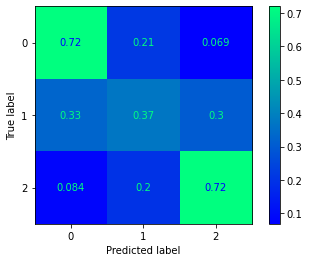

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L1, Train Accuracy = 0.5683962264150944, C=5.0
Test Accuracy = 0.6069182389937107


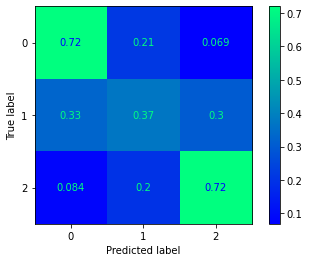

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305



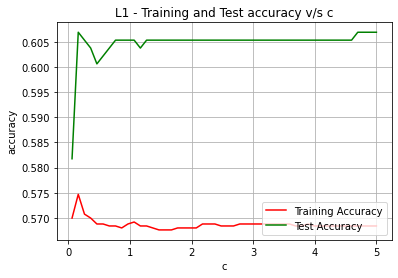

Logistic - L2, Train Accuracy = 0.5691823899371069, C=0.06
Test Accuracy = 0.5990566037735849


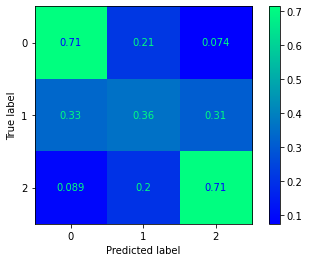

              precision    recall  f1-score   support

           0       0.45      0.36      0.40       205
           1       0.66      0.71      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1647057535925751

Logistic - L2, Train Accuracy = 0.5676100628930818, C=0.16081632653061223
Test Accuracy = 0.5990566037735849


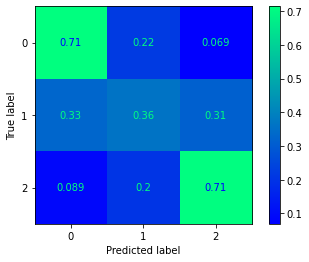

              precision    recall  f1-score   support

           0       0.45      0.36      0.40       205
           1       0.66      0.71      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17166653897930362

Logistic - L2, Train Accuracy = 0.5695754716981132, C=0.2616326530612245
Test Accuracy = 0.6037735849056604


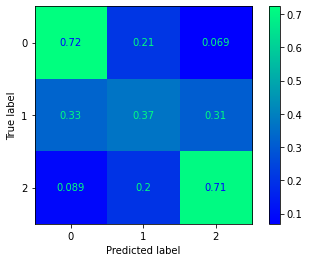

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.71      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17862732436603213

Logistic - L2, Train Accuracy = 0.5680031446540881, C=0.36244897959183675
Test Accuracy = 0.6069182389937107


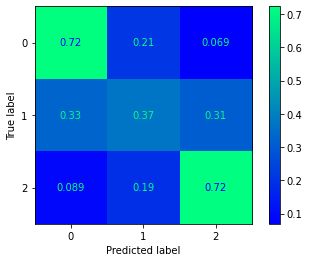

              precision    recall  f1-score   support

           0       0.47      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18326784795718454

Logistic - L2, Train Accuracy = 0.5680031446540881, C=0.463265306122449
Test Accuracy = 0.6069182389937107


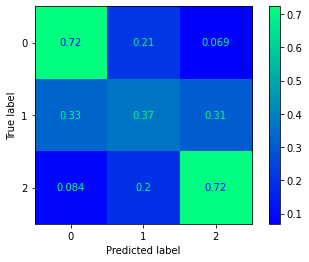

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5687893081761006, C=0.5640816326530613
Test Accuracy = 0.6069182389937107


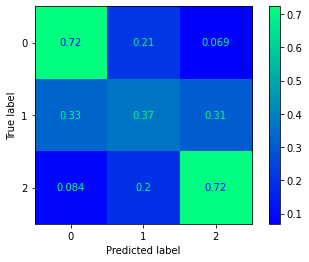

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5683962264150944, C=0.6648979591836734
Test Accuracy = 0.6022012578616353


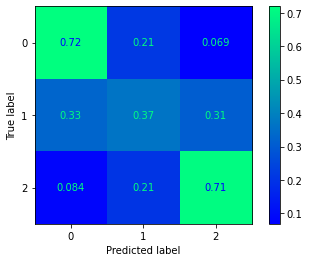

              precision    recall  f1-score   support

           0       0.45      0.37      0.41       205
           1       0.66      0.71      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18326784795718454

Logistic - L2, Train Accuracy = 0.5691823899371069, C=0.7657142857142858
Test Accuracy = 0.6037735849056604


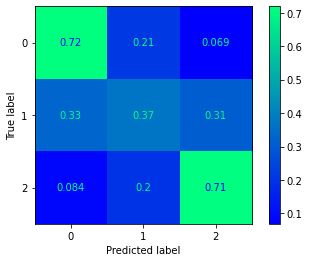

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.71      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18558810975276074

Logistic - L2, Train Accuracy = 0.5695754716981132, C=0.8665306122448979
Test Accuracy = 0.6037735849056604


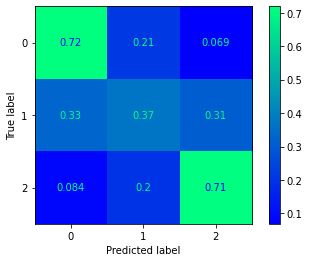

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.71      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18558810975276074

Logistic - L2, Train Accuracy = 0.5691823899371069, C=0.9673469387755103
Test Accuracy = 0.6037735849056604


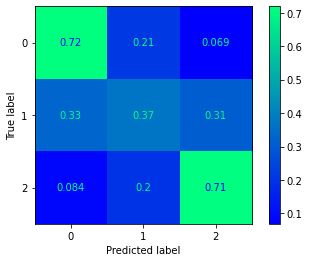

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.71      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18558810975276074

Logistic - L2, Train Accuracy = 0.5691823899371069, C=1.0681632653061226
Test Accuracy = 0.6053459119496856


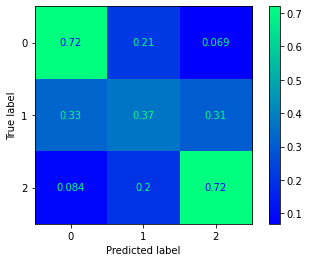

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5699685534591195, C=1.1689795918367347
Test Accuracy = 0.6069182389937107


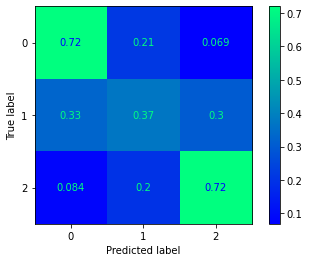

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5699685534591195, C=1.269795918367347
Test Accuracy = 0.6069182389937107


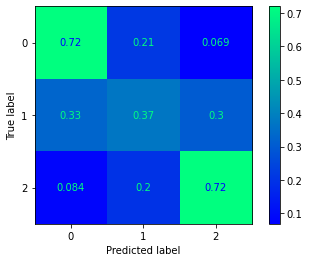

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5683962264150944, C=1.3706122448979592
Test Accuracy = 0.6069182389937107


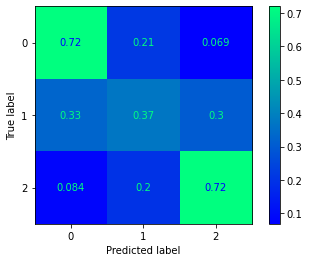

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5683962264150944, C=1.4714285714285715
Test Accuracy = 0.6069182389937107


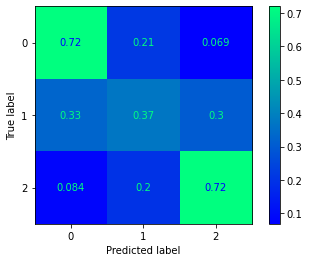

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5683962264150944, C=1.5722448979591837
Test Accuracy = 0.6053459119496856


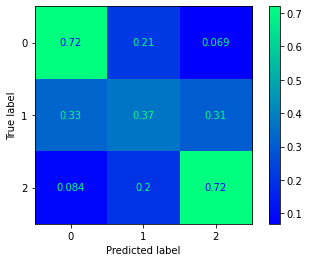

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5691823899371069, C=1.673061224489796
Test Accuracy = 0.6069182389937107


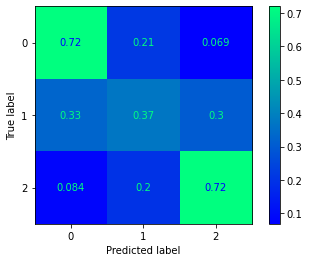

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5691823899371069, C=1.7738775510204083
Test Accuracy = 0.6069182389937107


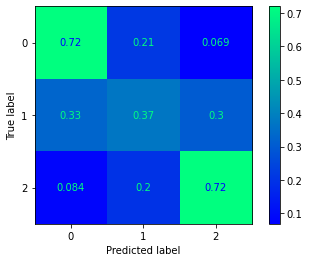

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5691823899371069, C=1.8746938775510205
Test Accuracy = 0.6069182389937107


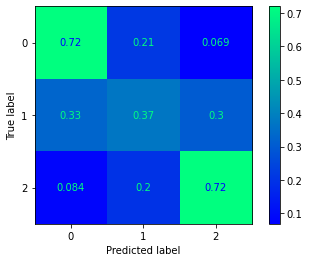

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5691823899371069, C=1.9755102040816328
Test Accuracy = 0.6069182389937107


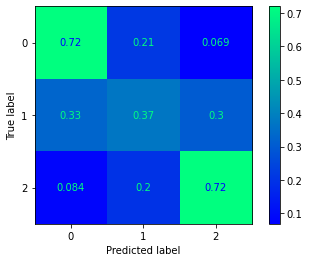

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5695754716981132, C=2.076326530612245
Test Accuracy = 0.6053459119496856


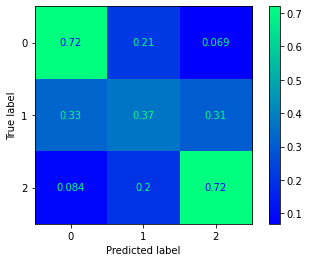

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5695754716981132, C=2.177142857142857
Test Accuracy = 0.6053459119496856


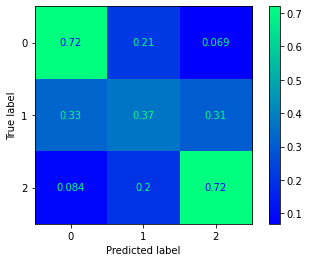

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=2.2779591836734694
Test Accuracy = 0.6053459119496856


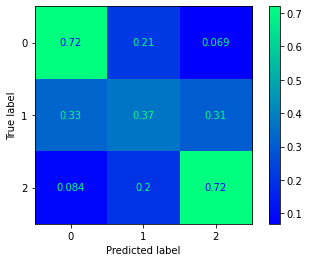

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=2.3787755102040817
Test Accuracy = 0.6053459119496856


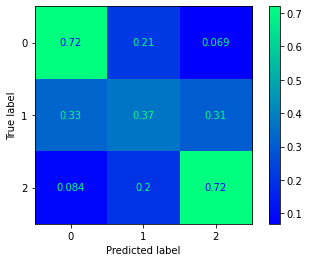

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=2.479591836734694
Test Accuracy = 0.6053459119496856


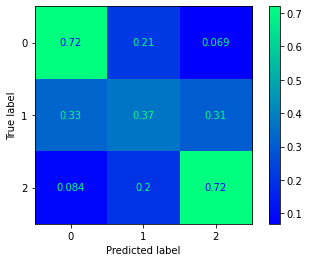

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=2.5804081632653064
Test Accuracy = 0.6053459119496856


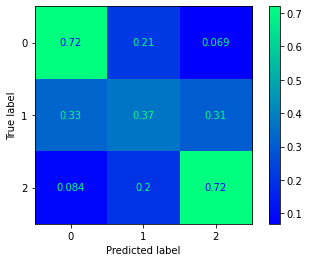

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=2.6812244897959183
Test Accuracy = 0.6053459119496856


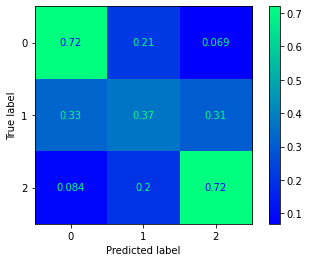

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=2.7820408163265307
Test Accuracy = 0.6053459119496856


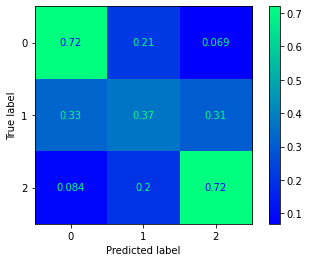

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=2.882857142857143
Test Accuracy = 0.6053459119496856


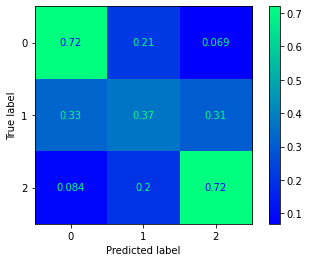

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=2.9836734693877554
Test Accuracy = 0.6053459119496856


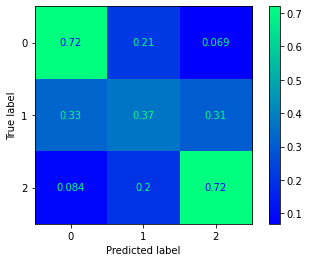

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=3.0844897959183672
Test Accuracy = 0.6053459119496856


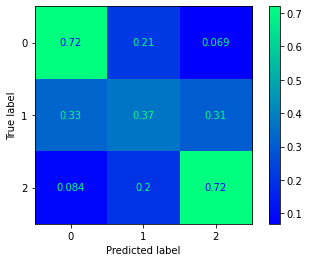

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=3.1853061224489796
Test Accuracy = 0.6053459119496856


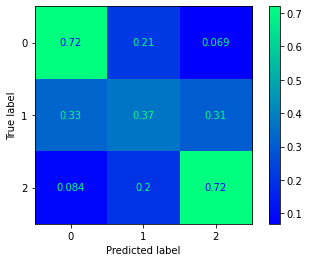

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=3.286122448979592
Test Accuracy = 0.6053459119496856


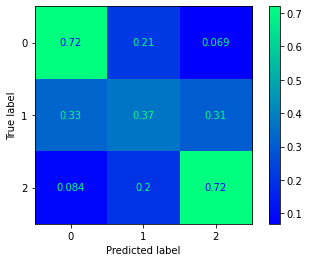

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=3.3869387755102043
Test Accuracy = 0.6053459119496856


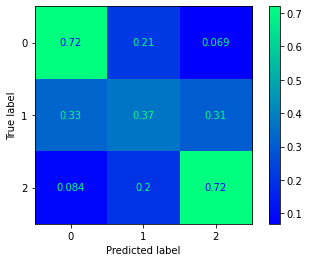

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5687893081761006, C=3.4877551020408166
Test Accuracy = 0.6053459119496856


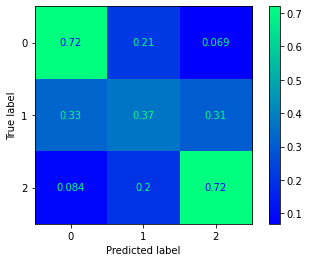

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5683962264150944, C=3.5885714285714285
Test Accuracy = 0.6053459119496856


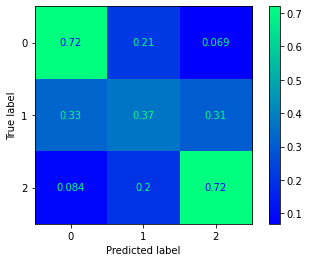

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5683962264150944, C=3.689387755102041
Test Accuracy = 0.6053459119496856


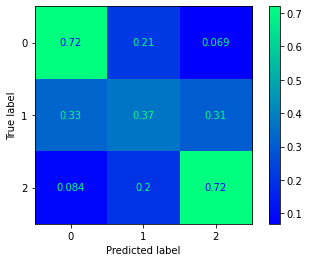

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5683962264150944, C=3.790204081632653
Test Accuracy = 0.6053459119496856


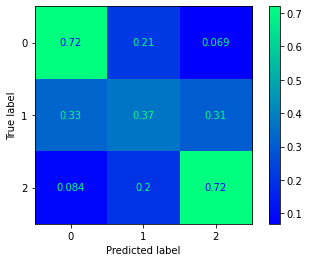

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5683962264150944, C=3.8910204081632656
Test Accuracy = 0.6053459119496856


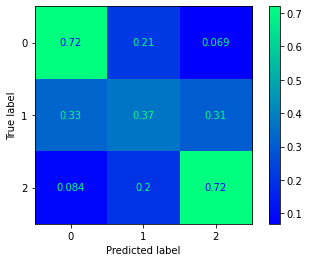

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5683962264150944, C=3.9918367346938775
Test Accuracy = 0.6053459119496856


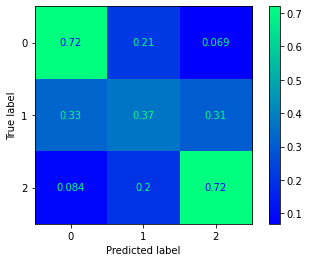

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.09265306122449
Test Accuracy = 0.6053459119496856


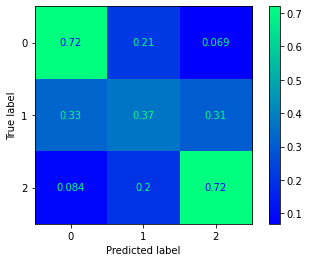

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.193469387755102
Test Accuracy = 0.6053459119496856


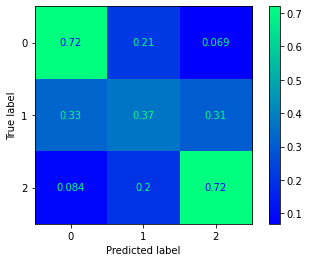

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.294285714285714
Test Accuracy = 0.6069182389937107


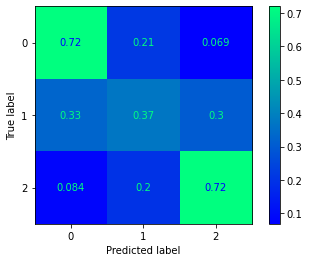

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.395102040816326
Test Accuracy = 0.6069182389937107


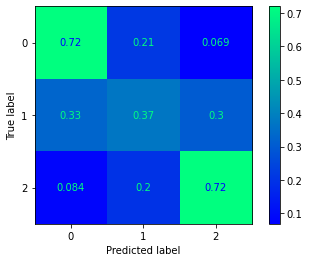

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.495918367346938
Test Accuracy = 0.6069182389937107


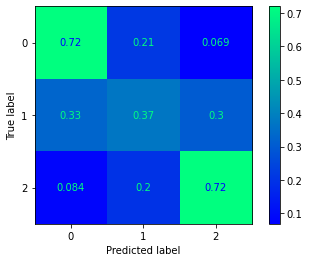

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.596734693877551
Test Accuracy = 0.6069182389937107


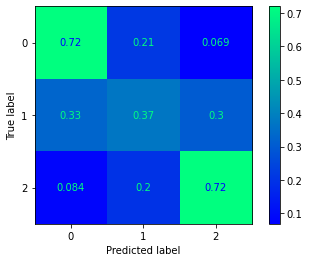

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.697551020408163
Test Accuracy = 0.6069182389937107


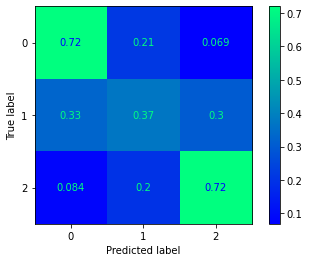

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.798367346938775
Test Accuracy = 0.6053459119496856


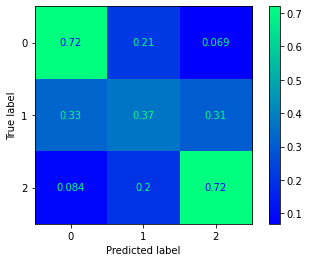

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5680031446540881, C=4.899183673469388
Test Accuracy = 0.6053459119496856


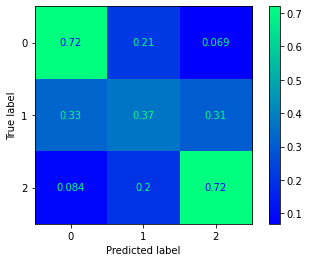

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.66      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18790837154833695

Logistic - L2, Train Accuracy = 0.5680031446540881, C=5.0
Test Accuracy = 0.6069182389937107


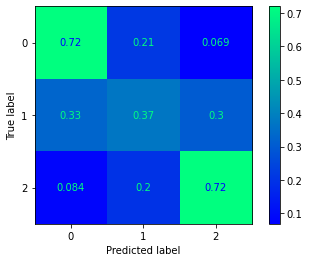

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       205
           1       0.67      0.72      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19022863334391305



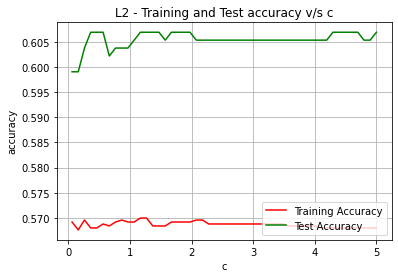

In [81]:
train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, Train Accuracy = 0.6163522012578616, C=0.06
Test Accuracy = 0.6194968553459119


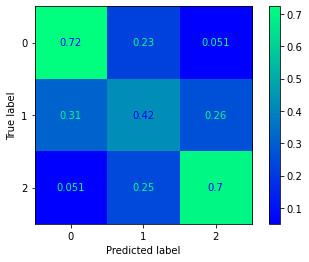

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.70      0.70      0.70       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2853593669625365

Logistic - L1, Train Accuracy = 0.6238207547169812, C=0.16081632653061223
Test Accuracy = 0.6194968553459119


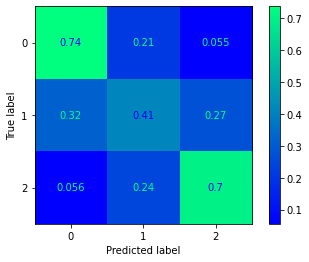

              precision    recall  f1-score   support

           0       0.46      0.41      0.44       205
           1       0.69      0.70      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.27143779618907937

Logistic - L1, Train Accuracy = 0.622248427672956, C=0.2616326530612245
Test Accuracy = 0.6037735849056604


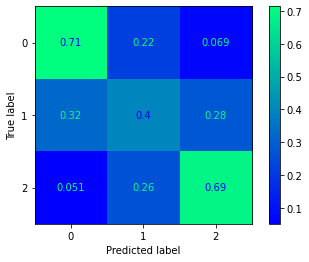

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23431360745986052

Logistic - L1, Train Accuracy = 0.6253930817610063, C=0.36244897959183675
Test Accuracy = 0.6022012578616353


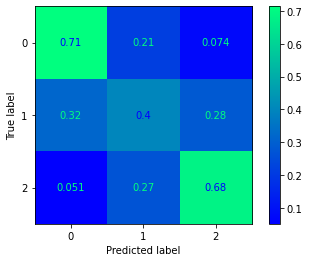

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2250325602775558

Logistic - L1, Train Accuracy = 0.625, C=0.463265306122449
Test Accuracy = 0.60062893081761


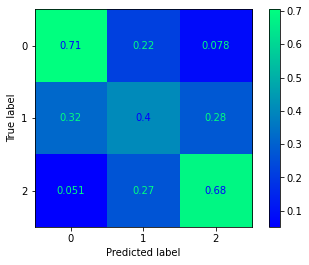

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2157515130952511

Logistic - L1, Train Accuracy = 0.6261792452830188, C=0.5640816326530613
Test Accuracy = 0.5974842767295597


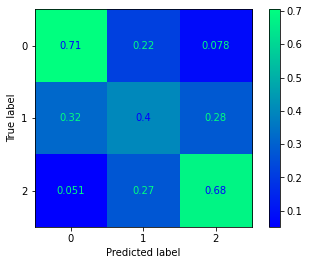

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6265723270440252, C=0.6648979591836734
Test Accuracy = 0.5990566037735849


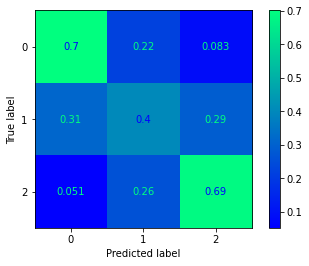

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       205
           1       0.66      0.69      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20647046591294638

Logistic - L1, Train Accuracy = 0.6269654088050315, C=0.7657142857142858
Test Accuracy = 0.6022012578616353


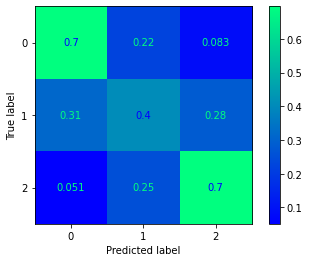

              precision    recall  f1-score   support

           0       0.45      0.40      0.43       205
           1       0.66      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.627751572327044, C=0.8665306122448979
Test Accuracy = 0.60062893081761


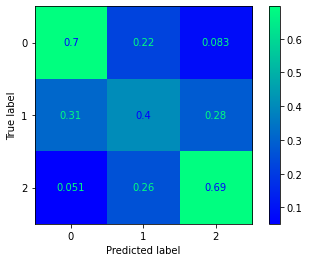

              precision    recall  f1-score   support

           0       0.45      0.40      0.42       205
           1       0.66      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20879072770852247

Logistic - L1, Train Accuracy = 0.6297169811320755, C=0.9673469387755103
Test Accuracy = 0.6037735849056604


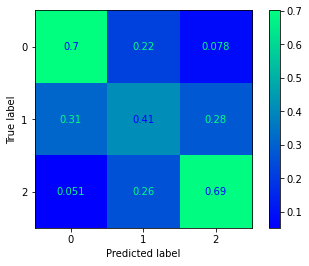

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=1.0681632653061226
Test Accuracy = 0.6053459119496856


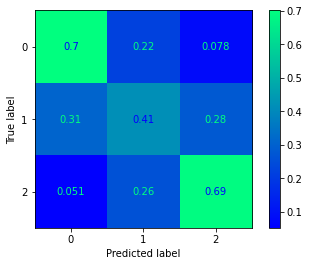

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2227122984819796

Logistic - L1, Train Accuracy = 0.6305031446540881, C=1.1689795918367347
Test Accuracy = 0.6053459119496856


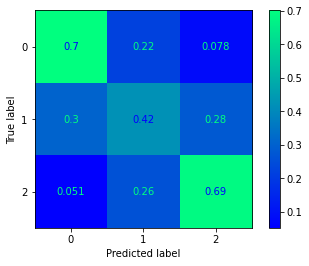

              precision    recall  f1-score   support

           0       0.45      0.42      0.44       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2227122984819796

Logistic - L1, Train Accuracy = 0.6305031446540881, C=1.269795918367347
Test Accuracy = 0.6053459119496856


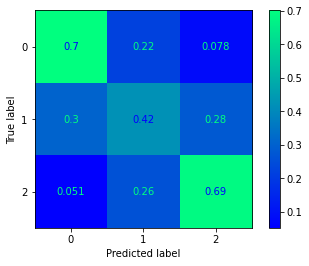

              precision    recall  f1-score   support

           0       0.45      0.42      0.44       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2227122984819796

Logistic - L1, Train Accuracy = 0.6308962264150944, C=1.3706122448979592
Test Accuracy = 0.6053459119496856


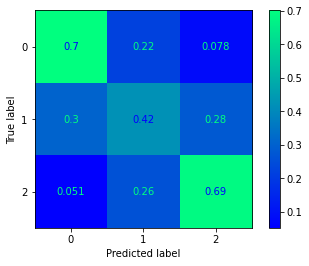

              precision    recall  f1-score   support

           0       0.45      0.42      0.44       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2227122984819796

Logistic - L1, Train Accuracy = 0.6297169811320755, C=1.4714285714285715
Test Accuracy = 0.6053459119496856


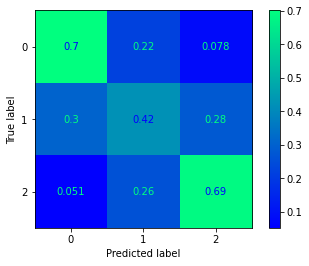

              precision    recall  f1-score   support

           0       0.45      0.42      0.44       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2227122984819796

Logistic - L1, Train Accuracy = 0.6308962264150944, C=1.5722448979591837
Test Accuracy = 0.6037735849056604


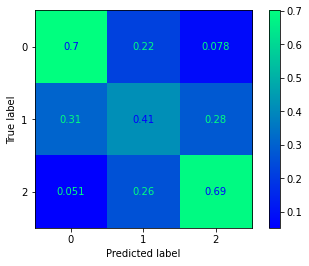

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=1.673061224489796
Test Accuracy = 0.6037735849056604


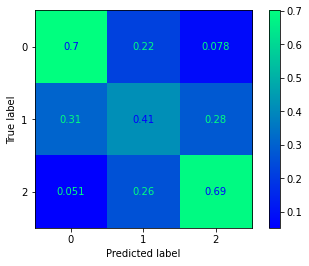

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=1.7738775510204083
Test Accuracy = 0.6037735849056604


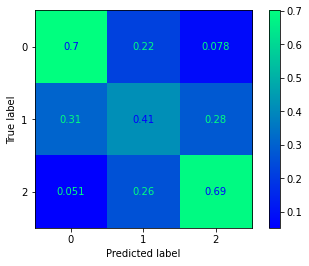

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=1.8746938775510205
Test Accuracy = 0.6037735849056604


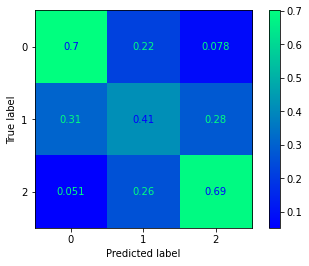

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=1.9755102040816328
Test Accuracy = 0.6037735849056604


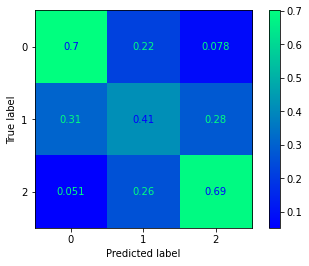

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=2.076326530612245
Test Accuracy = 0.6037735849056604


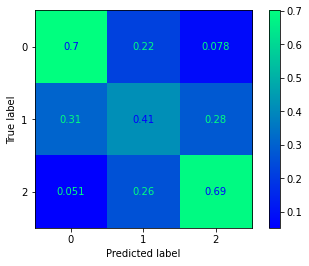

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=2.177142857142857
Test Accuracy = 0.6037735849056604


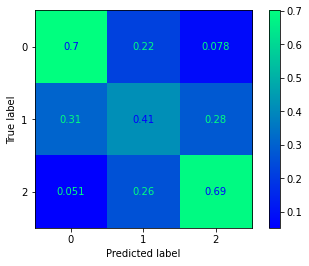

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=2.2779591836734694
Test Accuracy = 0.6022012578616353


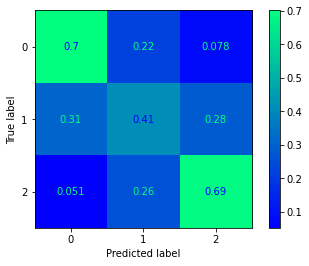

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.69      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2180717748908273

Logistic - L1, Train Accuracy = 0.6297169811320755, C=2.3787755102040817
Test Accuracy = 0.6022012578616353


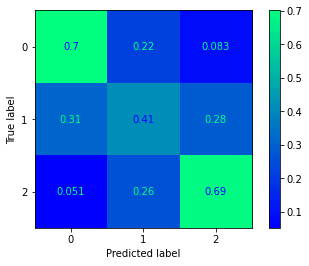

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.69      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6297169811320755, C=2.479591836734694
Test Accuracy = 0.60062893081761


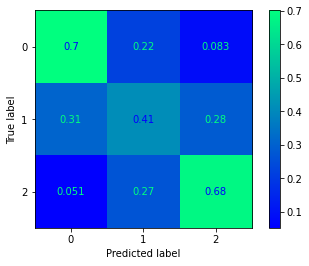

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20879072770852247

Logistic - L1, Train Accuracy = 0.6297169811320755, C=2.5804081632653064
Test Accuracy = 0.60062893081761


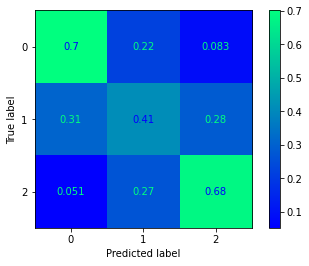

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20879072770852247

Logistic - L1, Train Accuracy = 0.6297169811320755, C=2.6812244897959183
Test Accuracy = 0.60062893081761


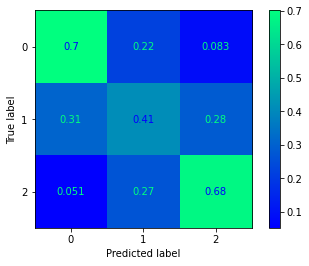

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20879072770852247

Logistic - L1, Train Accuracy = 0.6297169811320755, C=2.7820408163265307
Test Accuracy = 0.60062893081761


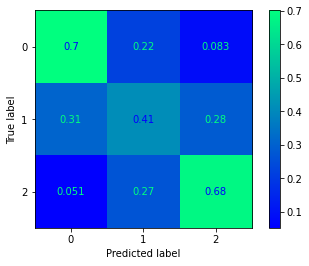

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20879072770852247

Logistic - L1, Train Accuracy = 0.6297169811320755, C=2.882857142857143
Test Accuracy = 0.6022012578616353


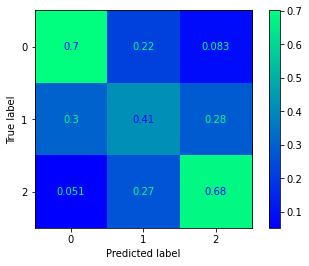

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6297169811320755, C=2.9836734693877554
Test Accuracy = 0.6022012578616353


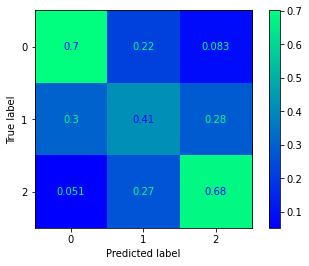

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6297169811320755, C=3.0844897959183672
Test Accuracy = 0.6022012578616353


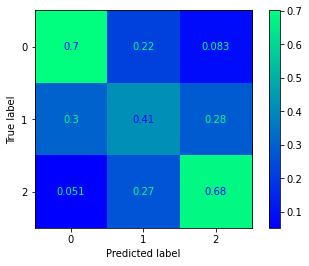

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6301100628930818, C=3.1853061224489796
Test Accuracy = 0.6022012578616353


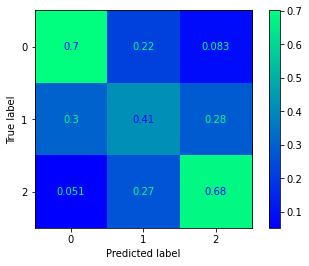

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6301100628930818, C=3.286122448979592
Test Accuracy = 0.6022012578616353


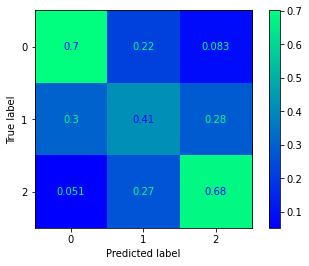

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6301100628930818, C=3.3869387755102043
Test Accuracy = 0.6022012578616353


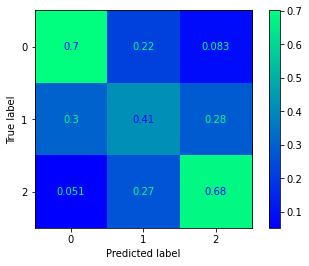

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6305031446540881, C=3.4877551020408166
Test Accuracy = 0.6022012578616353


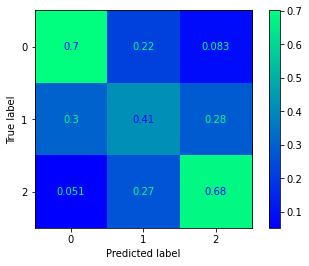

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21111098950409868

Logistic - L1, Train Accuracy = 0.6305031446540881, C=3.5885714285714285
Test Accuracy = 0.6037735849056604


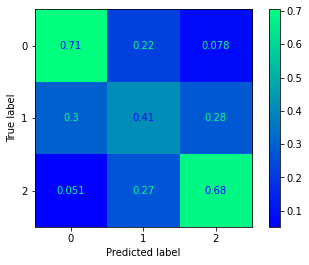

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=3.689387755102041
Test Accuracy = 0.6037735849056604


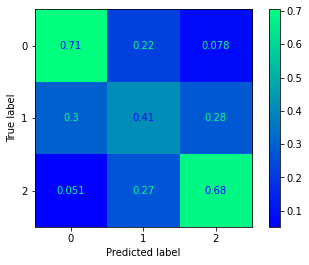

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=3.790204081632653
Test Accuracy = 0.6037735849056604


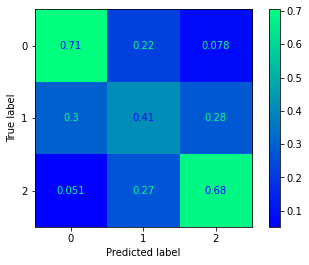

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=3.8910204081632656
Test Accuracy = 0.6037735849056604


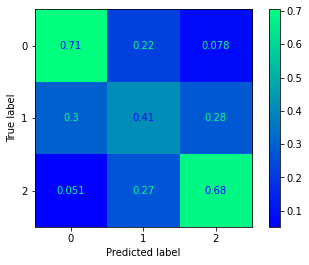

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=3.9918367346938775
Test Accuracy = 0.6037735849056604


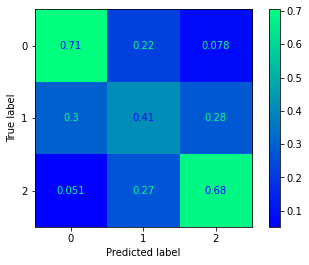

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=4.09265306122449
Test Accuracy = 0.6037735849056604


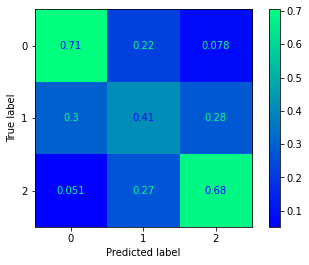

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=4.193469387755102
Test Accuracy = 0.6037735849056604


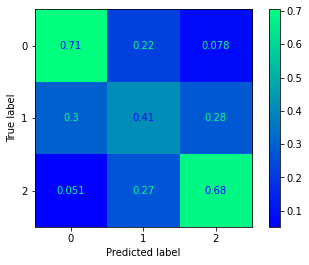

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=4.294285714285714
Test Accuracy = 0.6037735849056604


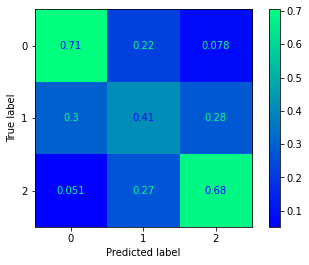

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=4.395102040816326
Test Accuracy = 0.6037735849056604


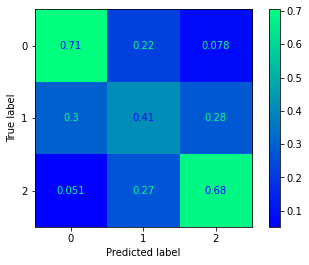

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6305031446540881, C=4.495918367346938
Test Accuracy = 0.6037735849056604


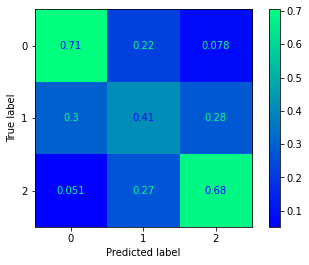

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=4.596734693877551
Test Accuracy = 0.6037735849056604


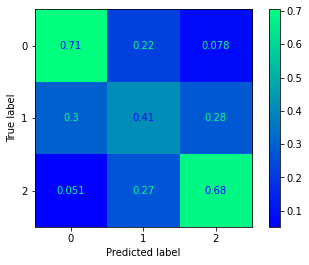

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=4.697551020408163
Test Accuracy = 0.6037735849056604


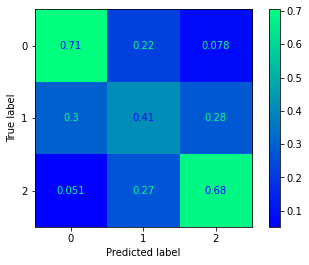

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=4.798367346938775
Test Accuracy = 0.6037735849056604


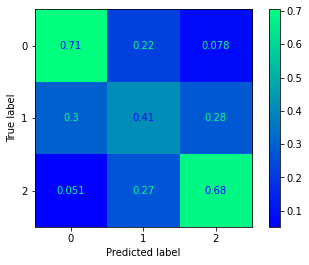

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=4.899183673469388
Test Accuracy = 0.6037735849056604


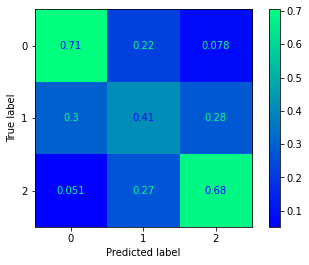

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034

Logistic - L1, Train Accuracy = 0.6301100628930818, C=5.0
Test Accuracy = 0.6037735849056604


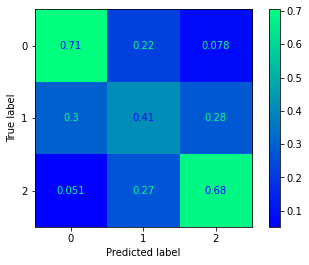

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       205
           1       0.66      0.68      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2203920366864034



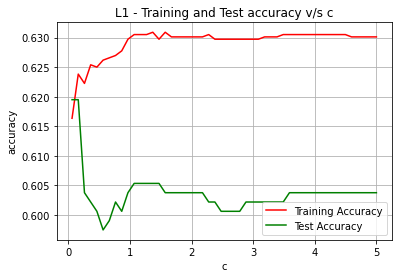

Logistic - L2, Train Accuracy = 0.625, C=0.06
Test Accuracy = 0.5990566037735849


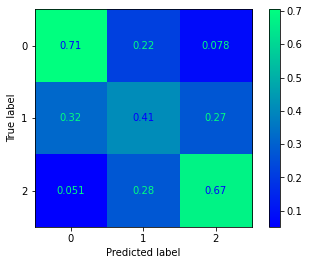

              precision    recall  f1-score   support

           0       0.44      0.41      0.43       205
           1       0.66      0.67      0.67       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21343125129967488

Logistic - L2, Train Accuracy = 0.6293238993710691, C=0.16081632653061223
Test Accuracy = 0.610062893081761


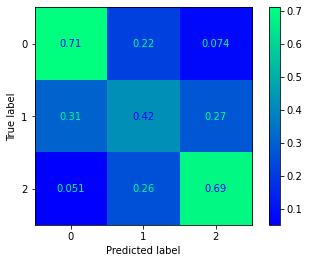

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.69      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23663386925543672

Logistic - L2, Train Accuracy = 0.6293238993710691, C=0.2616326530612245
Test Accuracy = 0.6116352201257862


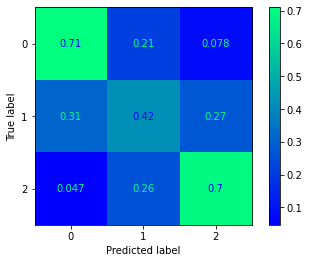

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23895413105101282

Logistic - L2, Train Accuracy = 0.6281446540880503, C=0.36244897959183675
Test Accuracy = 0.6147798742138365


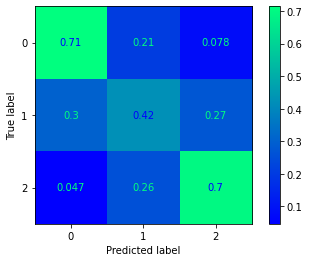

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24359465464216523

Logistic - L2, Train Accuracy = 0.627751572327044, C=0.463265306122449
Test Accuracy = 0.6163522012578616


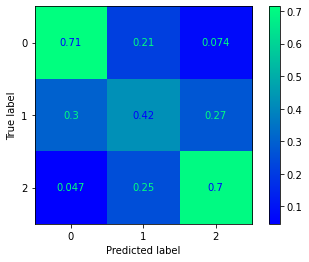

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.68      0.70      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.627751572327044, C=0.5640816326530613
Test Accuracy = 0.6147798742138365


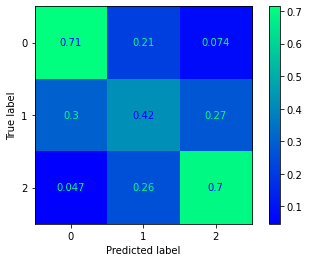

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6285377358490566, C=0.6648979591836734
Test Accuracy = 0.6132075471698113


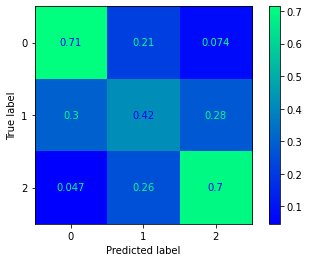

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6285377358490566, C=0.7657142857142858
Test Accuracy = 0.6147798742138365


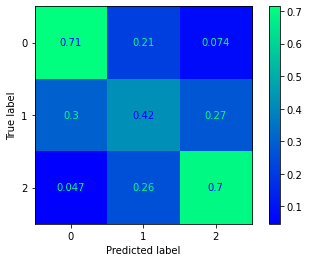

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.69       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6285377358490566, C=0.8665306122448979
Test Accuracy = 0.6132075471698113


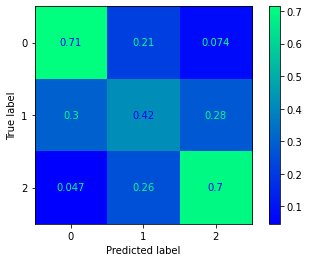

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6285377358490566, C=0.9673469387755103
Test Accuracy = 0.6132075471698113


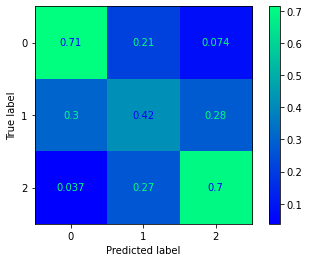

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.26215674900677466

Logistic - L2, Train Accuracy = 0.627751572327044, C=1.0681632653061226
Test Accuracy = 0.6132075471698113


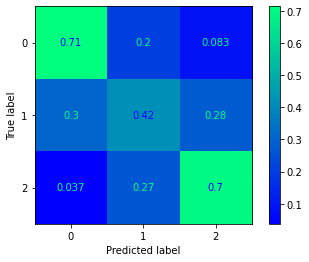

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6281446540880503, C=1.1689795918367347
Test Accuracy = 0.6132075471698113


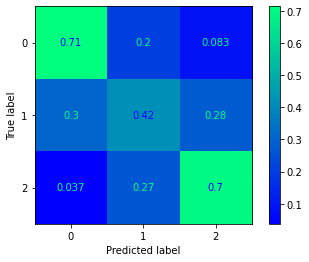

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6281446540880503, C=1.269795918367347
Test Accuracy = 0.6132075471698113


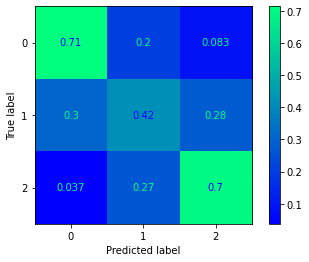

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6281446540880503, C=1.3706122448979592
Test Accuracy = 0.6132075471698113


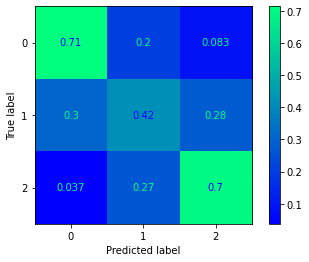

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6285377358490566, C=1.4714285714285715
Test Accuracy = 0.6132075471698113


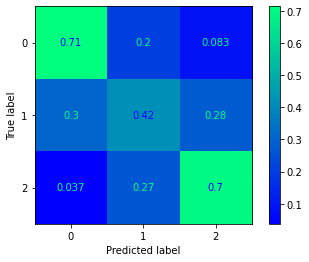

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6289308176100629, C=1.5722448979591837
Test Accuracy = 0.6132075471698113


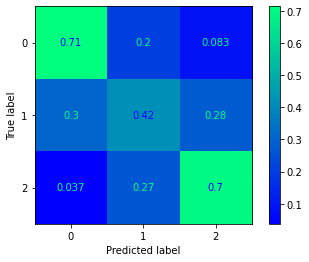

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6289308176100629, C=1.673061224489796
Test Accuracy = 0.6132075471698113


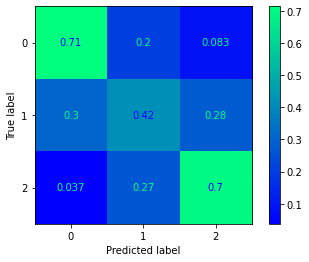

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6289308176100629, C=1.7738775510204083
Test Accuracy = 0.6132075471698113


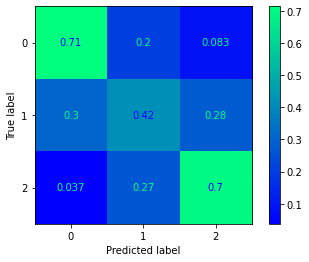

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6297169811320755, C=1.8746938775510205
Test Accuracy = 0.6132075471698113


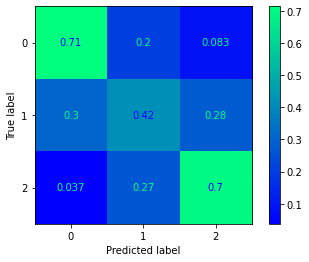

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6297169811320755, C=1.9755102040816328
Test Accuracy = 0.6132075471698113


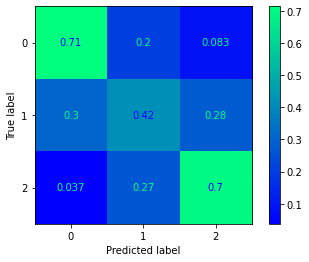

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24823517823331753

Logistic - L2, Train Accuracy = 0.6301100628930818, C=2.076326530612245
Test Accuracy = 0.6147798742138365


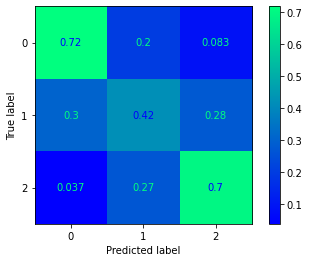

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6297169811320755, C=2.177142857142857
Test Accuracy = 0.6147798742138365


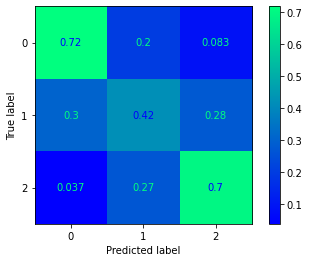

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6297169811320755, C=2.2779591836734694
Test Accuracy = 0.6147798742138365


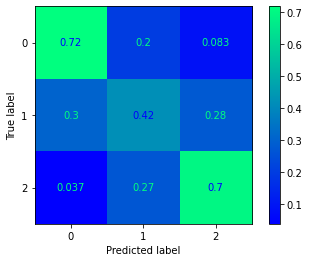

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6289308176100629, C=2.3787755102040817
Test Accuracy = 0.6147798742138365


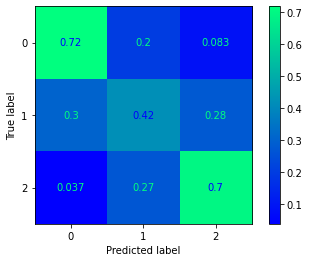

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6285377358490566, C=2.479591836734694
Test Accuracy = 0.6147798742138365


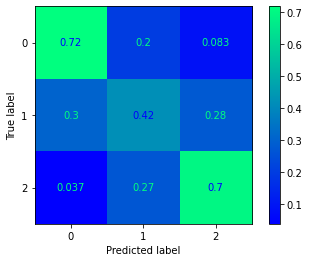

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6281446540880503, C=2.5804081632653064
Test Accuracy = 0.6147798742138365


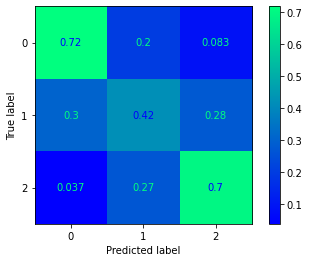

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6281446540880503, C=2.6812244897959183
Test Accuracy = 0.6147798742138365


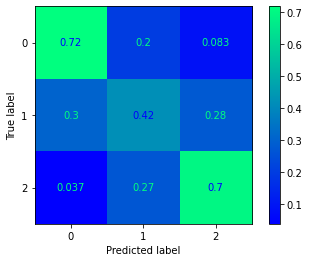

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6281446540880503, C=2.7820408163265307
Test Accuracy = 0.6147798742138365


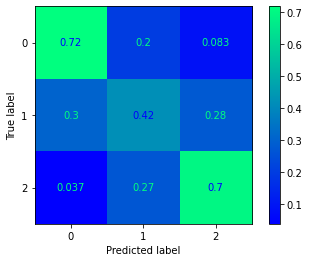

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6281446540880503, C=2.882857142857143
Test Accuracy = 0.6147798742138365


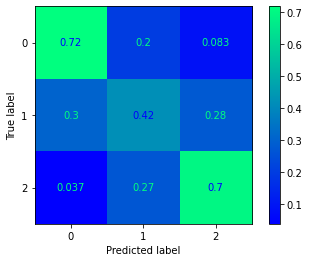

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6281446540880503, C=2.9836734693877554
Test Accuracy = 0.6147798742138365


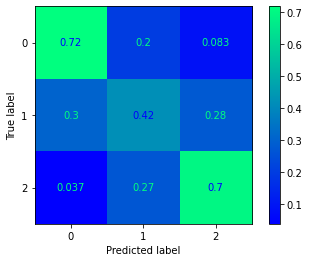

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6273584905660378, C=3.0844897959183672
Test Accuracy = 0.6147798742138365


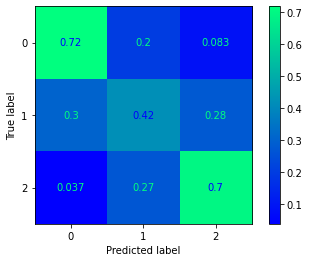

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.627751572327044, C=3.1853061224489796
Test Accuracy = 0.6147798742138365


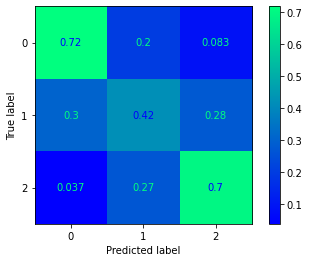

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.627751572327044, C=3.286122448979592
Test Accuracy = 0.6147798742138365


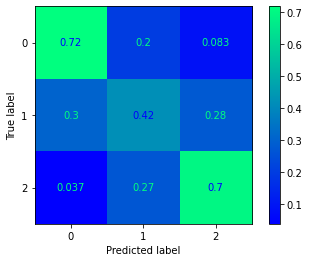

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6285377358490566, C=3.3869387755102043
Test Accuracy = 0.6147798742138365


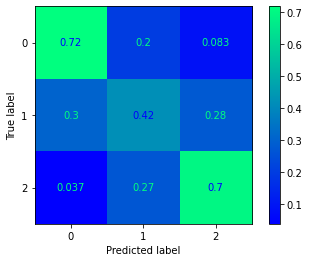

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25055544002889374

Logistic - L2, Train Accuracy = 0.6281446540880503, C=3.4877551020408166
Test Accuracy = 0.6163522012578616


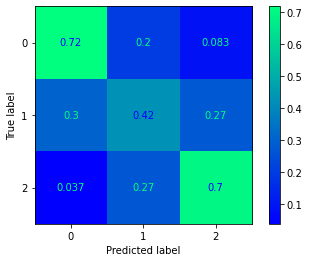

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6285377358490566, C=3.5885714285714285
Test Accuracy = 0.6163522012578616


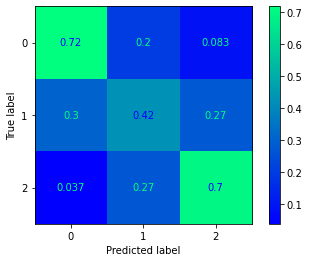

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6289308176100629, C=3.689387755102041
Test Accuracy = 0.6163522012578616


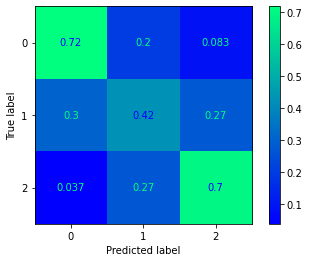

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6285377358490566, C=3.790204081632653
Test Accuracy = 0.6163522012578616


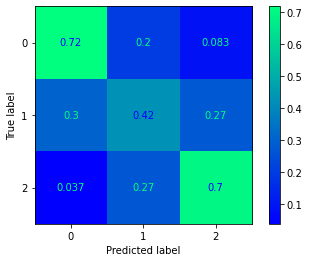

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6293238993710691, C=3.8910204081632656
Test Accuracy = 0.6163522012578616


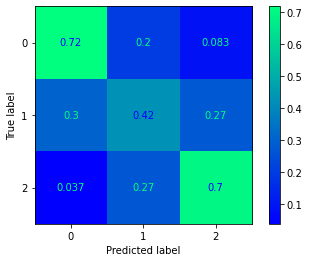

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6285377358490566, C=3.9918367346938775
Test Accuracy = 0.6163522012578616


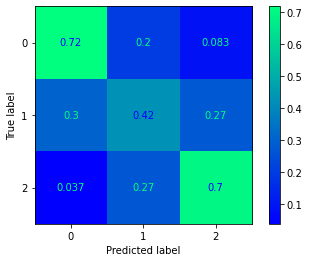

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6281446540880503, C=4.09265306122449
Test Accuracy = 0.6163522012578616


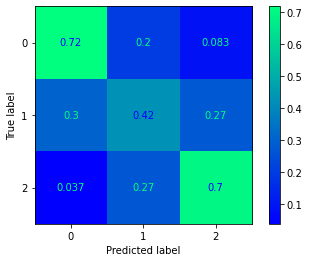

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6281446540880503, C=4.193469387755102
Test Accuracy = 0.6163522012578616


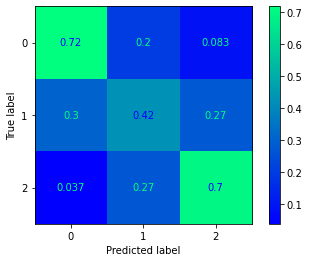

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6289308176100629, C=4.294285714285714
Test Accuracy = 0.6163522012578616


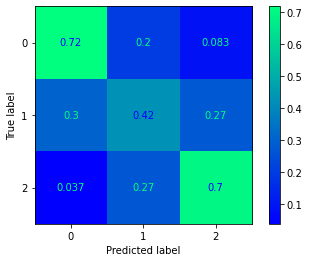

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6289308176100629, C=4.395102040816326
Test Accuracy = 0.6163522012578616


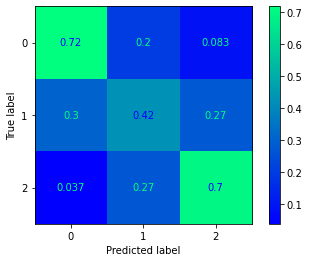

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6289308176100629, C=4.495918367346938
Test Accuracy = 0.6163522012578616


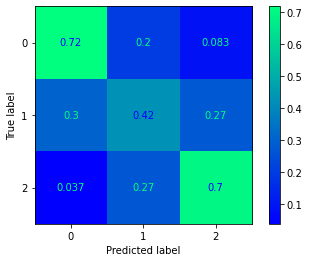

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6289308176100629, C=4.596734693877551
Test Accuracy = 0.6163522012578616


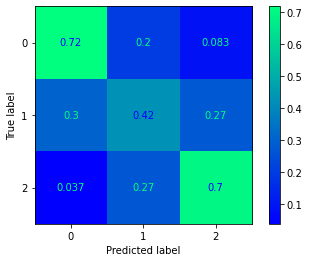

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6285377358490566, C=4.697551020408163
Test Accuracy = 0.6163522012578616


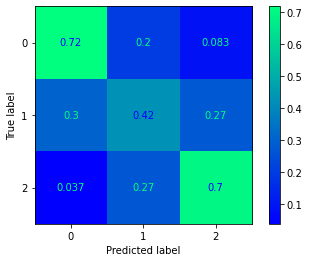

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6285377358490566, C=4.798367346938775
Test Accuracy = 0.6163522012578616


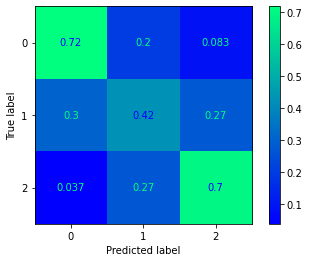

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6289308176100629, C=4.899183673469388
Test Accuracy = 0.6163522012578616


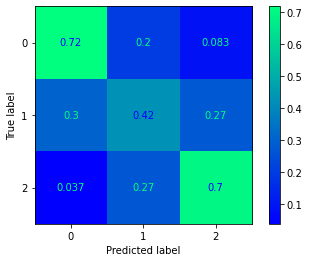

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995

Logistic - L2, Train Accuracy = 0.6289308176100629, C=5.0
Test Accuracy = 0.6163522012578616


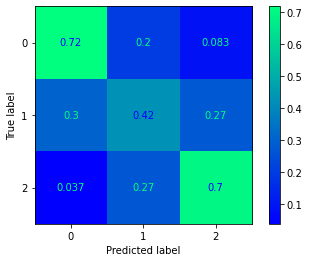

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       205
           1       0.67      0.70      0.68       214
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25287570182446995



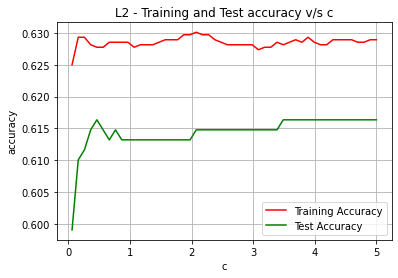

In [82]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)

# Train All Wines Data

In [83]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

Original y hist: (array([   0,    0,    0,   30,  216, 2138, 2836, 1079,  198]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([1277, 1277, 1277]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (6497, 12)
y[:10]:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
X[:10, :]:
[[6.8000e+00 2.7000e-01 2.6000e-01 1.6100e+01 4.9000e-02 5.5000e+01
  1.9600e+02 9.9840e-01 3.1500e+00 5.0000e-01 9.3000e+00]
 [6.0000e+00 3.3000e-01 3.2000e-01 1.2900e+01 5.4000e-02 6.0000e+00
  1.1300e+02 9.9572e-01 3.3000e+00 5.6000e-01 1.1500e+01]
 [7.1000e+00 3.7000e-01 3.2000e-01 1.4000e+00 3.7000e-02 2.7000e+01
  1.2600e+02 9.9180e-01 3.1900e+00 6.2000e-01 1.2000e+01]
 [9.1000e+00 4.7000e-01 4.9000e-01 2.6000e+00 9.4000e-02 3.8000e+01
  1.0600e+02 9.9820e-01 3.0800e+00 5.9000e-01 9.1000e+00]
 [6.9000e+00 2.1000e-01 4.9000e-01 1.4000e+00 4.1000e-02 1.5000e+01
  1.6400e+02 9.9270e-01 3.2500e+00 6.3000e-01 1.1000e+01]
 [9.9000e+00 6.3000e-01 2.4000e-01 2.4000e+00

Logistic - L1, Train Accuracy = 0.5949738903394256, C=0.06
Test Accuracy = 0.5827900912646675


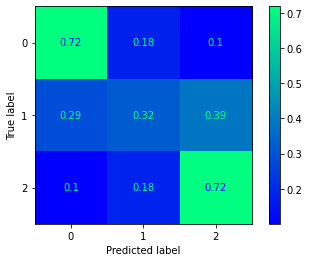

              precision    recall  f1-score   support

           0       0.48      0.32      0.38       261
           1       0.59      0.72      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06506321545827976

Logistic - L1, Train Accuracy = 0.5913838120104439, C=0.16081632653061223
Test Accuracy = 0.5932203389830508


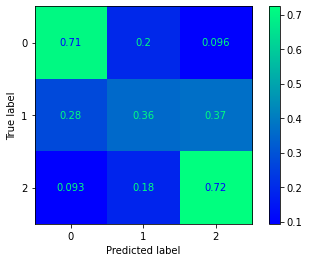

              precision    recall  f1-score   support

           0       0.49      0.36      0.41       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09866559460671365

Logistic - L1, Train Accuracy = 0.5930156657963447, C=0.2616326530612245
Test Accuracy = 0.5893089960886571


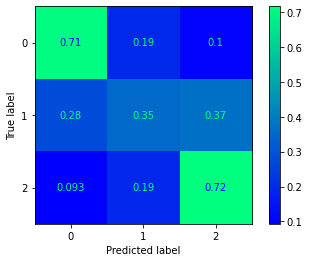

              precision    recall  f1-score   support

           0       0.49      0.35      0.41       261
           1       0.60      0.72      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08680593137785464

Logistic - L1, Train Accuracy = 0.589425587467363, C=0.36244897959183675
Test Accuracy = 0.5827900912646675


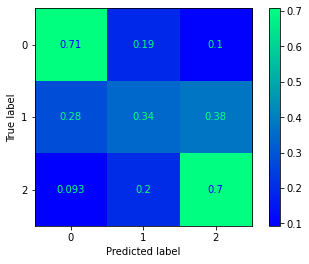

              precision    recall  f1-score   support

           0       0.47      0.34      0.40       261
           1       0.60      0.70      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07692287868713876

Logistic - L1, Train Accuracy = 0.5910574412532638, C=0.463265306122449
Test Accuracy = 0.5840938722294654


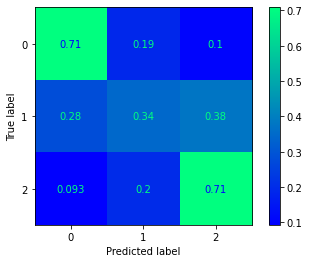

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0729696576108525

Logistic - L1, Train Accuracy = 0.5913838120104439, C=0.5640816326530613
Test Accuracy = 0.5840938722294654


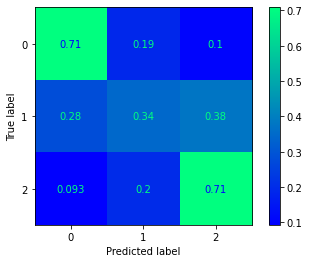

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0729696576108525

Logistic - L1, Train Accuracy = 0.5926892950391645, C=0.6648979591836734
Test Accuracy = 0.5840938722294654


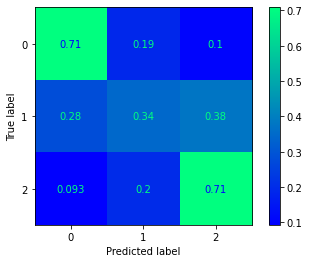

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0729696576108525

Logistic - L1, Train Accuracy = 0.5930156657963447, C=0.7657142857142858
Test Accuracy = 0.5840938722294654


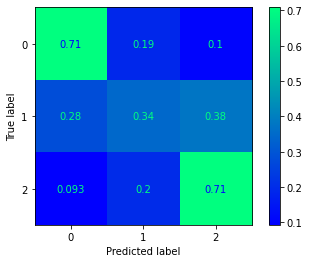

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0729696576108525

Logistic - L1, Train Accuracy = 0.5926892950391645, C=0.8665306122448979
Test Accuracy = 0.5827900912646675


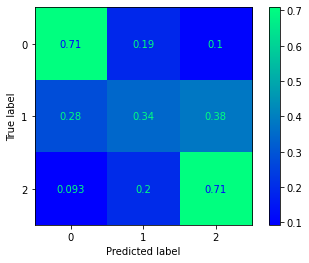

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07099304707270926

Logistic - L1, Train Accuracy = 0.5930156657963447, C=0.9673469387755103
Test Accuracy = 0.5840938722294654


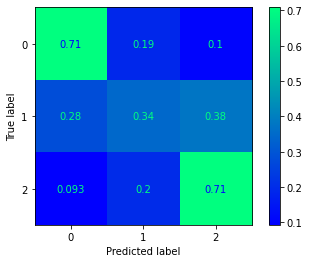

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0729696576108525

Logistic - L1, Train Accuracy = 0.5926892950391645, C=1.0681632653061226
Test Accuracy = 0.5840938722294654


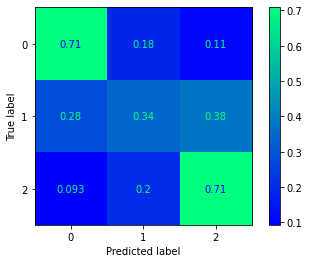

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.067039825996423

Logistic - L1, Train Accuracy = 0.5926892950391645, C=1.1689795918367347
Test Accuracy = 0.5840938722294654


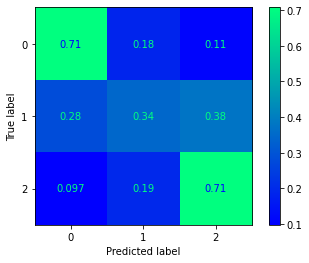

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06110999438199338

Logistic - L1, Train Accuracy = 0.5926892950391645, C=1.269795918367347
Test Accuracy = 0.5840938722294654


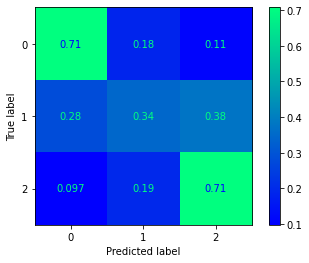

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06110999438199338

Logistic - L1, Train Accuracy = 0.5923629242819843, C=1.3706122448979592
Test Accuracy = 0.5827900912646675


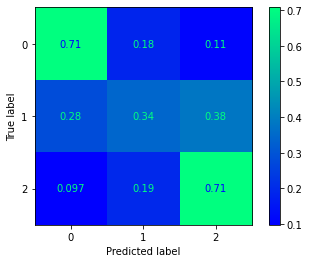

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05913338384385025

Logistic - L1, Train Accuracy = 0.5923629242819843, C=1.4714285714285715
Test Accuracy = 0.5814863102998696


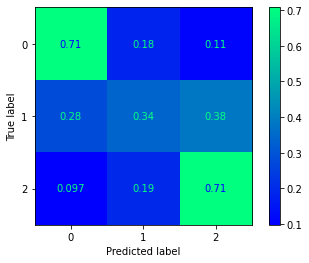

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5930156657963447, C=1.5722448979591837
Test Accuracy = 0.5814863102998696


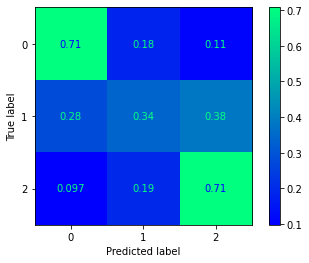

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5933420365535248, C=1.673061224489796
Test Accuracy = 0.5840938722294654


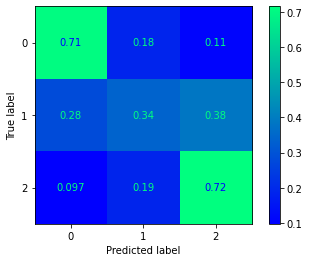

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.72      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06110999438199338

Logistic - L1, Train Accuracy = 0.5933420365535248, C=1.7738775510204083
Test Accuracy = 0.5814863102998696


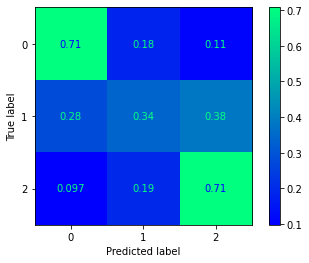

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5933420365535248, C=1.8746938775510205
Test Accuracy = 0.5814863102998696


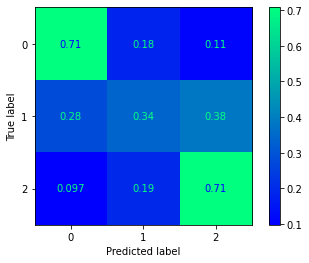

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5933420365535248, C=1.9755102040816328
Test Accuracy = 0.5814863102998696


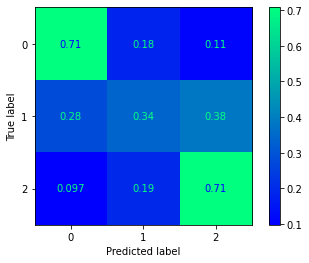

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.076326530612245
Test Accuracy = 0.5814863102998696


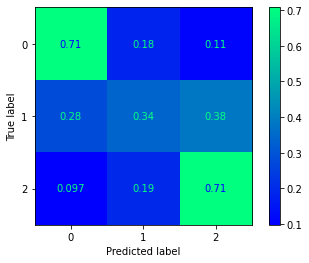

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.177142857142857
Test Accuracy = 0.5814863102998696


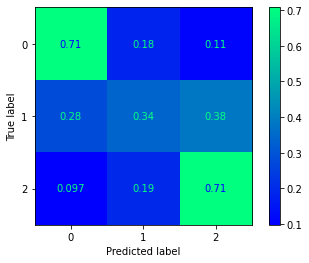

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.2779591836734694
Test Accuracy = 0.5814863102998696


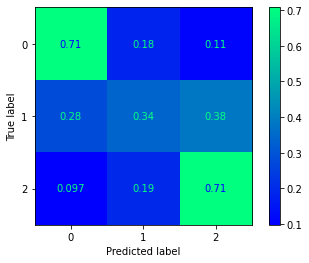

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.3787755102040817
Test Accuracy = 0.5814863102998696


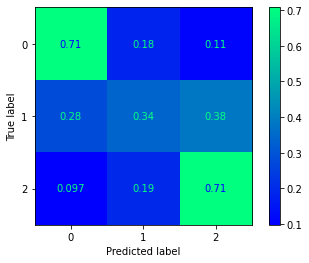

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.479591836734694
Test Accuracy = 0.5814863102998696


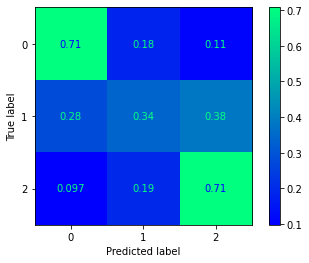

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.5804081632653064
Test Accuracy = 0.5814863102998696


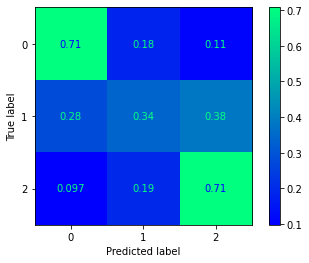

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.6812244897959183
Test Accuracy = 0.5814863102998696


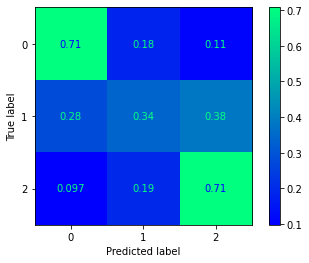

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.7820408163265307
Test Accuracy = 0.5814863102998696


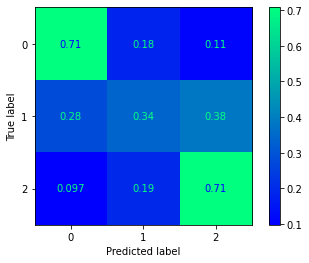

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.882857142857143
Test Accuracy = 0.5814863102998696


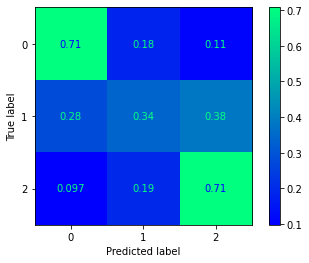

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L1, Train Accuracy = 0.5936684073107049, C=2.9836734693877554
Test Accuracy = 0.5801825293350718


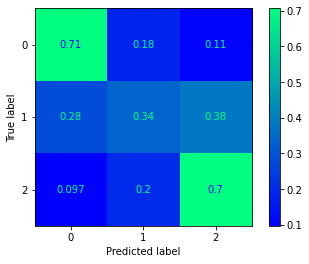

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5936684073107049, C=3.0844897959183672
Test Accuracy = 0.5801825293350718


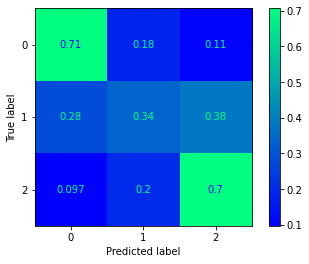

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5936684073107049, C=3.1853061224489796
Test Accuracy = 0.5801825293350718


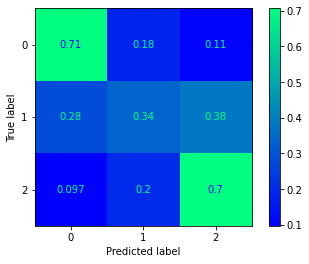

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=3.286122448979592
Test Accuracy = 0.5801825293350718


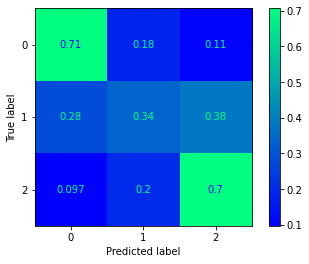

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=3.3869387755102043
Test Accuracy = 0.5801825293350718


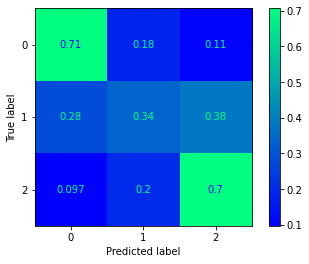

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=3.4877551020408166
Test Accuracy = 0.5801825293350718


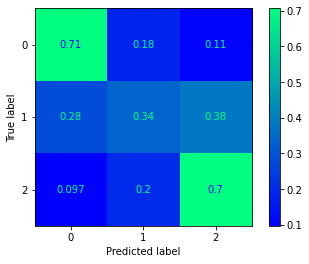

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=3.5885714285714285
Test Accuracy = 0.5801825293350718


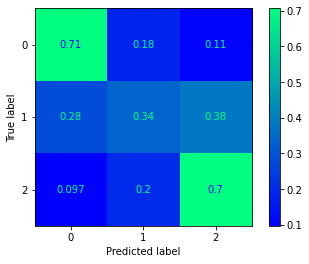

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=3.689387755102041
Test Accuracy = 0.5801825293350718


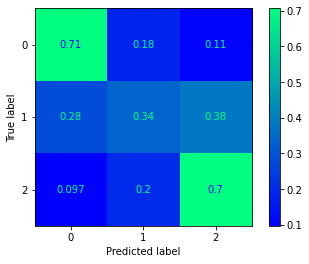

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=3.790204081632653
Test Accuracy = 0.5801825293350718


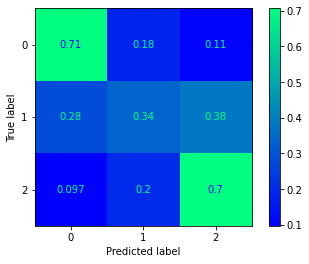

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=3.8910204081632656
Test Accuracy = 0.5801825293350718


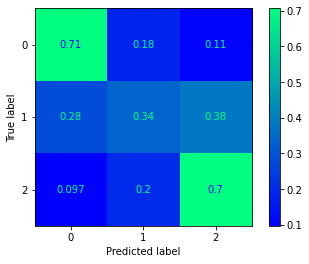

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=3.9918367346938775
Test Accuracy = 0.5801825293350718


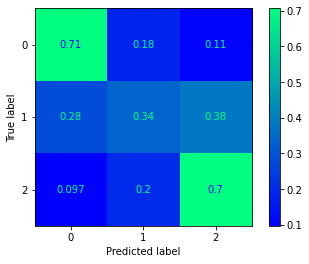

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.09265306122449
Test Accuracy = 0.5801825293350718


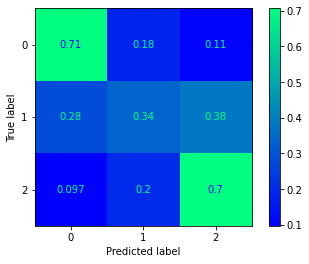

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.193469387755102
Test Accuracy = 0.5801825293350718


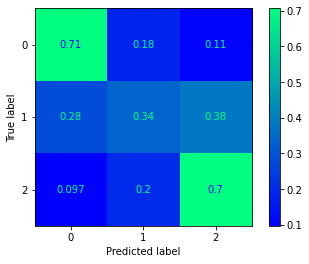

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.294285714285714
Test Accuracy = 0.5801825293350718


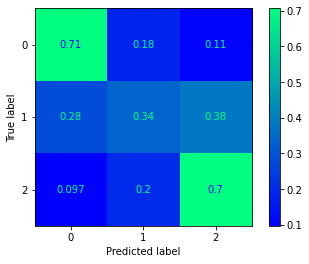

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.395102040816326
Test Accuracy = 0.5801825293350718


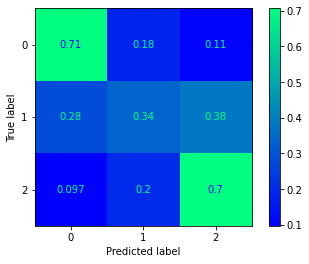

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.495918367346938
Test Accuracy = 0.5801825293350718


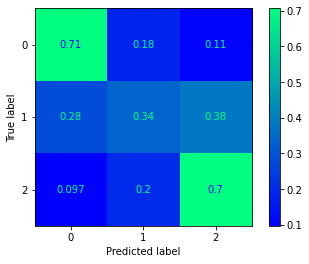

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.596734693877551
Test Accuracy = 0.5801825293350718


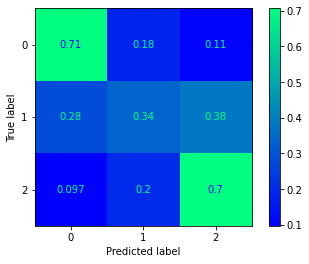

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.697551020408163
Test Accuracy = 0.5801825293350718


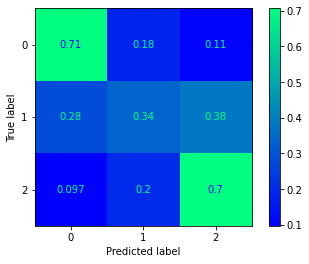

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.798367346938775
Test Accuracy = 0.5801825293350718


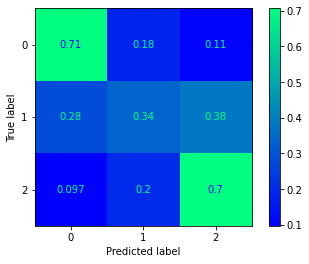

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=4.899183673469388
Test Accuracy = 0.5801825293350718


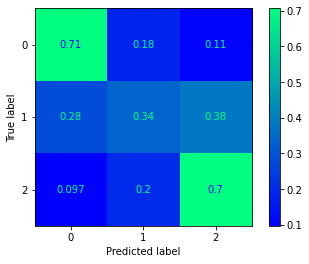

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L1, Train Accuracy = 0.5939947780678851, C=5.0
Test Accuracy = 0.5801825293350718


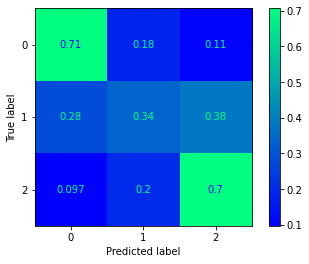

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388



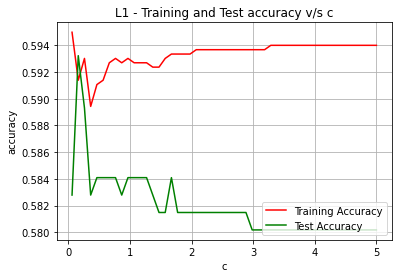

Logistic - L2, Train Accuracy = 0.5913838120104439, C=0.06
Test Accuracy = 0.590612777053455


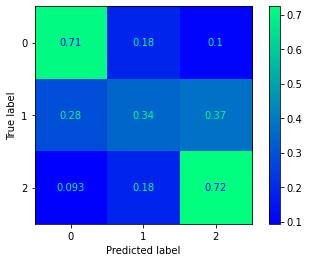

              precision    recall  f1-score   support

           0       0.49      0.34      0.41       261
           1       0.60      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08285271030156827

Logistic - L2, Train Accuracy = 0.5904046997389034, C=0.16081632653061223
Test Accuracy = 0.5827900912646675


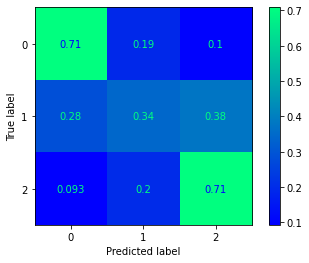

              precision    recall  f1-score   support

           0       0.47      0.34      0.40       261
           1       0.60      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07692287868713876

Logistic - L2, Train Accuracy = 0.5913838120104439, C=0.2616326530612245
Test Accuracy = 0.5814863102998696


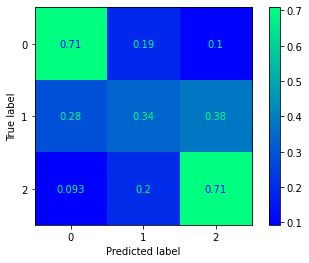

              precision    recall  f1-score   support

           0       0.47      0.34      0.39       261
           1       0.59      0.71      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06901643653456613

Logistic - L2, Train Accuracy = 0.5920365535248042, C=0.36244897959183675
Test Accuracy = 0.5801825293350718


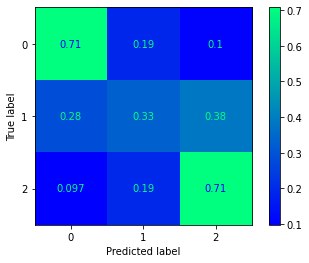

              precision    recall  f1-score   support

           0       0.47      0.33      0.39       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06110999438199338

Logistic - L2, Train Accuracy = 0.5930156657963447, C=0.463265306122449
Test Accuracy = 0.5801825293350718


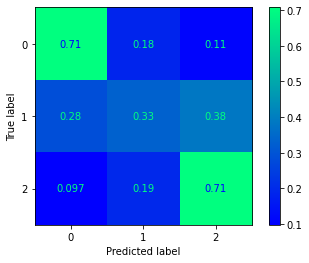

              precision    recall  f1-score   support

           0       0.48      0.33      0.39       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5933420365535248, C=0.5640816326530613
Test Accuracy = 0.5814863102998696


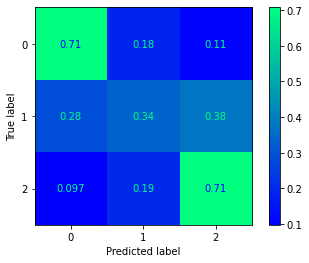

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L2, Train Accuracy = 0.5936684073107049, C=0.6648979591836734
Test Accuracy = 0.5827900912646675


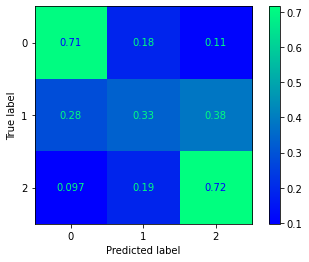

              precision    recall  f1-score   support

           0       0.48      0.33      0.39       261
           1       0.59      0.72      0.65       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05913338384385025

Logistic - L2, Train Accuracy = 0.5939947780678851, C=0.7657142857142858
Test Accuracy = 0.5801825293350718


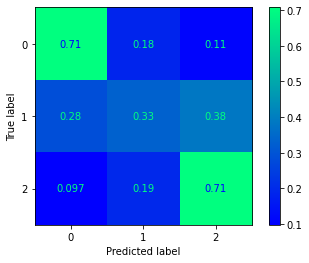

              precision    recall  f1-score   support

           0       0.48      0.33      0.39       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5939947780678851, C=0.8665306122448979
Test Accuracy = 0.5801825293350718


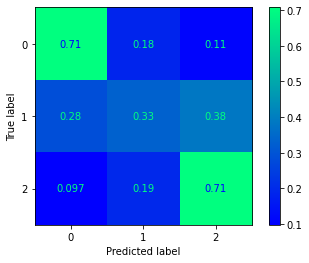

              precision    recall  f1-score   support

           0       0.48      0.33      0.39       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5936684073107049, C=0.9673469387755103
Test Accuracy = 0.5801825293350718


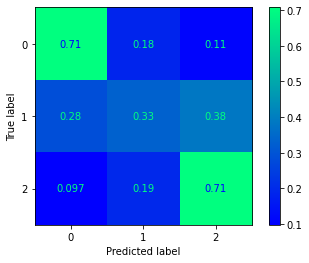

              precision    recall  f1-score   support

           0       0.48      0.33      0.39       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.0681632653061226
Test Accuracy = 0.5814863102998696


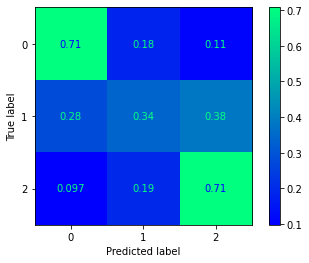

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.1689795918367347
Test Accuracy = 0.5814863102998696


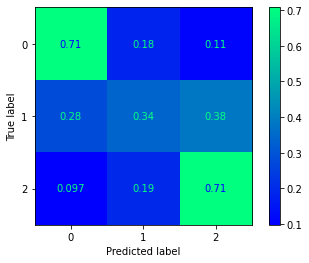

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.269795918367347
Test Accuracy = 0.5814863102998696


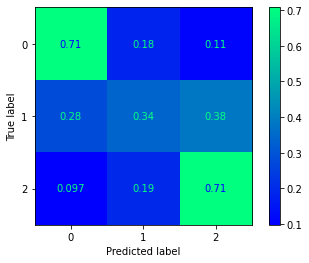

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.3706122448979592
Test Accuracy = 0.5814863102998696


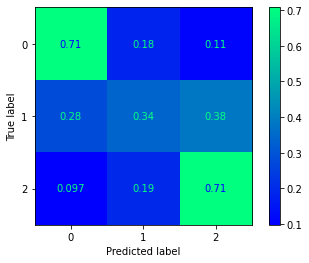

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.71      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05715677330570712

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.4714285714285715
Test Accuracy = 0.5801825293350718


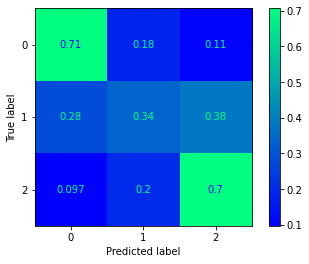

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.5722448979591837
Test Accuracy = 0.5801825293350718


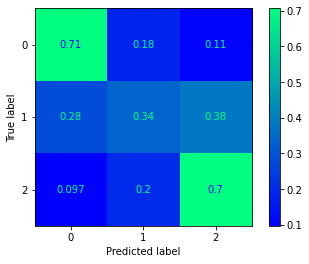

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.673061224489796
Test Accuracy = 0.5801825293350718


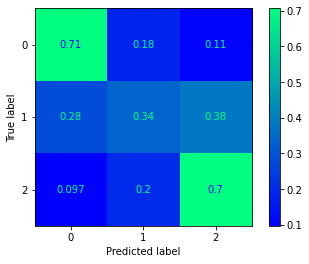

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.7738775510204083
Test Accuracy = 0.5801825293350718


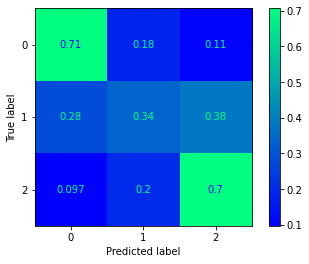

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.8746938775510205
Test Accuracy = 0.5801825293350718


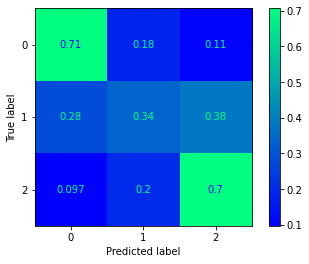

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=1.9755102040816328
Test Accuracy = 0.5801825293350718


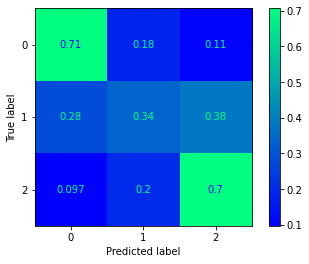

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.076326530612245
Test Accuracy = 0.5801825293350718


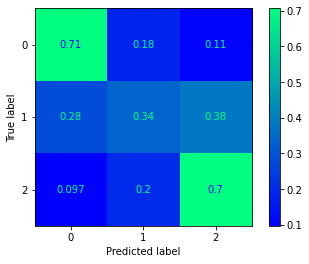

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.177142857142857
Test Accuracy = 0.5801825293350718


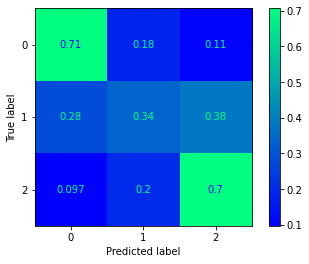

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.2779591836734694
Test Accuracy = 0.5801825293350718


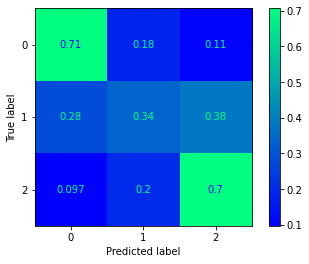

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.3787755102040817
Test Accuracy = 0.5801825293350718


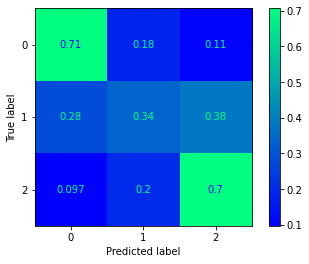

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.479591836734694
Test Accuracy = 0.5801825293350718


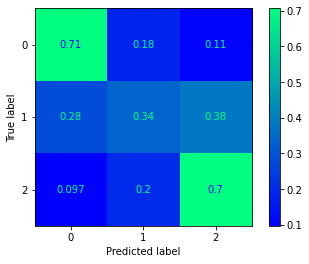

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.5804081632653064
Test Accuracy = 0.5801825293350718


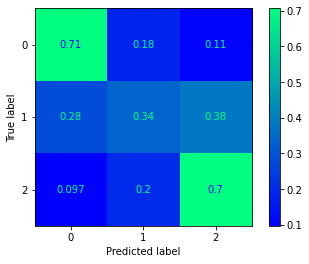

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.6812244897959183
Test Accuracy = 0.5801825293350718


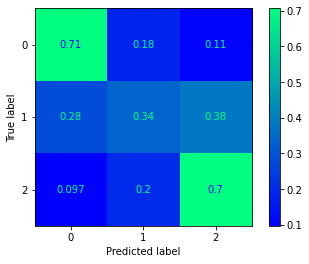

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.7820408163265307
Test Accuracy = 0.5801825293350718


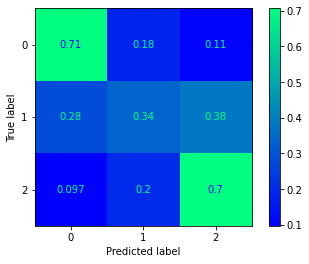

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.882857142857143
Test Accuracy = 0.5801825293350718


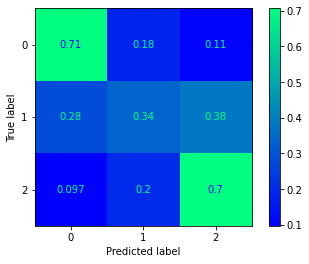

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=2.9836734693877554
Test Accuracy = 0.5801825293350718


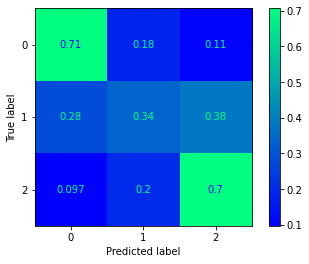

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.0844897959183672
Test Accuracy = 0.5801825293350718


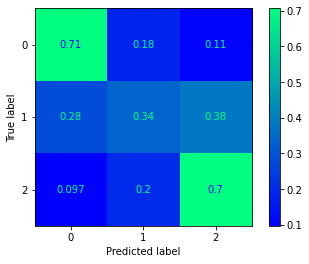

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.1853061224489796
Test Accuracy = 0.5801825293350718


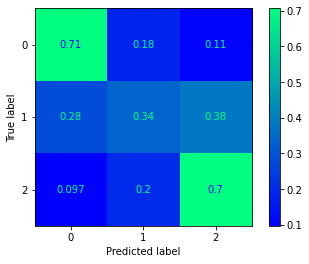

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.286122448979592
Test Accuracy = 0.5801825293350718


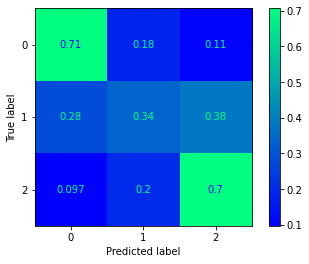

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.3869387755102043
Test Accuracy = 0.5801825293350718


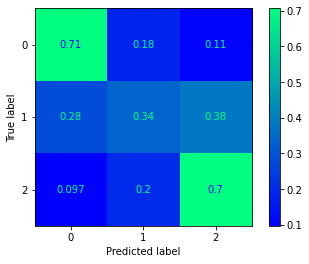

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.4877551020408166
Test Accuracy = 0.5801825293350718


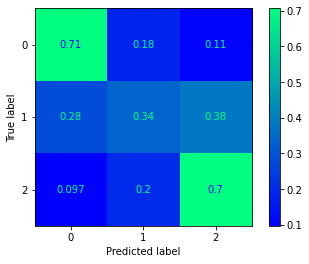

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.5885714285714285
Test Accuracy = 0.5801825293350718


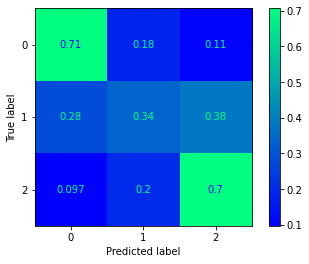

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.689387755102041
Test Accuracy = 0.5801825293350718


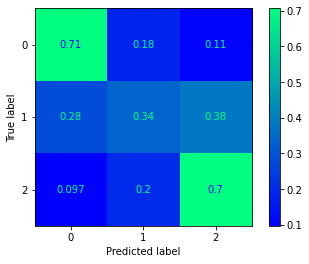

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.790204081632653
Test Accuracy = 0.5801825293350718


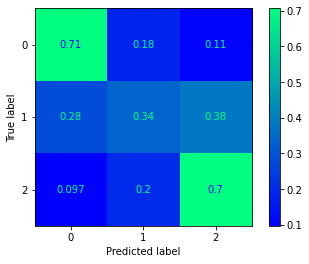

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05518016276756388

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.8910204081632656
Test Accuracy = 0.5801825293350718


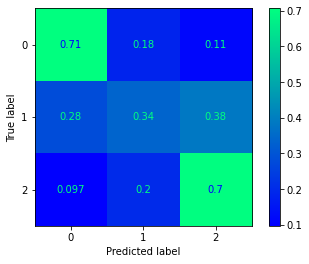

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=3.9918367346938775
Test Accuracy = 0.5801825293350718


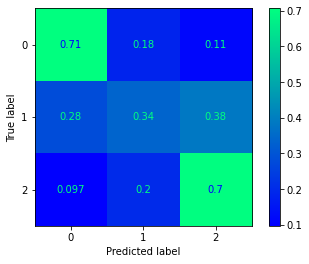

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.09265306122449
Test Accuracy = 0.5801825293350718


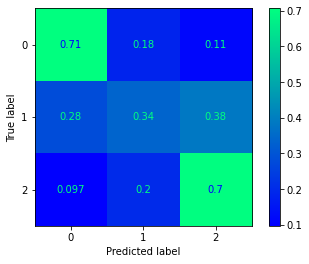

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.193469387755102
Test Accuracy = 0.5801825293350718


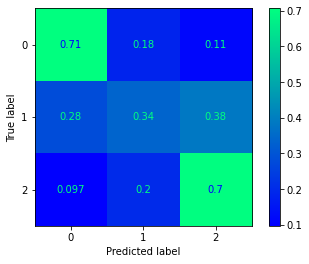

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.294285714285714
Test Accuracy = 0.5801825293350718


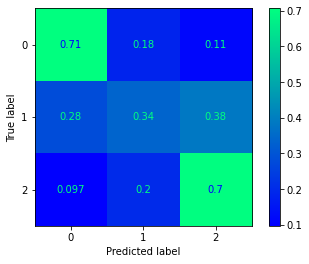

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.395102040816326
Test Accuracy = 0.5801825293350718


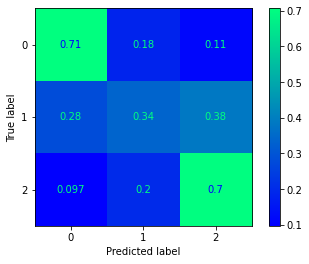

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.495918367346938
Test Accuracy = 0.5801825293350718


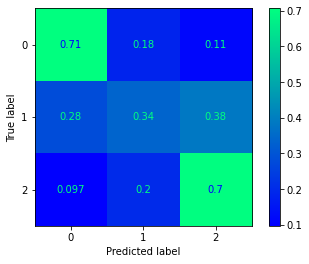

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.596734693877551
Test Accuracy = 0.5801825293350718


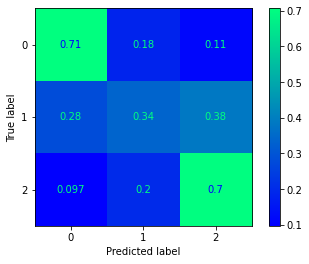

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.697551020408163
Test Accuracy = 0.5801825293350718


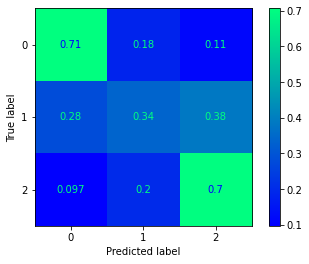

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.798367346938775
Test Accuracy = 0.5801825293350718


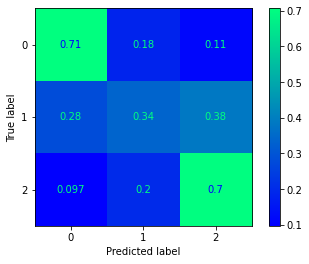

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=4.899183673469388
Test Accuracy = 0.5801825293350718


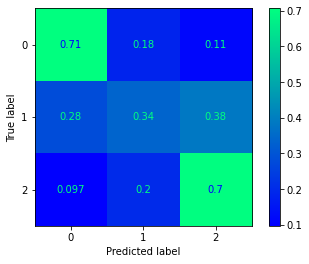

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375

Logistic - L2, Train Accuracy = 0.5943211488250653, C=5.0
Test Accuracy = 0.5801825293350718


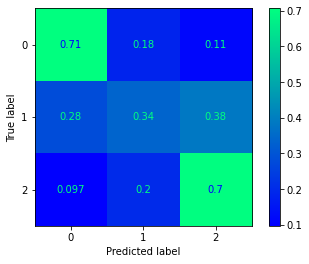

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       261
           1       0.59      0.70      0.64       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.049250331153134375



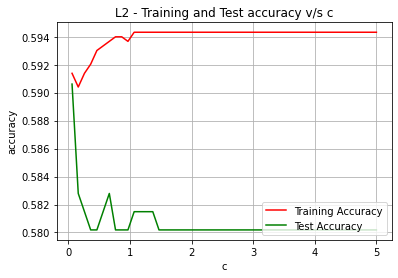

In [84]:
train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, Train Accuracy = 0.6302219321148825, C=0.06
Test Accuracy = 0.6023468057366362


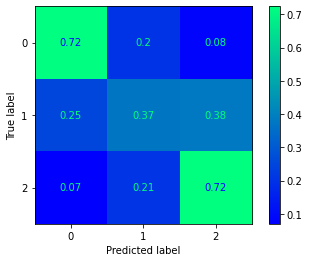

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17180018451801105

Logistic - L1, Train Accuracy = 0.6338120104438643, C=0.16081632653061223
Test Accuracy = 0.60625814863103


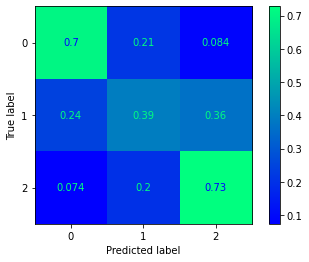

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       261
           1       0.62      0.73      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16587035290358154

Logistic - L1, Train Accuracy = 0.6331592689295039, C=0.2616326530612245
Test Accuracy = 0.5997392438070405


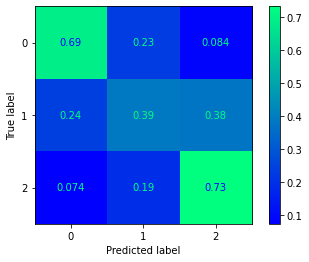

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.61      0.73      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6325065274151436, C=0.36244897959183675
Test Accuracy = 0.5984354628422425


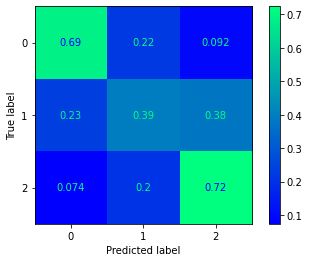

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14215102644586342

Logistic - L1, Train Accuracy = 0.6354438642297651, C=0.463265306122449
Test Accuracy = 0.5958279009126467


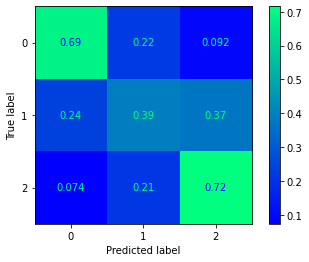

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13819780536957715

Logistic - L1, Train Accuracy = 0.6383812010443864, C=0.5640816326530613
Test Accuracy = 0.5984354628422425


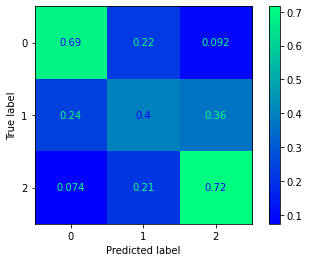

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14215102644586342

Logistic - L1, Train Accuracy = 0.6380548302872062, C=0.6648979591836734
Test Accuracy = 0.5971316818774446


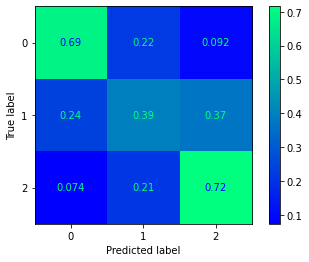

              precision    recall  f1-score   support

           0       0.49      0.39      0.44       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14017441590772028

Logistic - L1, Train Accuracy = 0.6377284595300261, C=0.7657142857142858
Test Accuracy = 0.5984354628422425


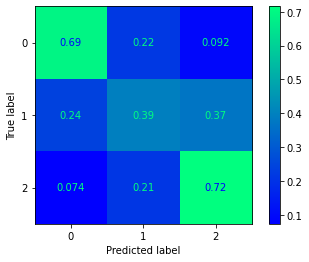

              precision    recall  f1-score   support

           0       0.49      0.39      0.44       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14215102644586342

Logistic - L1, Train Accuracy = 0.6383812010443864, C=0.8665306122448979
Test Accuracy = 0.5997392438070405


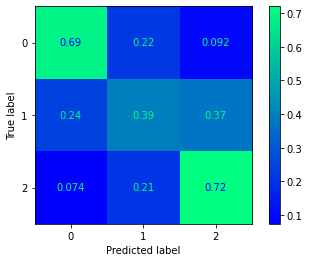

              precision    recall  f1-score   support

           0       0.49      0.39      0.44       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14412763698400666

Logistic - L1, Train Accuracy = 0.6377284595300261, C=0.9673469387755103
Test Accuracy = 0.5984354628422425


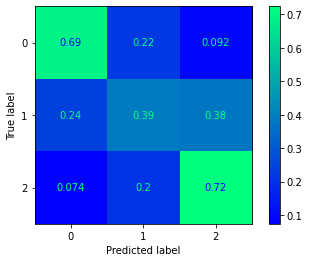

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14215102644586342

Logistic - L1, Train Accuracy = 0.637402088772846, C=1.0681632653061226
Test Accuracy = 0.5997392438070405


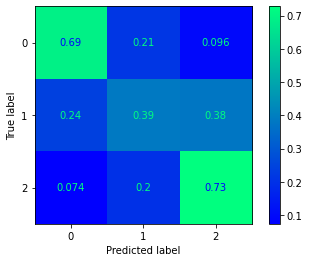

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13819780536957715

Logistic - L1, Train Accuracy = 0.6387075718015666, C=1.1689795918367347
Test Accuracy = 0.5997392438070405


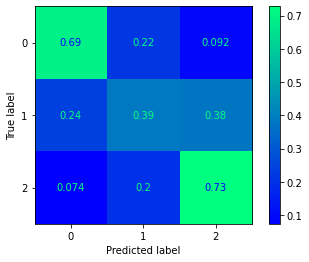

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14412763698400666

Logistic - L1, Train Accuracy = 0.6387075718015666, C=1.269795918367347
Test Accuracy = 0.5997392438070405


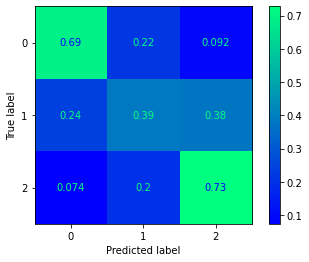

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14412763698400666

Logistic - L1, Train Accuracy = 0.6387075718015666, C=1.3706122448979592
Test Accuracy = 0.6010430247718384


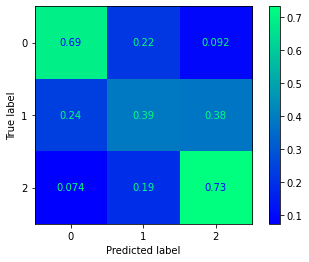

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1461042475221498

Logistic - L1, Train Accuracy = 0.6383812010443864, C=1.4714285714285715
Test Accuracy = 0.6010430247718384


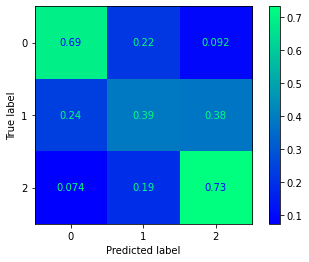

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1461042475221498

Logistic - L1, Train Accuracy = 0.6383812010443864, C=1.5722448979591837
Test Accuracy = 0.6023468057366362


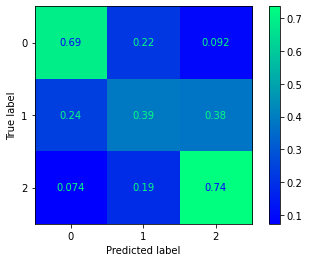

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14808085806029303

Logistic - L1, Train Accuracy = 0.637402088772846, C=1.673061224489796
Test Accuracy = 0.6023468057366362


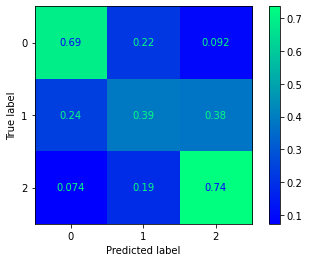

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14808085806029303

Logistic - L1, Train Accuracy = 0.6377284595300261, C=1.7738775510204083
Test Accuracy = 0.6023468057366362


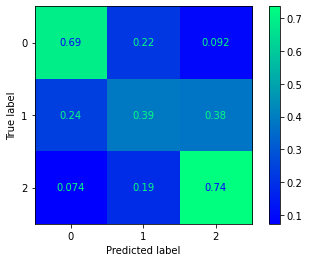

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14808085806029303

Logistic - L1, Train Accuracy = 0.6370757180156658, C=1.8746938775510205
Test Accuracy = 0.6023468057366362


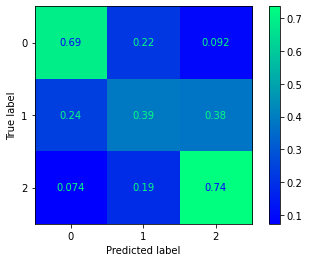

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14808085806029303

Logistic - L1, Train Accuracy = 0.6370757180156658, C=1.9755102040816328
Test Accuracy = 0.6023468057366362


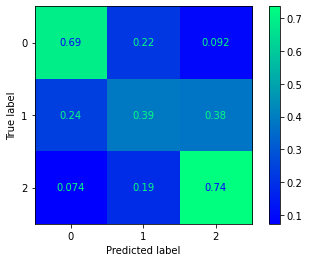

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14808085806029303

Logistic - L1, Train Accuracy = 0.6370757180156658, C=2.076326530612245
Test Accuracy = 0.6036505867014341


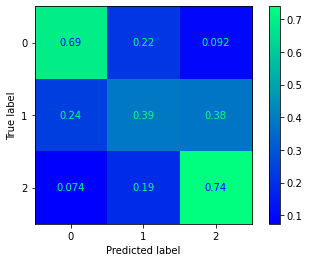

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15005746859843616

Logistic - L1, Train Accuracy = 0.637402088772846, C=2.177142857142857
Test Accuracy = 0.6036505867014341


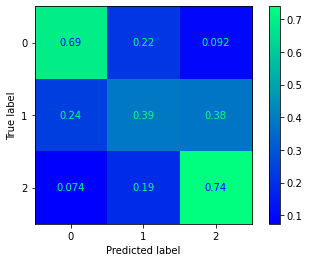

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15005746859843616

Logistic - L1, Train Accuracy = 0.637402088772846, C=2.2779591836734694
Test Accuracy = 0.6036505867014341


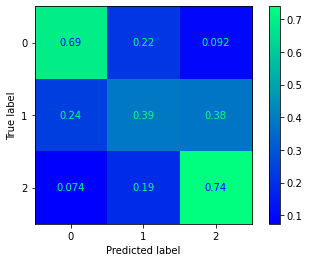

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15005746859843616

Logistic - L1, Train Accuracy = 0.6377284595300261, C=2.3787755102040817
Test Accuracy = 0.6036505867014341


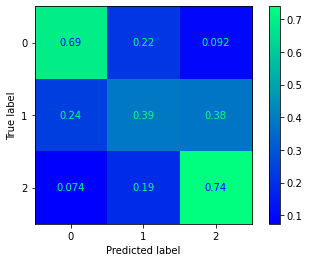

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15005746859843616

Logistic - L1, Train Accuracy = 0.6380548302872062, C=2.479591836734694
Test Accuracy = 0.6036505867014341


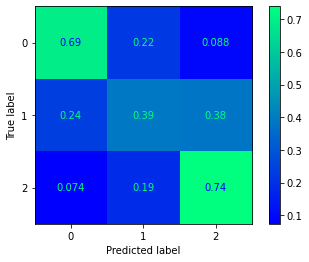

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6380548302872062, C=2.5804081632653064
Test Accuracy = 0.6036505867014341


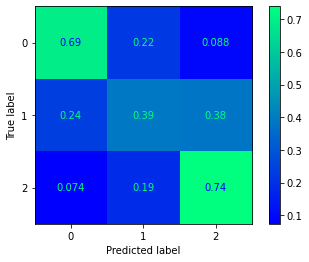

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6383812010443864, C=2.6812244897959183
Test Accuracy = 0.6036505867014341


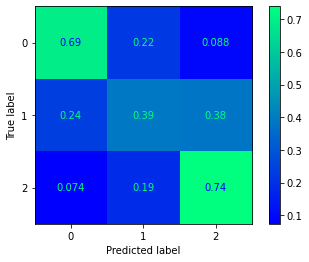

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6380548302872062, C=2.7820408163265307
Test Accuracy = 0.6036505867014341


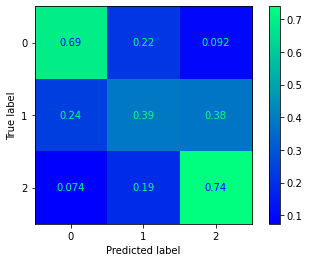

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15005746859843616

Logistic - L1, Train Accuracy = 0.6380548302872062, C=2.882857142857143
Test Accuracy = 0.6036505867014341


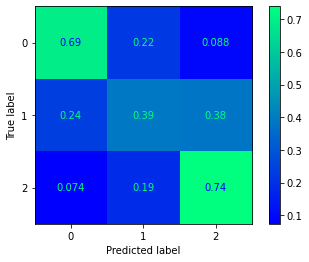

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6383812010443864, C=2.9836734693877554
Test Accuracy = 0.6036505867014341


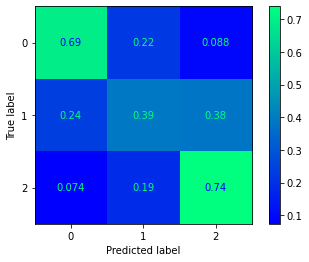

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6383812010443864, C=3.0844897959183672
Test Accuracy = 0.6036505867014341


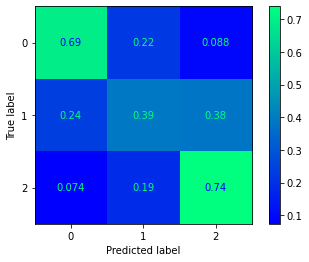

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6383812010443864, C=3.1853061224489796
Test Accuracy = 0.6036505867014341


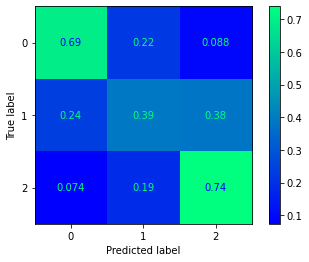

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6383812010443864, C=3.286122448979592
Test Accuracy = 0.6036505867014341


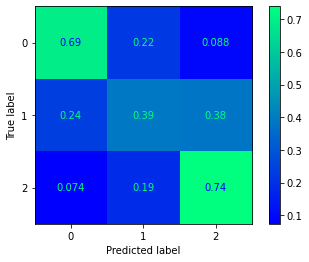

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6383812010443864, C=3.3869387755102043
Test Accuracy = 0.6036505867014341


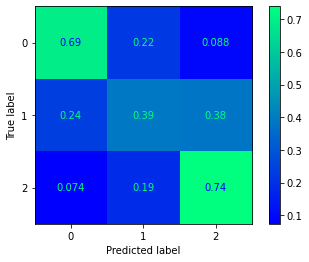

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6383812010443864, C=3.4877551020408166
Test Accuracy = 0.6036505867014341


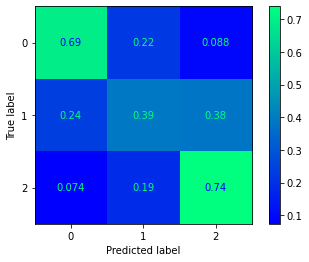

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6383812010443864, C=3.5885714285714285
Test Accuracy = 0.6036505867014341


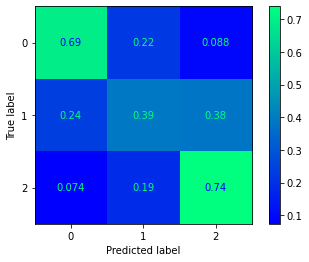

              precision    recall  f1-score   support

           0       0.50      0.39      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=3.689387755102041
Test Accuracy = 0.6036505867014341


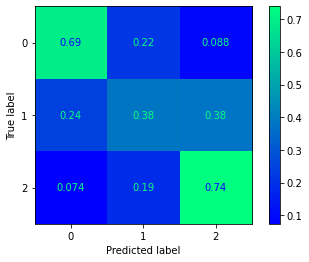

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=3.790204081632653
Test Accuracy = 0.6036505867014341


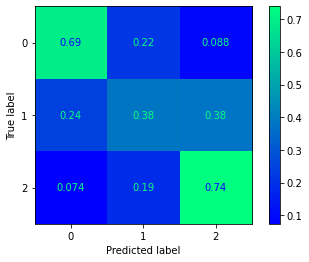

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.637402088772846, C=3.8910204081632656
Test Accuracy = 0.6036505867014341


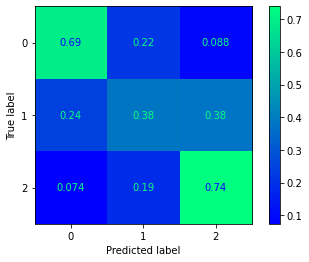

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.637402088772846, C=3.9918367346938775
Test Accuracy = 0.6036505867014341


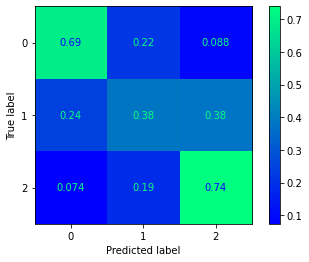

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.09265306122449
Test Accuracy = 0.6036505867014341


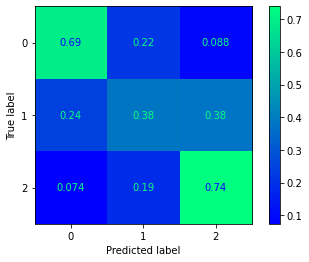

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.193469387755102
Test Accuracy = 0.6036505867014341


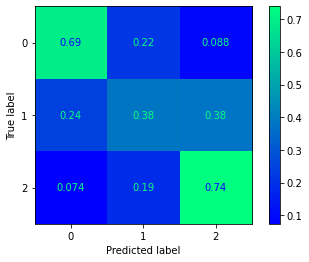

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.294285714285714
Test Accuracy = 0.6036505867014341


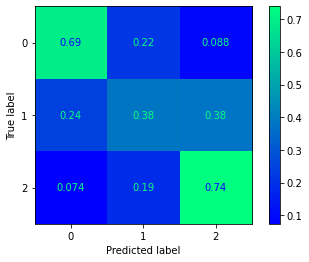

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.395102040816326
Test Accuracy = 0.6036505867014341


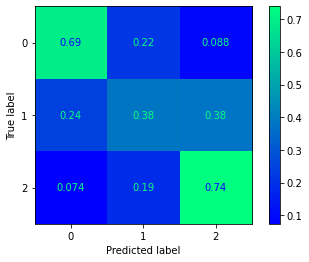

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.495918367346938
Test Accuracy = 0.6036505867014341


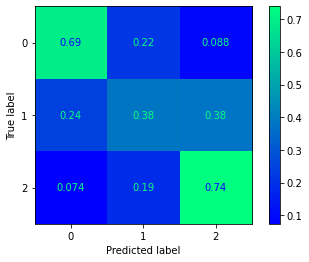

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.596734693877551
Test Accuracy = 0.6036505867014341


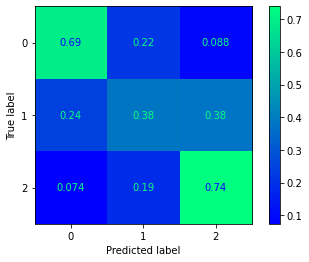

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.697551020408163
Test Accuracy = 0.6036505867014341


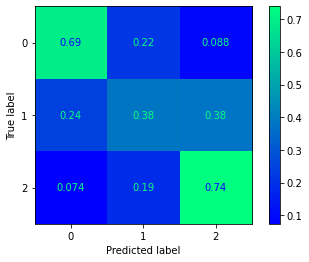

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.798367346938775
Test Accuracy = 0.6036505867014341


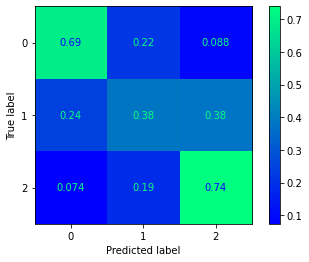

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=4.899183673469388
Test Accuracy = 0.6036505867014341


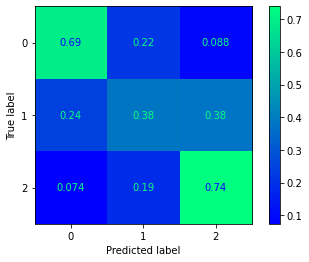

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566

Logistic - L1, Train Accuracy = 0.6377284595300261, C=5.0
Test Accuracy = 0.6036505867014341


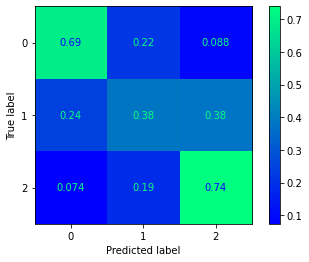

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15598730021286566



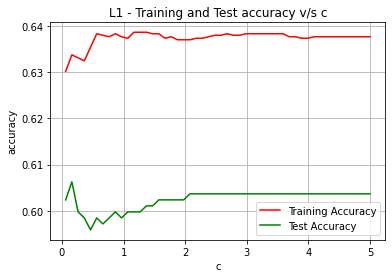

Logistic - L2, Train Accuracy = 0.637402088772846, C=0.06
Test Accuracy = 0.5997392438070405


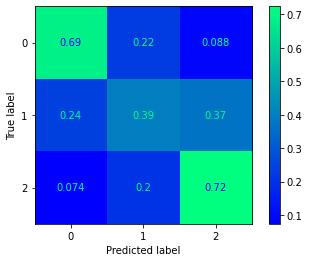

              precision    recall  f1-score   support

           0       0.49      0.39      0.44       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15005746859843616

Logistic - L2, Train Accuracy = 0.639686684073107, C=0.16081632653061223
Test Accuracy = 0.5984354628422425


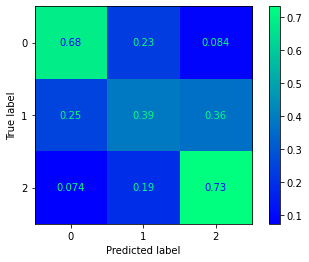

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       261
           1       0.62      0.73      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15401068967472253

Logistic - L2, Train Accuracy = 0.6419712793733682, C=0.2616326530612245
Test Accuracy = 0.5984354628422425


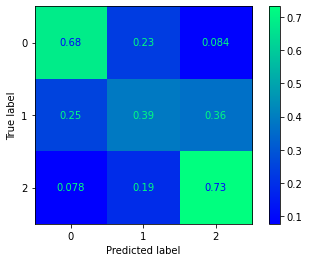

              precision    recall  f1-score   support

           0       0.49      0.39      0.43       261
           1       0.62      0.73      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14808085806029303

Logistic - L2, Train Accuracy = 0.639686684073107, C=0.36244897959183675
Test Accuracy = 0.5958279009126467


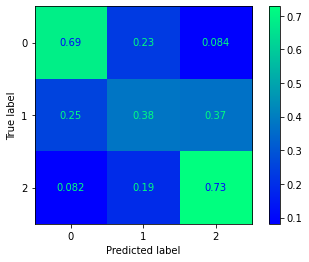

              precision    recall  f1-score   support

           0       0.48      0.38      0.42       261
           1       0.62      0.73      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13819780536957715

Logistic - L2, Train Accuracy = 0.6406657963446475, C=0.463265306122449
Test Accuracy = 0.5945241199478487


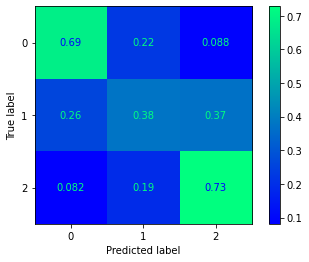

              precision    recall  f1-score   support

           0       0.48      0.38      0.42       261
           1       0.61      0.73      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1302913632170044

Logistic - L2, Train Accuracy = 0.6413185378590078, C=0.5640816326530613
Test Accuracy = 0.5945241199478487


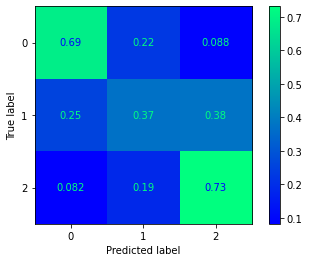

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1302913632170044

Logistic - L2, Train Accuracy = 0.6406657963446475, C=0.6648979591836734
Test Accuracy = 0.5945241199478487


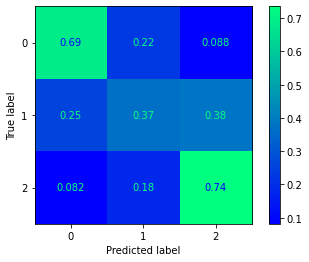

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1302913632170044

Logistic - L2, Train Accuracy = 0.6400130548302873, C=0.7657142857142858
Test Accuracy = 0.5945241199478487


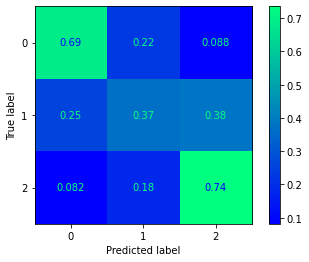

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1302913632170044

Logistic - L2, Train Accuracy = 0.6400130548302873, C=0.8665306122448979
Test Accuracy = 0.5945241199478487


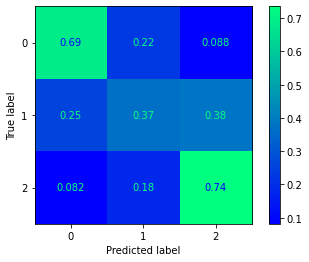

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.74      0.67       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1302913632170044

Logistic - L2, Train Accuracy = 0.639686684073107, C=0.9673469387755103
Test Accuracy = 0.590612777053455


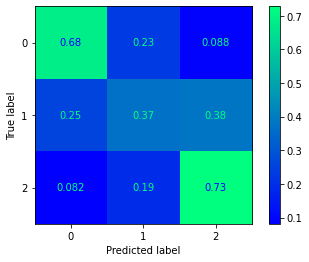

              precision    recall  f1-score   support

           0       0.48      0.37      0.41       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6393603133159269, C=1.0681632653061226
Test Accuracy = 0.590612777053455


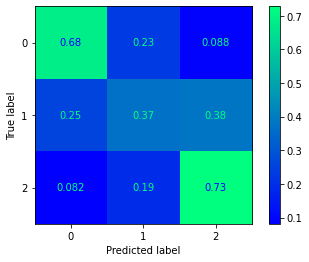

              precision    recall  f1-score   support

           0       0.48      0.37      0.41       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6393603133159269, C=1.1689795918367347
Test Accuracy = 0.590612777053455


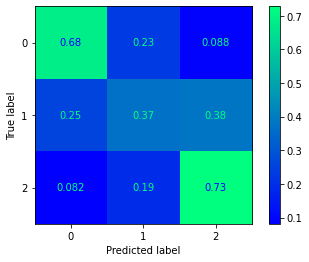

              precision    recall  f1-score   support

           0       0.48      0.37      0.41       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6393603133159269, C=1.269795918367347
Test Accuracy = 0.590612777053455


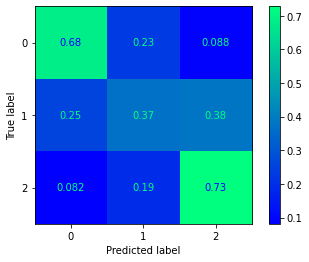

              precision    recall  f1-score   support

           0       0.48      0.37      0.41       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.639686684073107, C=1.3706122448979592
Test Accuracy = 0.5919165580182529


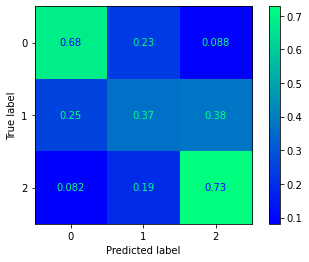

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6406657963446475, C=1.4714285714285715
Test Accuracy = 0.5919165580182529


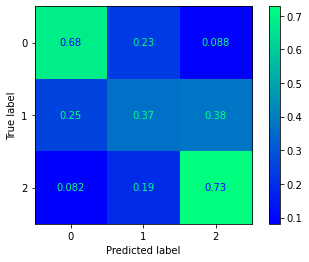

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6403394255874674, C=1.5722448979591837
Test Accuracy = 0.5919165580182529


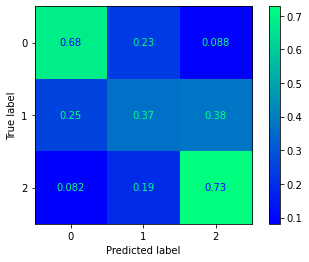

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6403394255874674, C=1.673061224489796
Test Accuracy = 0.5919165580182529


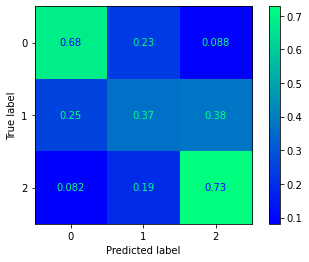

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6406657963446475, C=1.7738775510204083
Test Accuracy = 0.5919165580182529


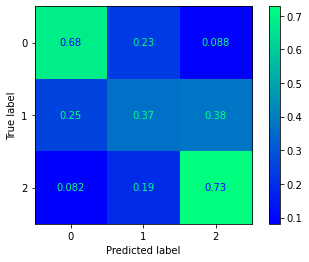

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6403394255874674, C=1.8746938775510205
Test Accuracy = 0.5919165580182529


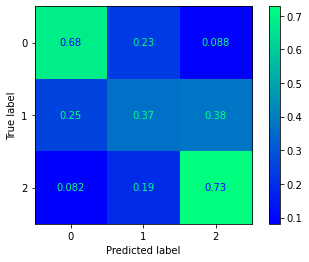

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6406657963446475, C=1.9755102040816328
Test Accuracy = 0.5919165580182529


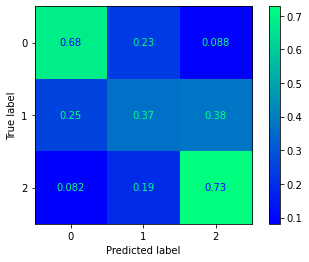

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6406657963446475, C=2.076326530612245
Test Accuracy = 0.5919165580182529


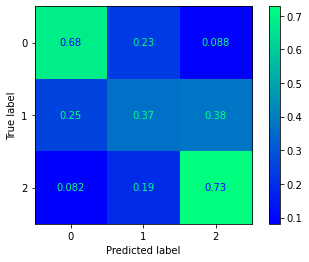

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6406657963446475, C=2.177142857142857
Test Accuracy = 0.5919165580182529


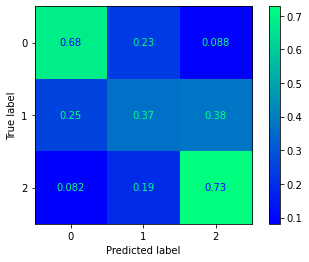

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.73      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6403394255874674, C=2.2779591836734694
Test Accuracy = 0.590612777053455


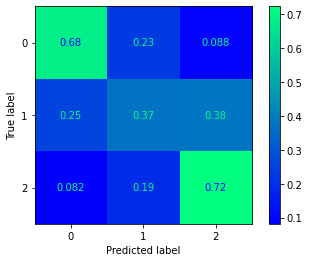

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6403394255874674, C=2.3787755102040817
Test Accuracy = 0.590612777053455


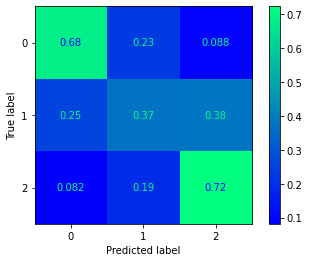

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6403394255874674, C=2.479591836734694
Test Accuracy = 0.590612777053455


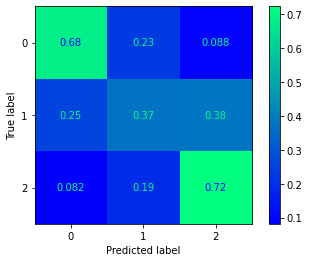

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6413185378590078, C=2.5804081632653064
Test Accuracy = 0.590612777053455


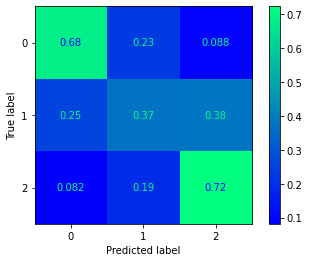

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6406657963446475, C=2.6812244897959183
Test Accuracy = 0.590612777053455


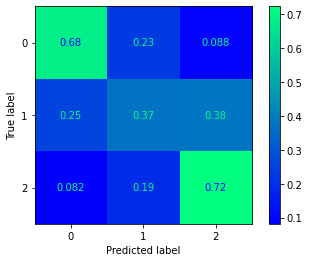

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6406657963446475, C=2.7820408163265307
Test Accuracy = 0.590612777053455


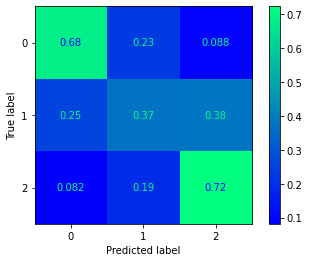

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6409921671018277, C=2.882857142857143
Test Accuracy = 0.590612777053455


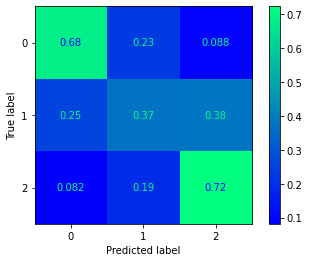

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6409921671018277, C=2.9836734693877554
Test Accuracy = 0.590612777053455


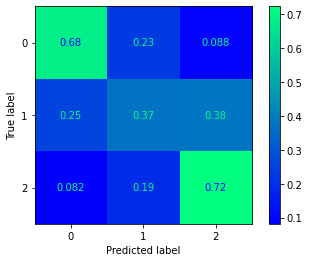

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6413185378590078, C=3.0844897959183672
Test Accuracy = 0.590612777053455


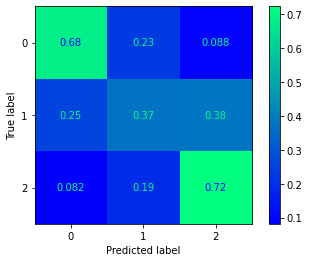

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.641644908616188, C=3.1853061224489796
Test Accuracy = 0.590612777053455


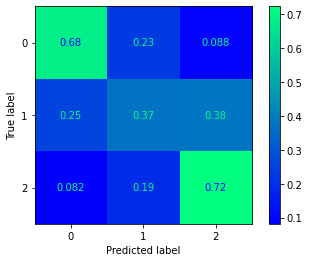

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6413185378590078, C=3.286122448979592
Test Accuracy = 0.590612777053455


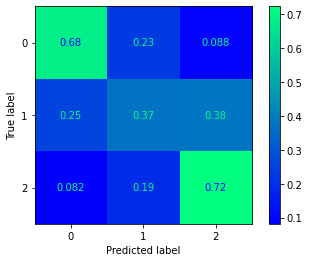

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.6413185378590078, C=3.3869387755102043
Test Accuracy = 0.590612777053455


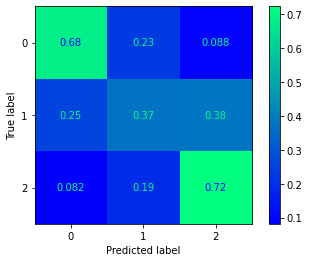

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1243615316025749

Logistic - L2, Train Accuracy = 0.641644908616188, C=3.4877551020408166
Test Accuracy = 0.5919165580182529


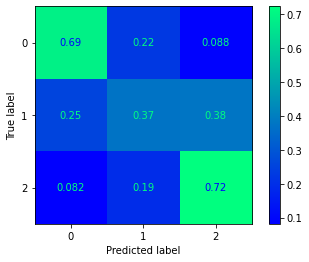

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.641644908616188, C=3.5885714285714285
Test Accuracy = 0.5919165580182529


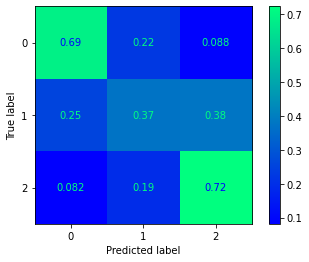

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6409921671018277, C=3.689387755102041
Test Accuracy = 0.5919165580182529


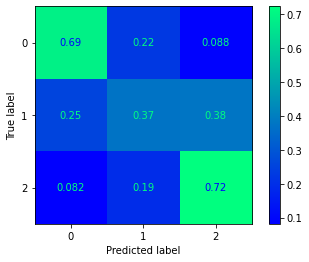

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=3.790204081632653
Test Accuracy = 0.5919165580182529


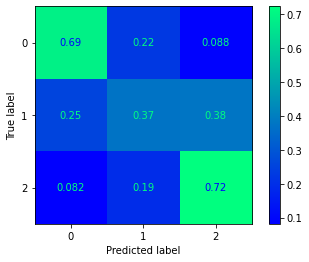

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.641644908616188, C=3.8910204081632656
Test Accuracy = 0.5919165580182529


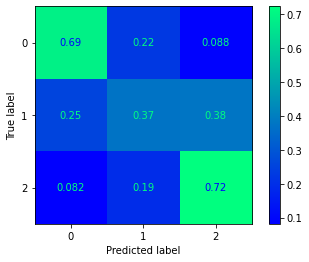

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.641644908616188, C=3.9918367346938775
Test Accuracy = 0.5919165580182529


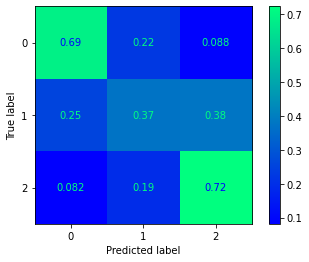

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.641644908616188, C=4.09265306122449
Test Accuracy = 0.5919165580182529


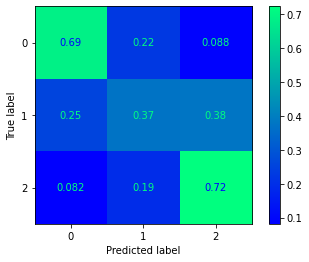

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=4.193469387755102
Test Accuracy = 0.5919165580182529


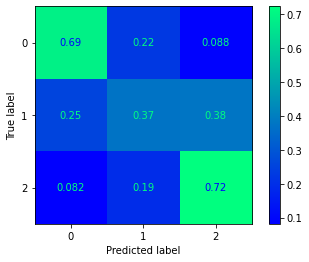

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=4.294285714285714
Test Accuracy = 0.5919165580182529


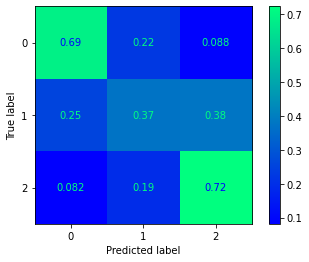

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=4.395102040816326
Test Accuracy = 0.5919165580182529


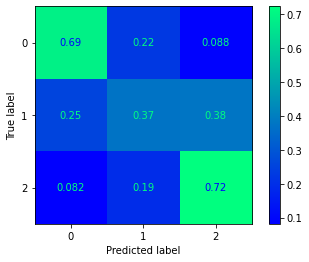

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=4.495918367346938
Test Accuracy = 0.5919165580182529


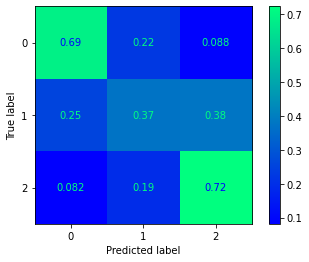

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=4.596734693877551
Test Accuracy = 0.5919165580182529


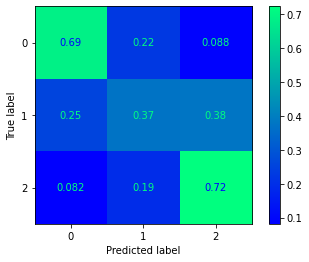

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=4.697551020408163
Test Accuracy = 0.5919165580182529


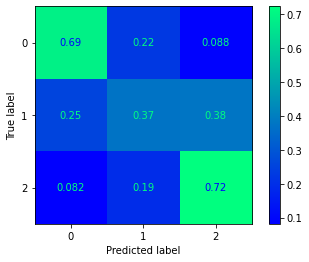

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=4.798367346938775
Test Accuracy = 0.5919165580182529


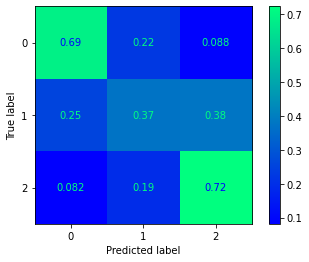

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=4.899183673469388
Test Accuracy = 0.5919165580182529


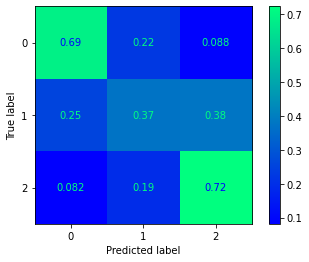

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815

Logistic - L2, Train Accuracy = 0.6413185378590078, C=5.0
Test Accuracy = 0.5919165580182529


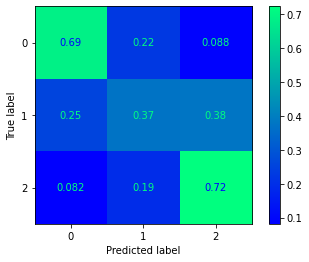

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       261
           1       0.61      0.72      0.66       257
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12633814214071815



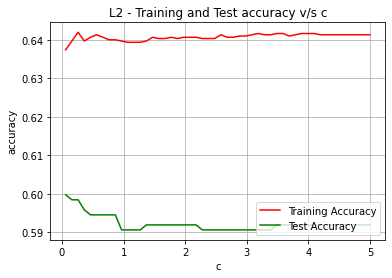

In [85]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)